In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import argparse
import time
import sys
import imageio
from IPython import display

In [2]:
#!python3 -m pip --version
#!python3 -m pip install imageio
#!pip3 install imageio
#!whereis python
#!/usr/bin/python3 --version
#sys.path
#!/usr/tce/packages/python/python-3.7.2/bin/python3.7 -m pip install --user imageio
#!/collab/usr/global/tools/jupyter/nb-2020-05-11/venvs/toss-python/bin/python3.7 -m pip install imageio
#os.environ
#print(sys.version)
#import imageio
#!python3 -m pip install imageio
#import imageio

In [3]:
# Let's go through all the data in this dir
output_csvs_dir = '/g/g15/bolet1/workspace/lulesh-region-fix-correct/LULESH/preprocData'

os.chdir(output_csvs_dir)

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 100

In [16]:
# Gather all the CSV files in this directory for us to process
# Only want particular kinds for now
csvs = list(glob.glob("*_c8_pol3_depth4*.csv"))
csvs.sort()
print(len(csvs))
print(csvs)

19
['PA_MEMAWARE_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize55.csv', 'PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize80.csv', 'PA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize30.csv', 'PA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize55.csv', 'PA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize80.csv', 'PA_SingleMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'PA_SingleMod_explrRandom_c8_pol3_depth4_trainSize55.csv', 'PA_SingleMod_explrRandom_c8_pol3_depth4_trainSize80.csv', 'PA_SingleMod_explrRoundRobin_c8_pol3_depth4_trainSize30.csv', 'PA_SingleMod_explrRoundRobin_c8_pol3_depth4_trainSize55.csv', 'PA_SingleMod_explrRoundRobin_c8_pol3_depth4_trainSize80.csv', 'VA_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'VA_RegionMod_explrRandom_c8_pol3_depth4_trainSize55.csv', 'VA_RegionMod_explrRandom_c8_pol3_depth4_trainSize80.csv', 'VA_RegionMod_explr

In [17]:
!head PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv

f0,f1,idx,policy,rankid,region,runsize,training,xtime
8775000.0,55625300.0,1,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.00435792
8775000.0,55625300.0,2,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.00034626800000000005
8775000.0,55625300.0,3,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.00034584800000000005
8775000.0,55625300.0,4,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.000343319
8775000.0,55625300.0,5,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.000351248
8775000.0,55625300.0,6,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.00033500800000000003
8775000.0,55625300.0,7,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.000348337
8775000.0,55625300.0,8,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.000346836
8775000.0,55625300.0,9,1,0,lulesh.cc.apollo.region.l1128,30,DecisionTree,0.000335387


In [18]:
# For each configuration, let's compare the single to the region models
# Loading in one dataset takes a lot of RAM, so we will load them in pairwise
# Recall that only PA can do SingleMod, so we will compare PA_Single against PA_Region and VA_Region
regionCSVs = [item for item in csvs if 'RegionMod' in item]
singleCSVs = [item for item in csvs if 'SingleMod' in item]
print(len(regionCSVs), regionCSVs)
print(len(singleCSVs), singleCSVs)

13 ['PA_MEMAWARE_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize55.csv', 'PA_RegionMod_explrRandom_c8_pol3_depth4_trainSize80.csv', 'PA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize30.csv', 'PA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize55.csv', 'PA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize80.csv', 'VA_RegionMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'VA_RegionMod_explrRandom_c8_pol3_depth4_trainSize55.csv', 'VA_RegionMod_explrRandom_c8_pol3_depth4_trainSize80.csv', 'VA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize30.csv', 'VA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize55.csv', 'VA_RegionMod_explrRoundRobin_c8_pol3_depth4_trainSize80.csv']
6 ['PA_SingleMod_explrRandom_c8_pol3_depth4_trainSize30.csv', 'PA_SingleMod_explrRandom_c8_pol3_depth4_trainSize55.csv', 'PA_SingleMod_explrRandom_c8_pol3_depth4_trainSize80.csv', 'PA_SingleMod_ex

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 58 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


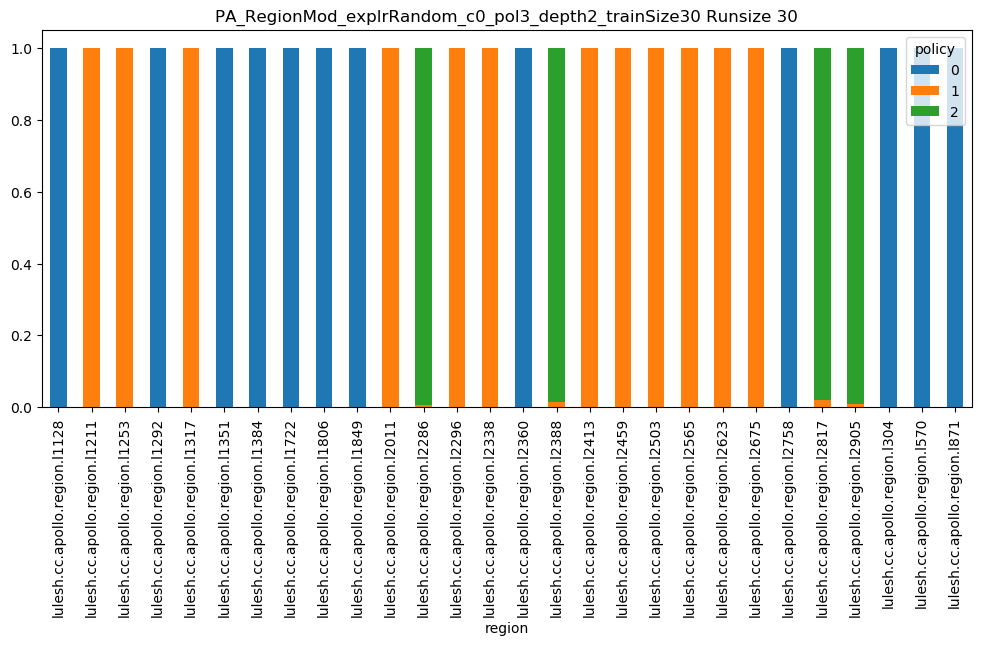

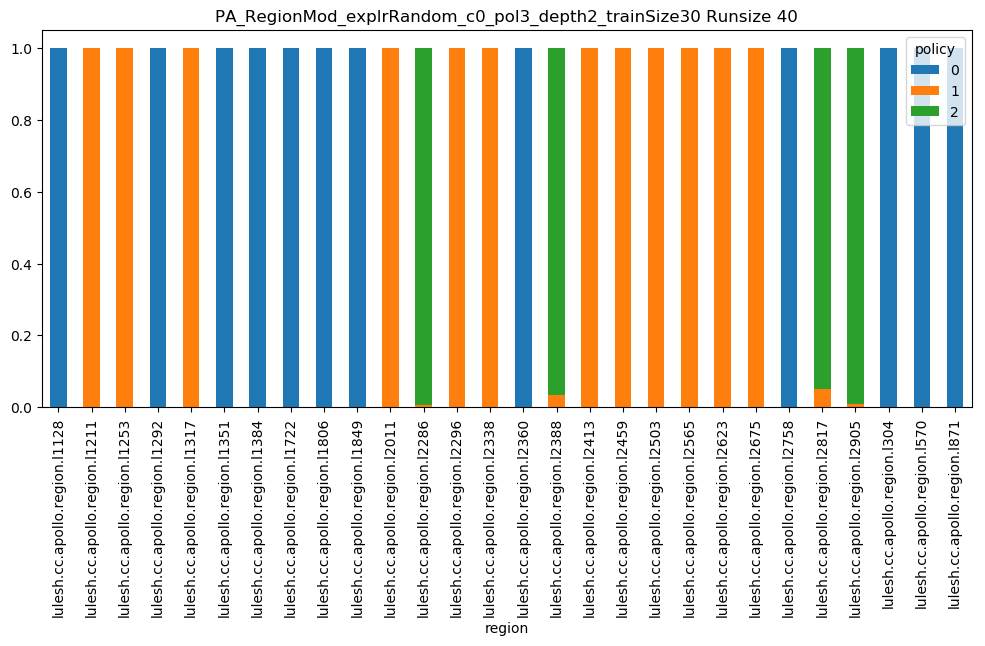

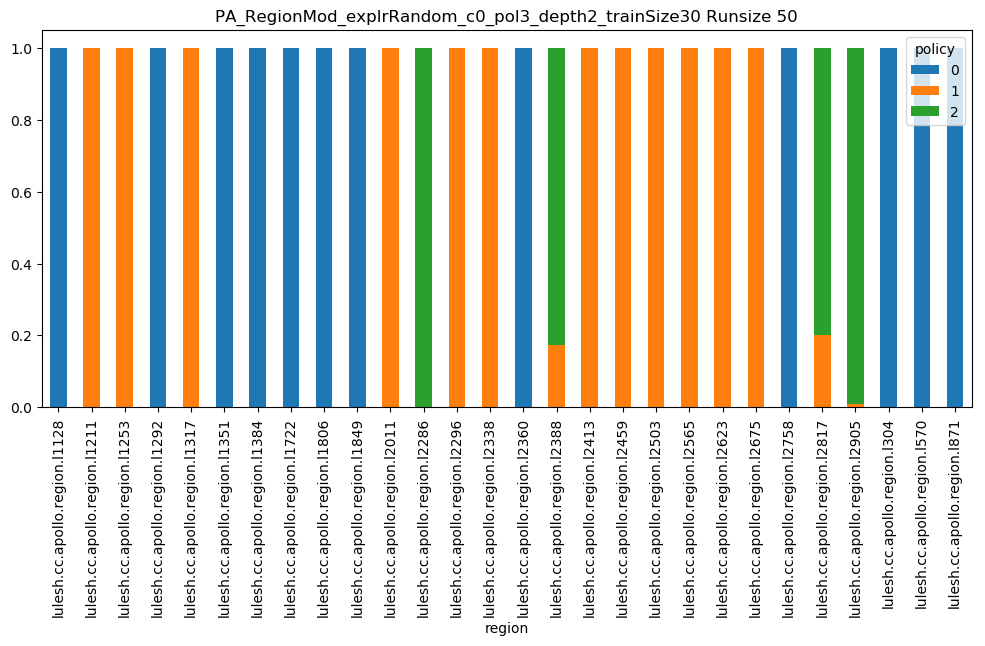

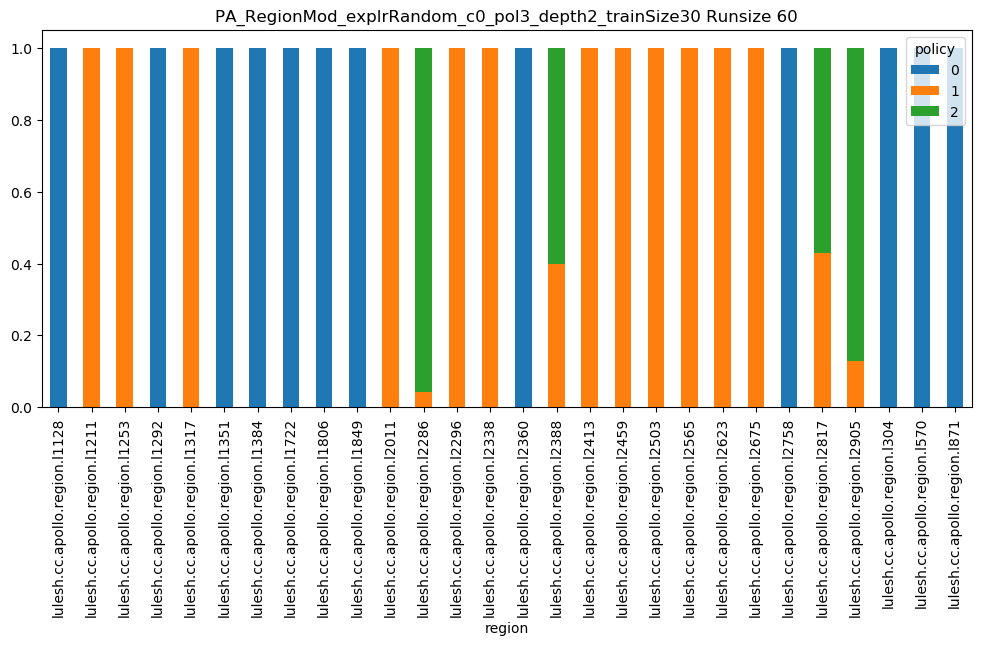

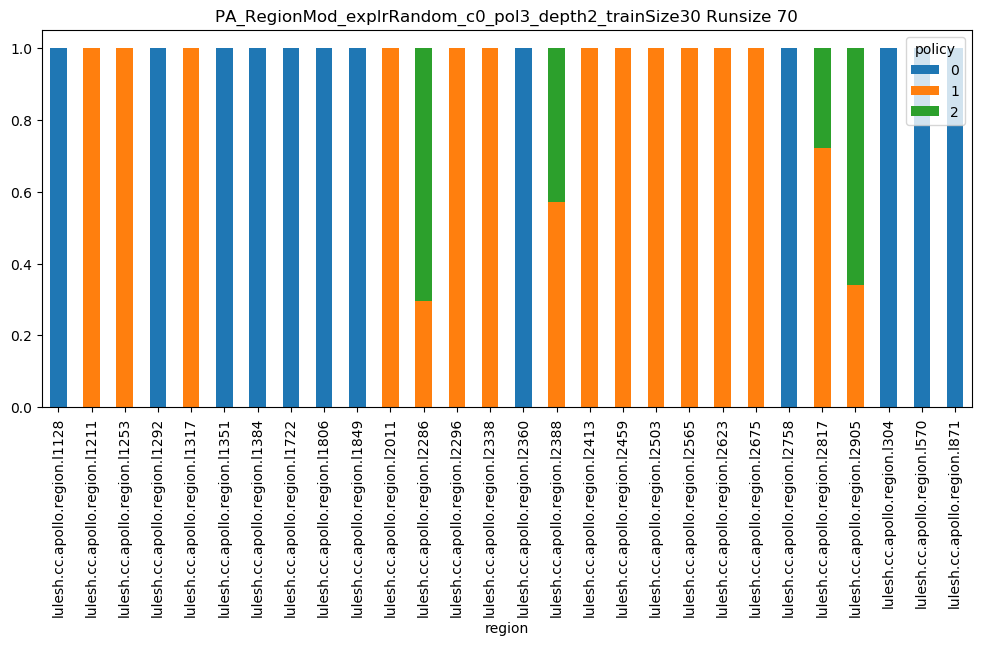

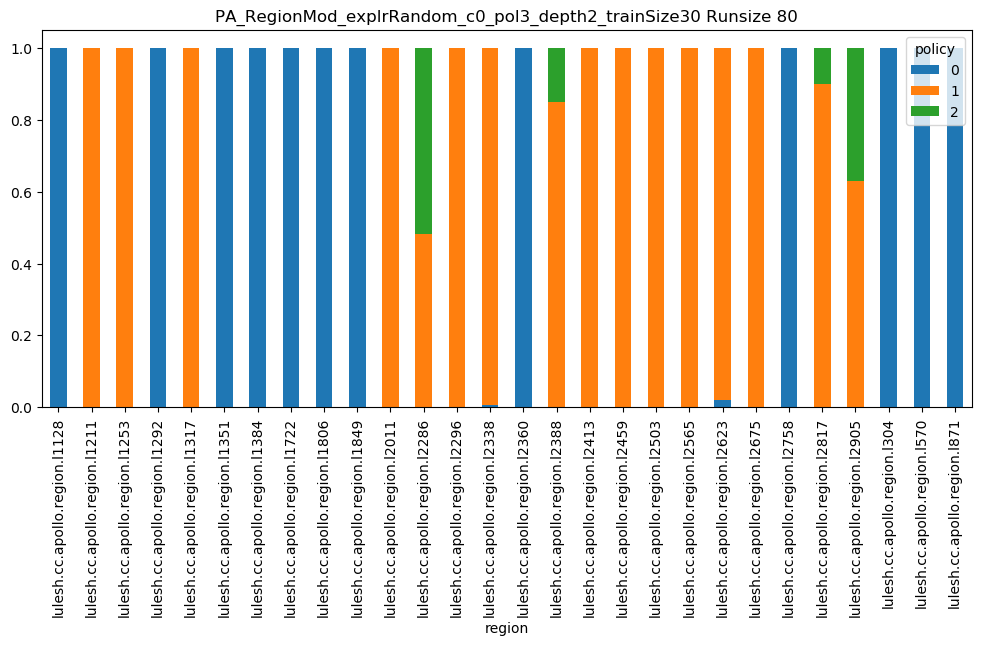

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 63 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


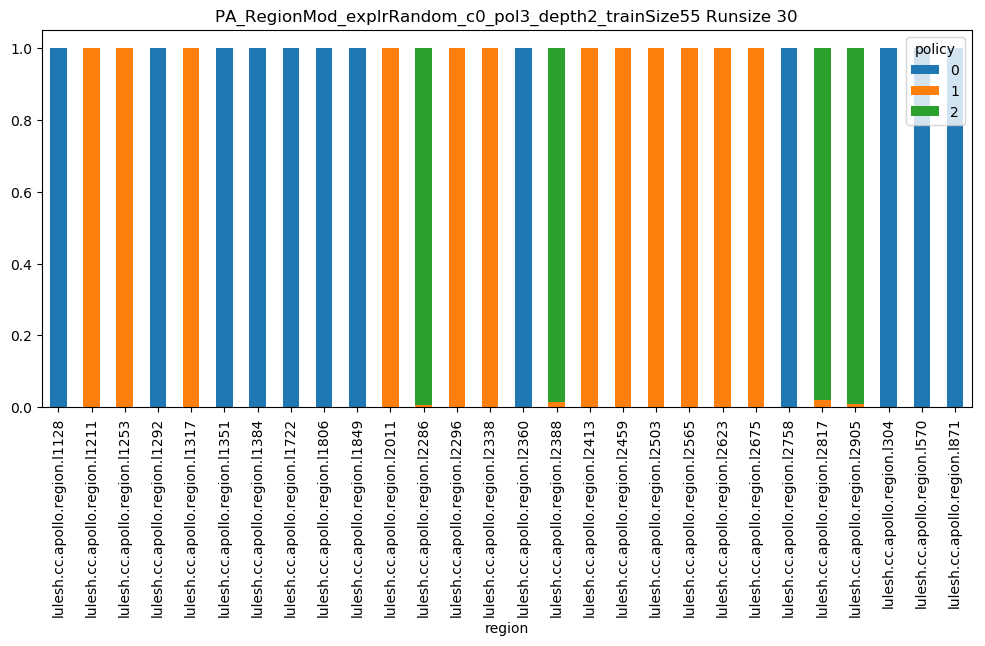

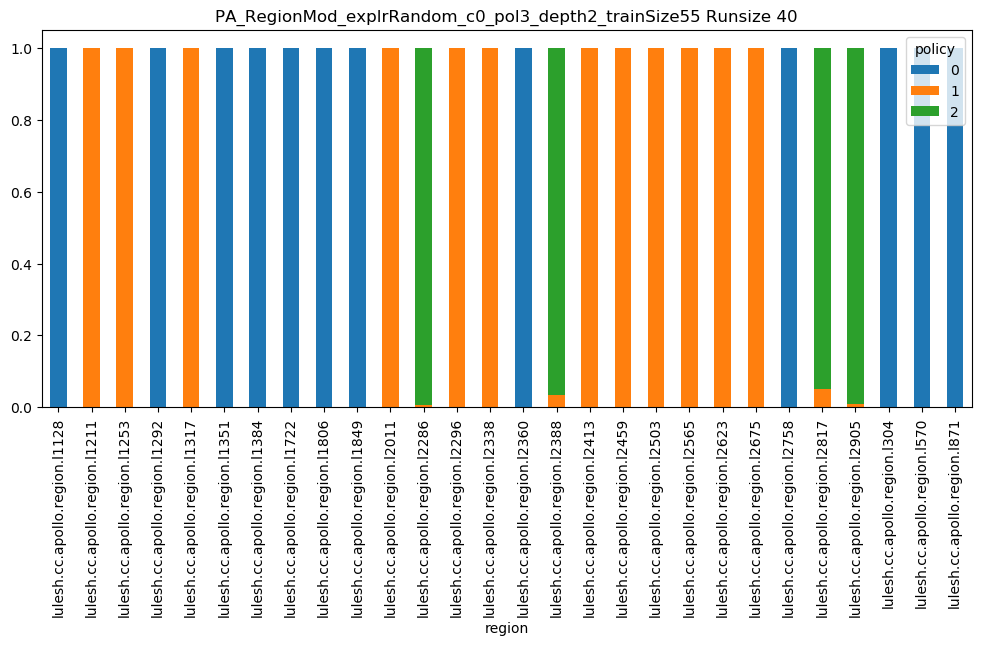

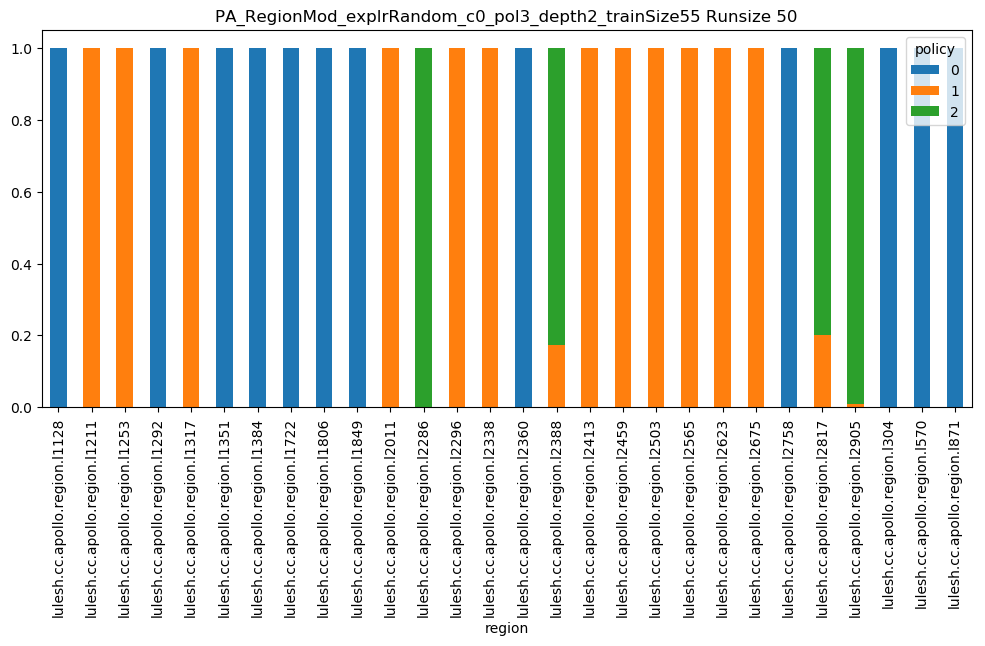

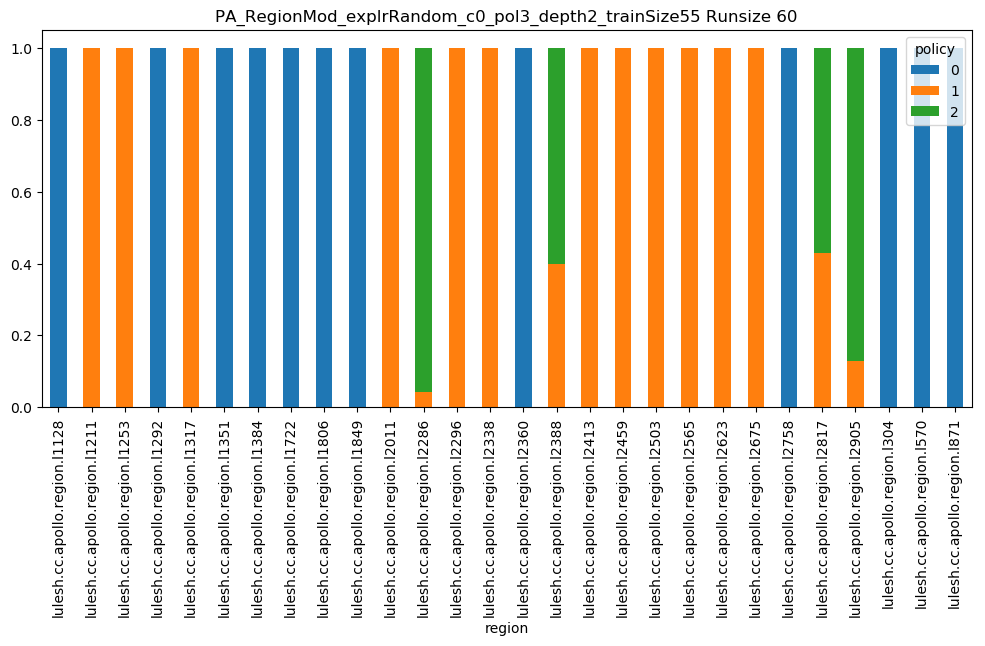

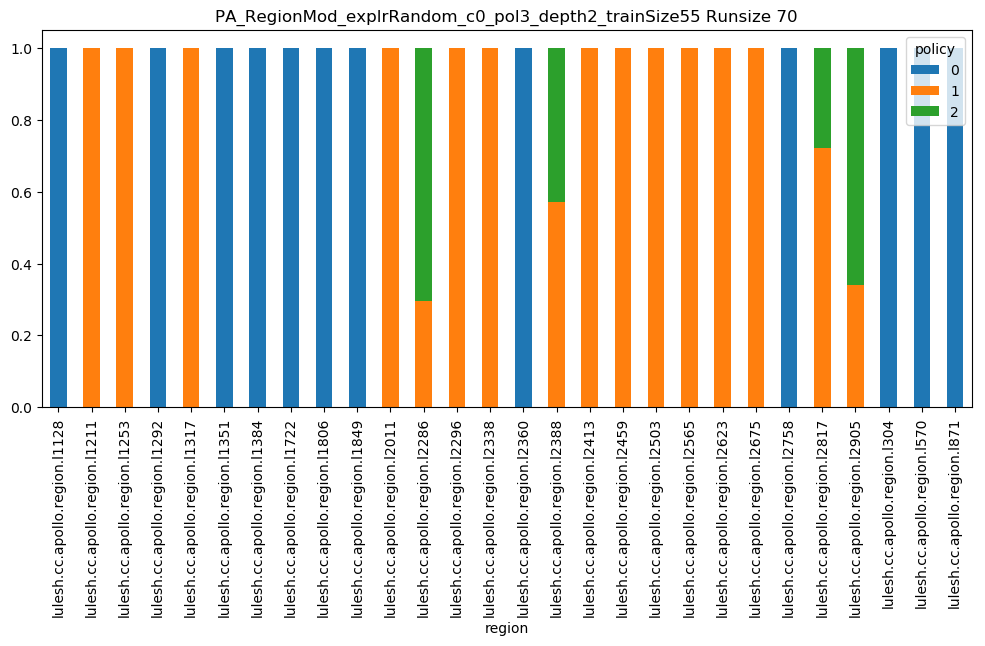

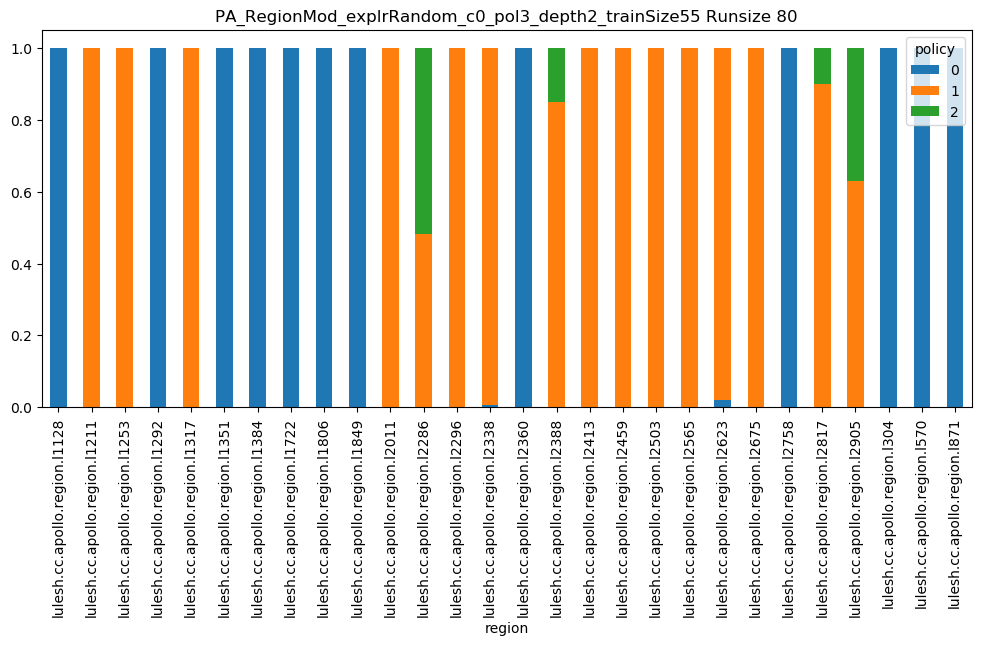

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 78 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


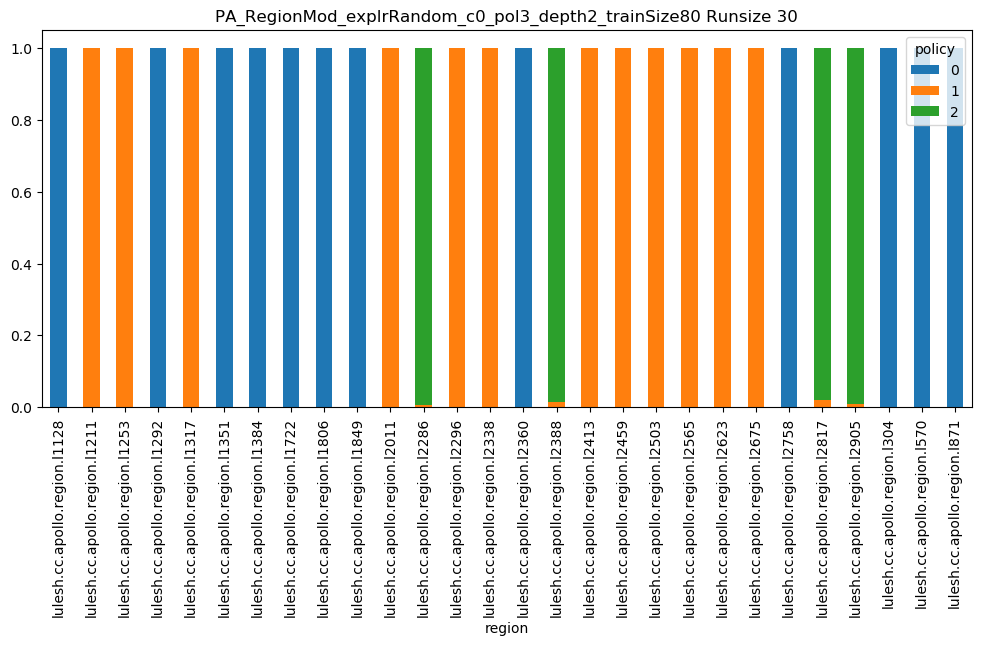

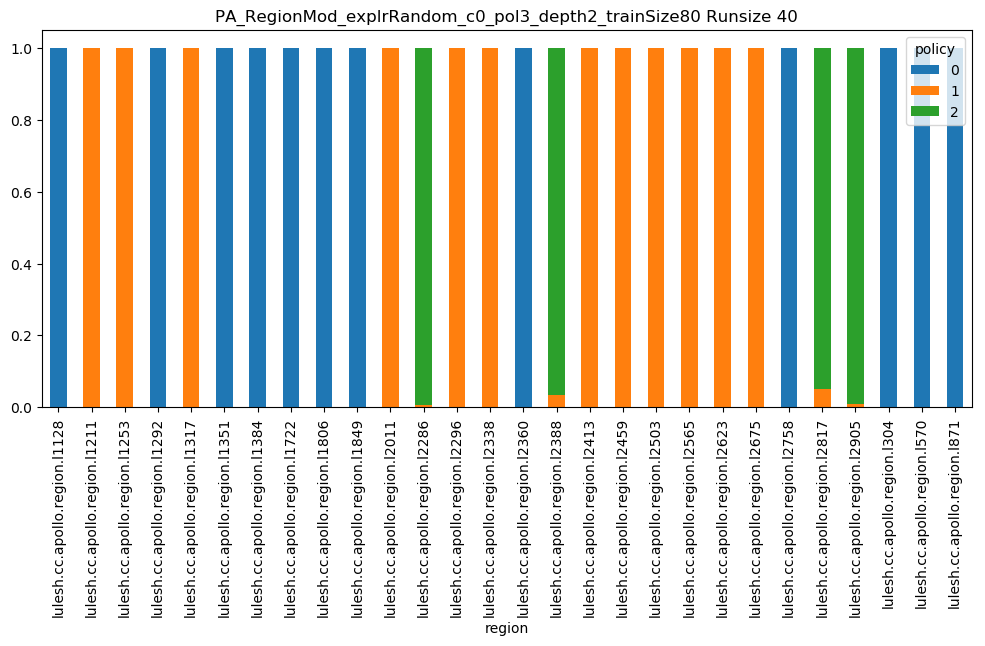

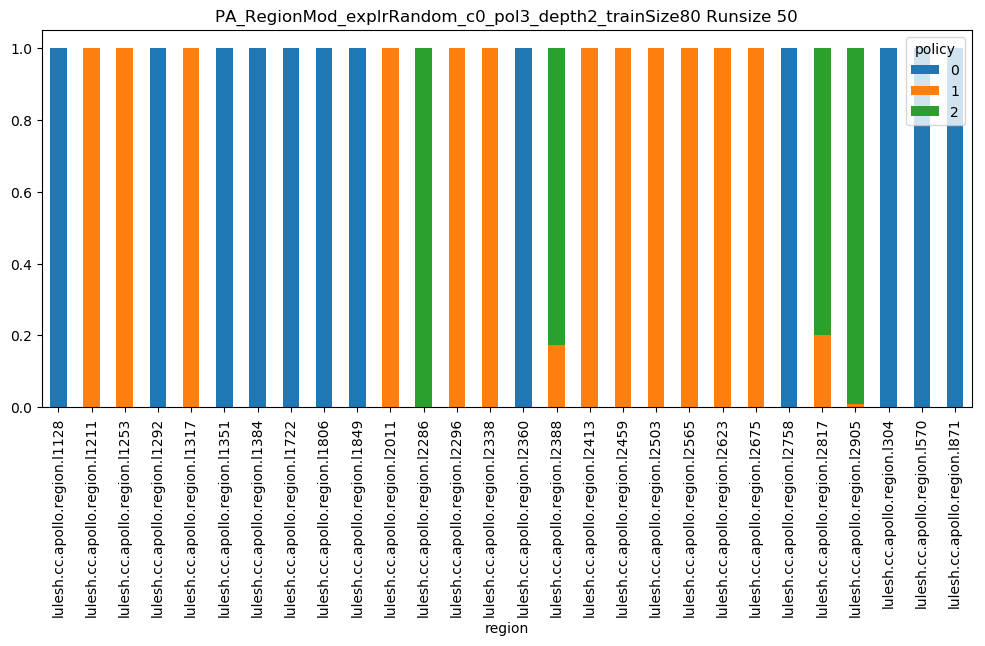

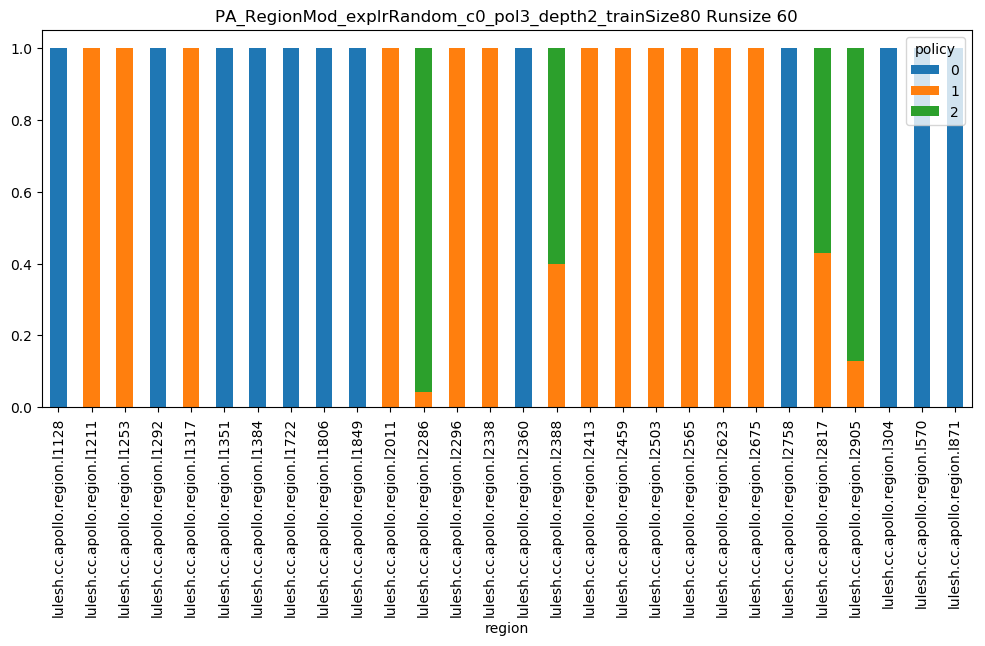

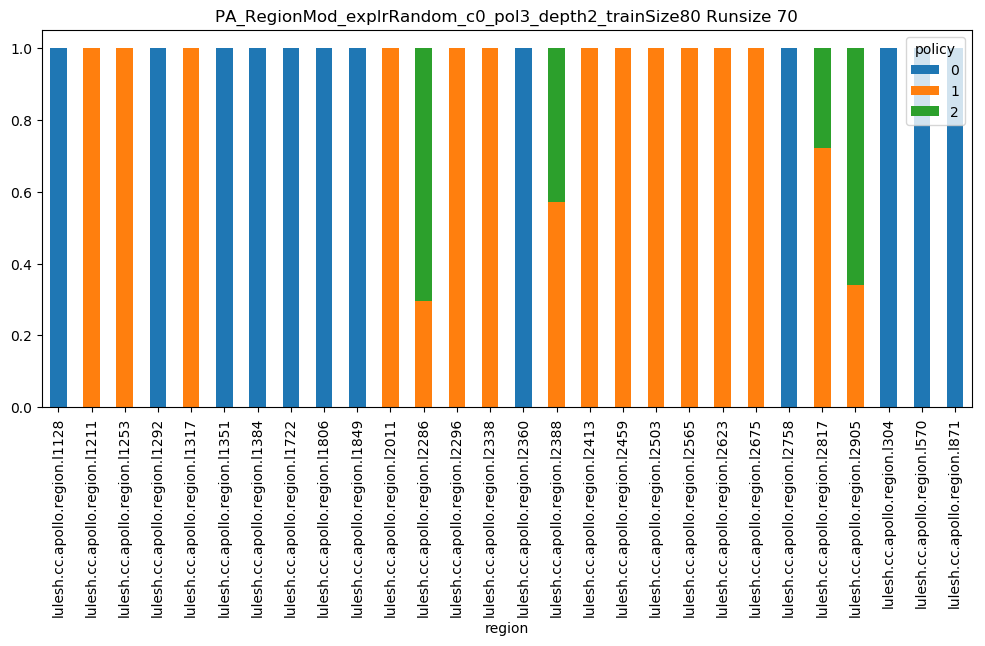

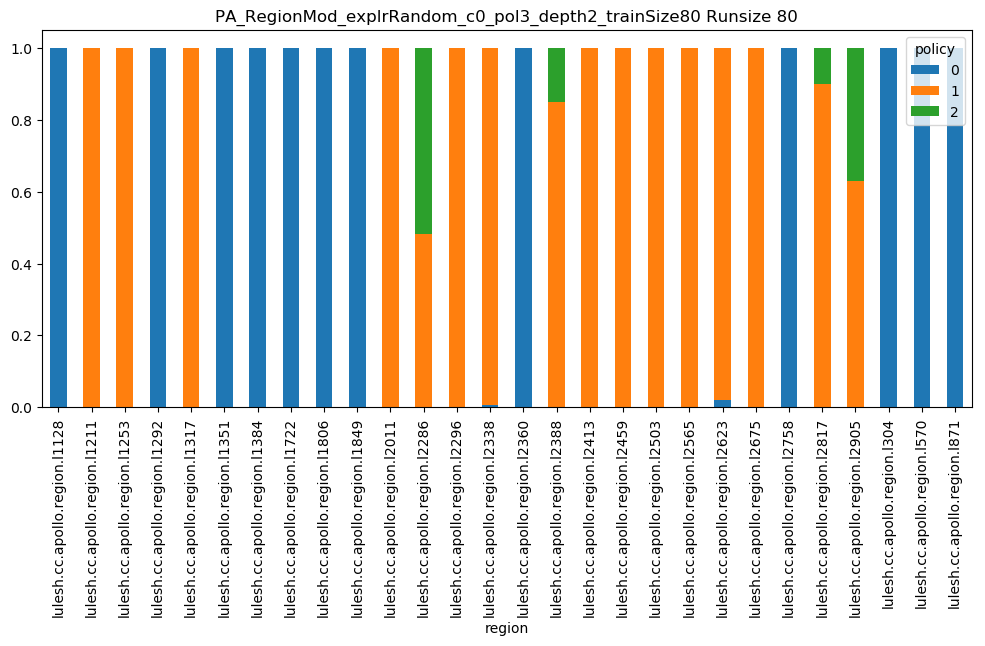

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 73 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


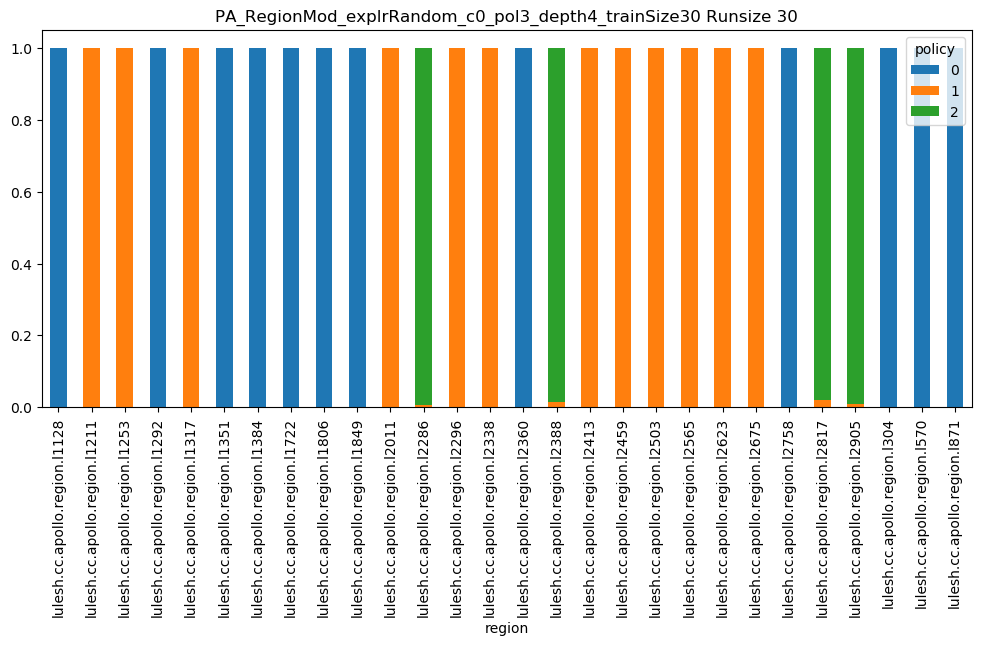

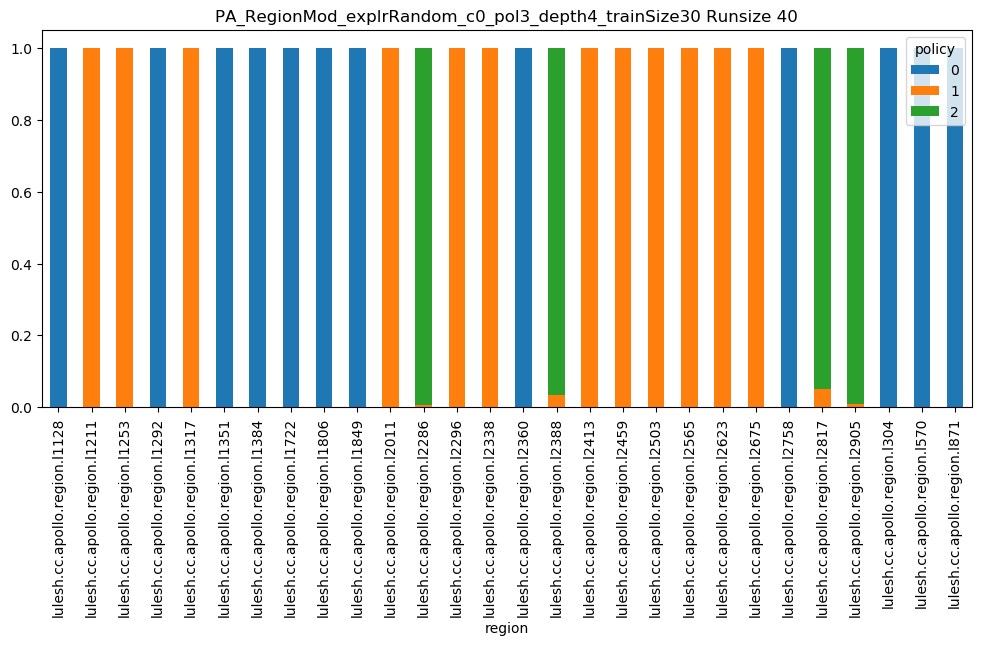

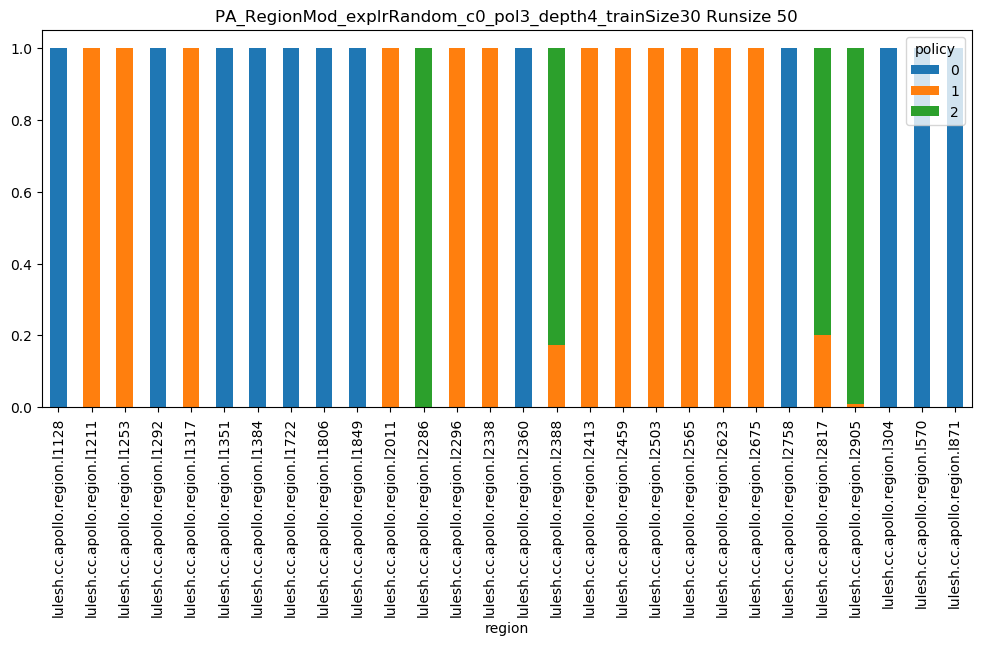

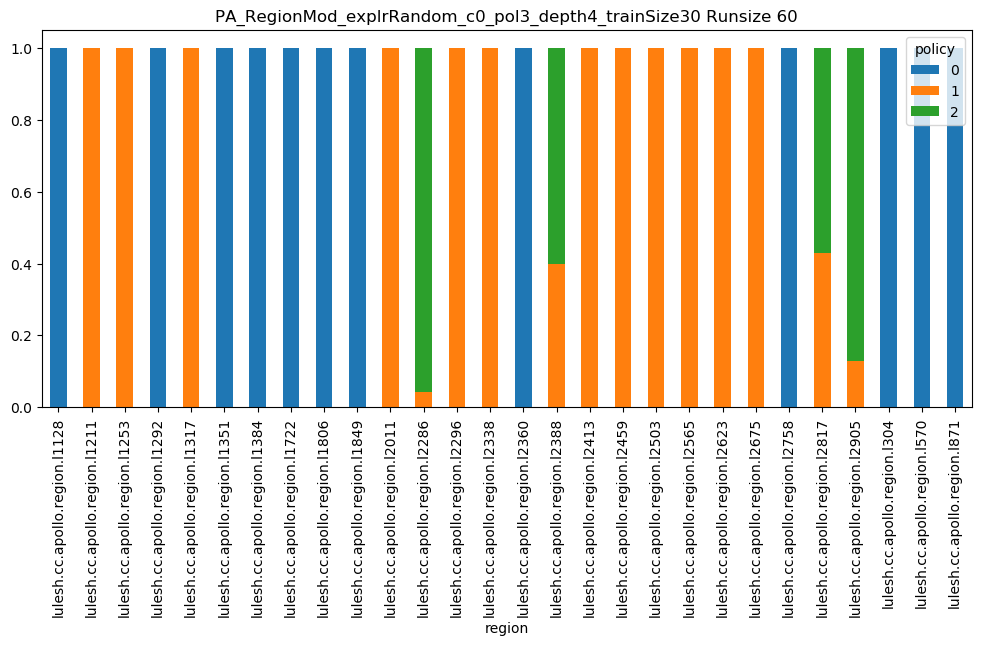

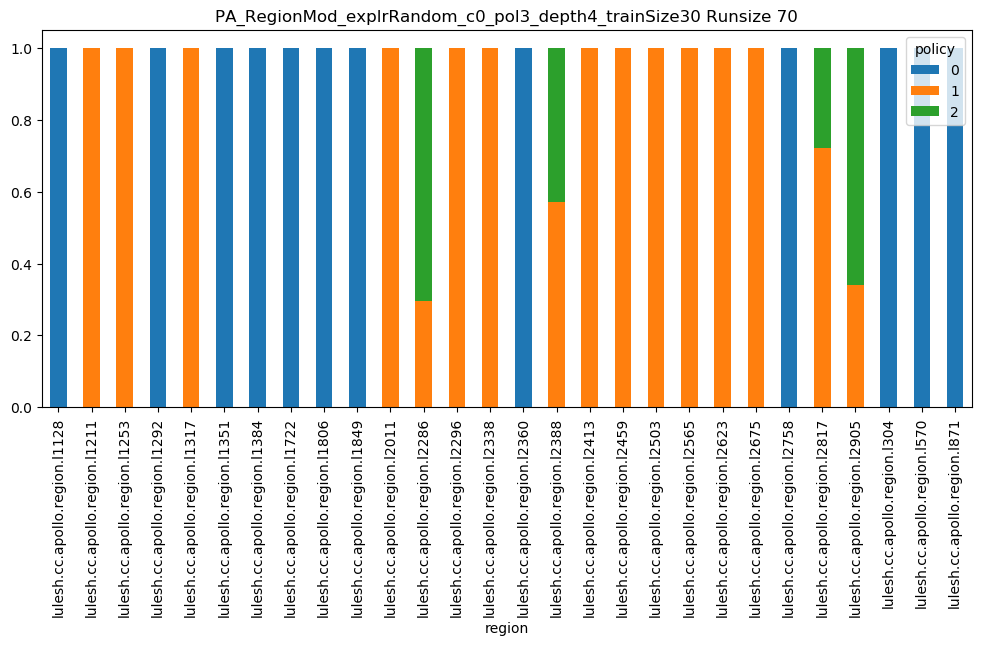

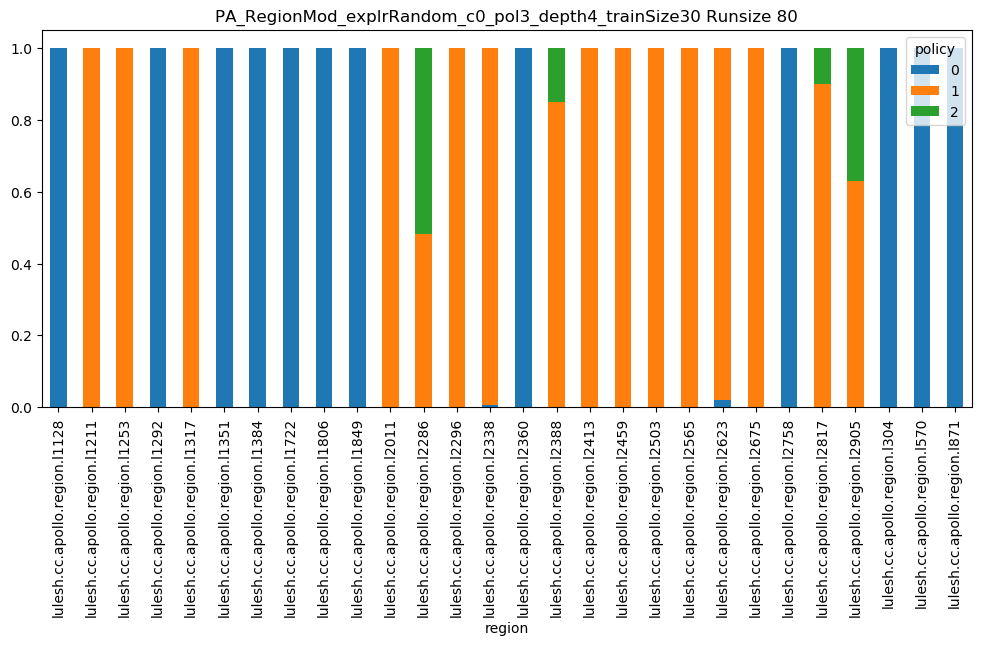

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 57 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


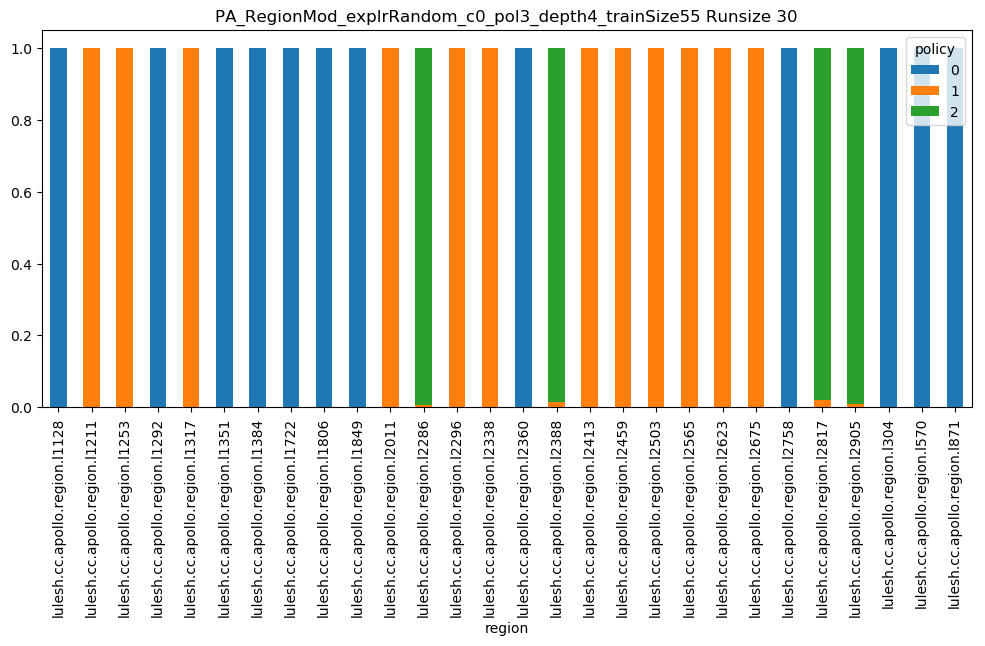

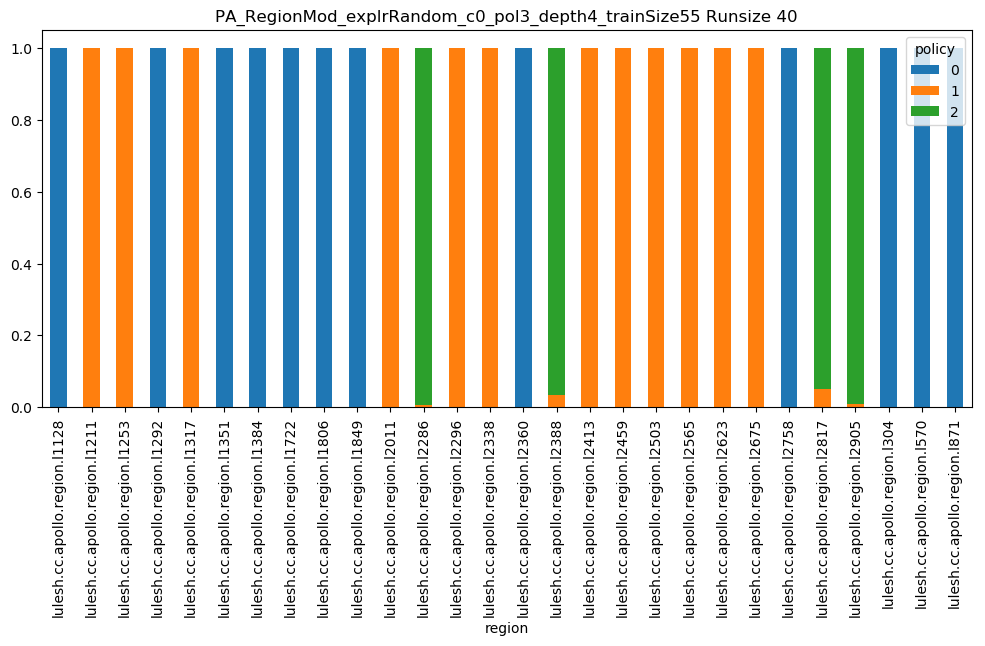

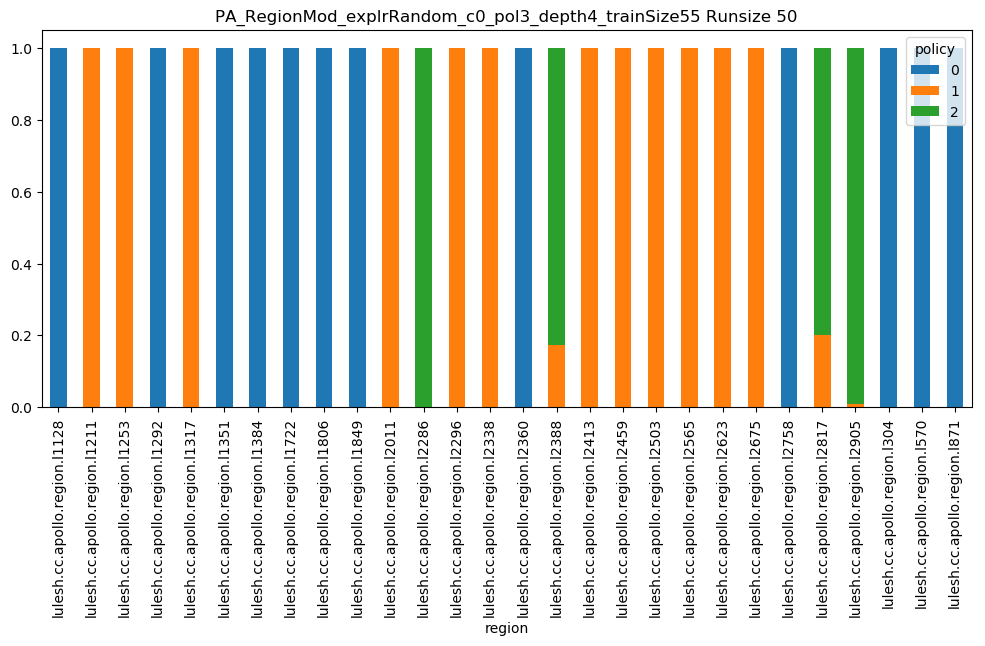

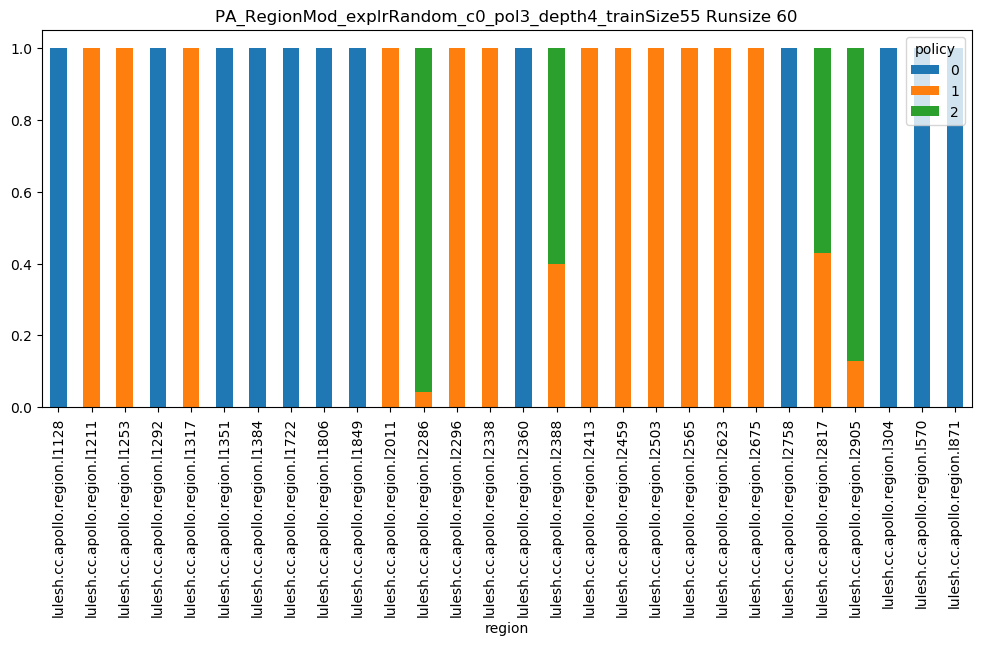

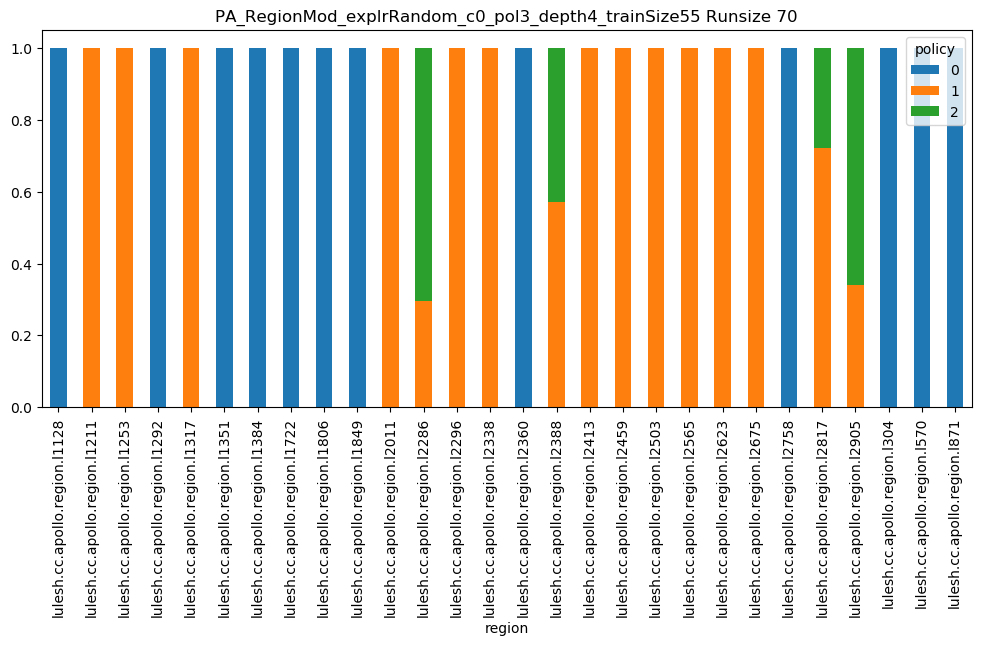

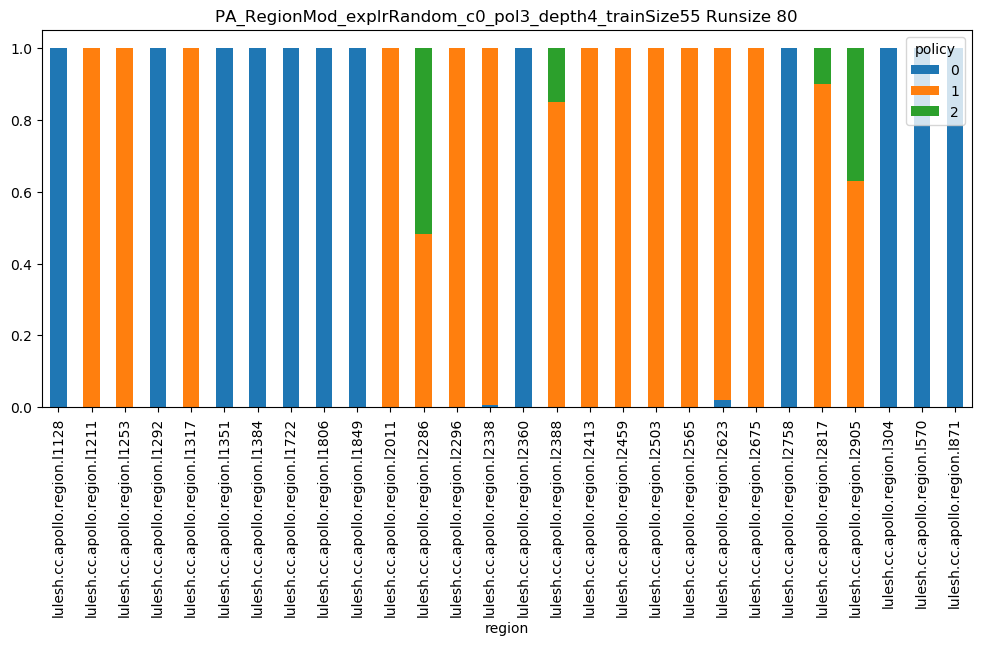

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


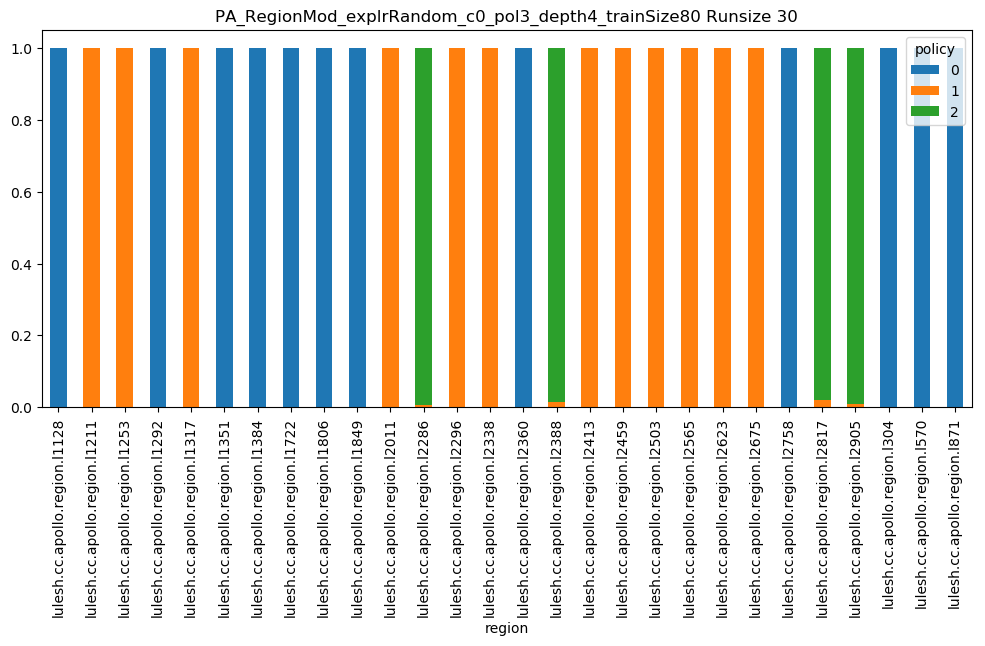

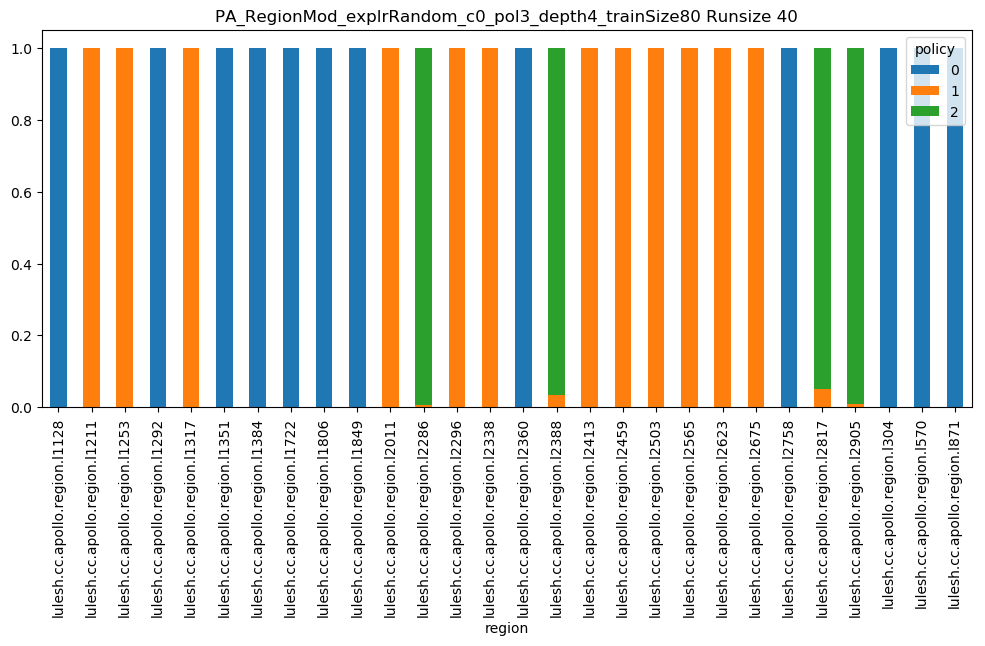

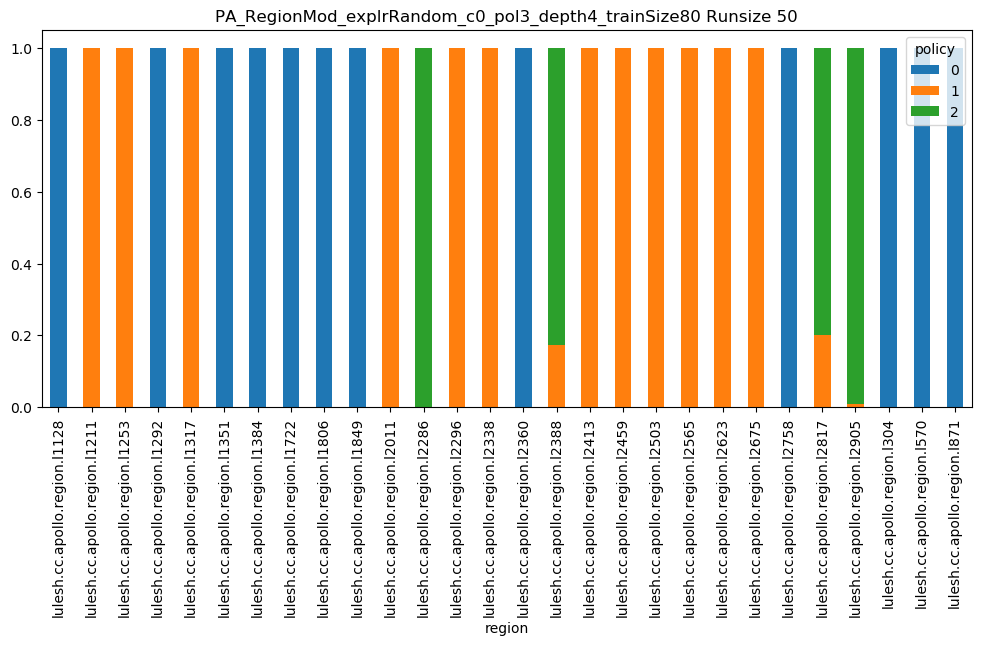

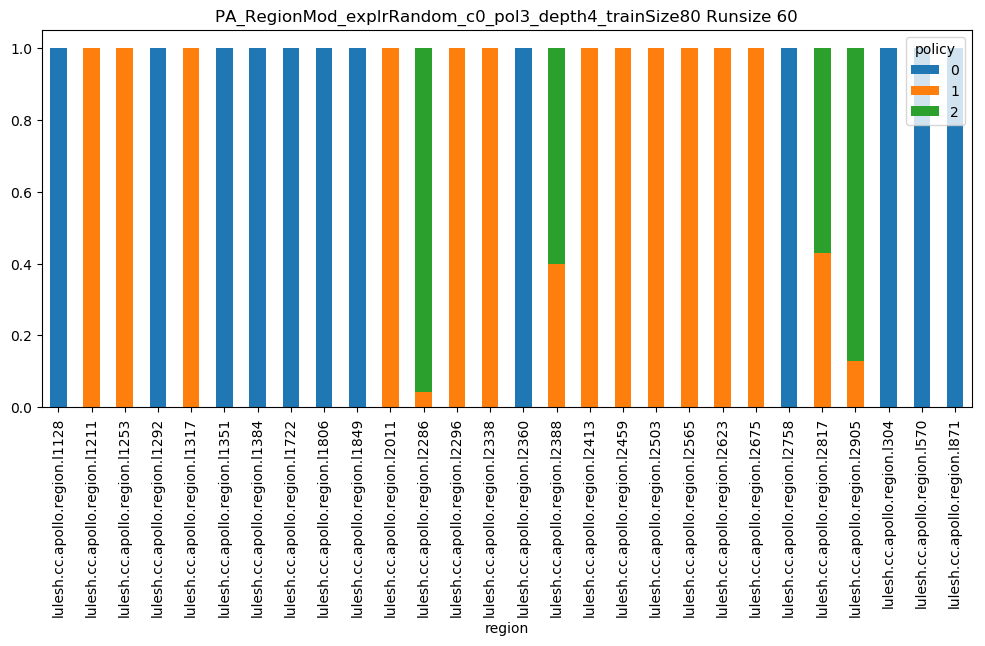

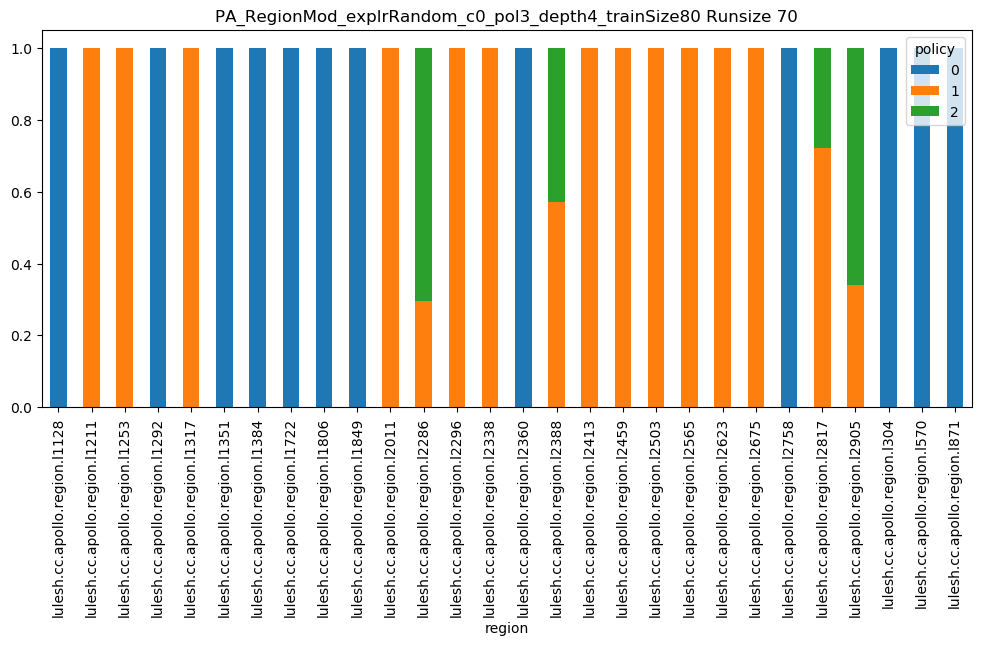

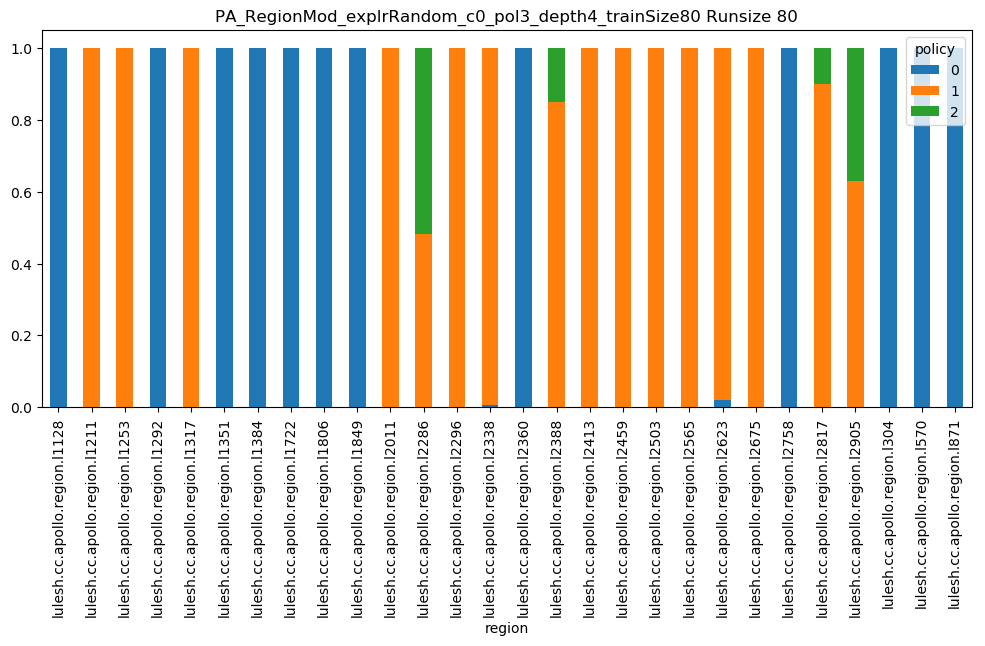

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


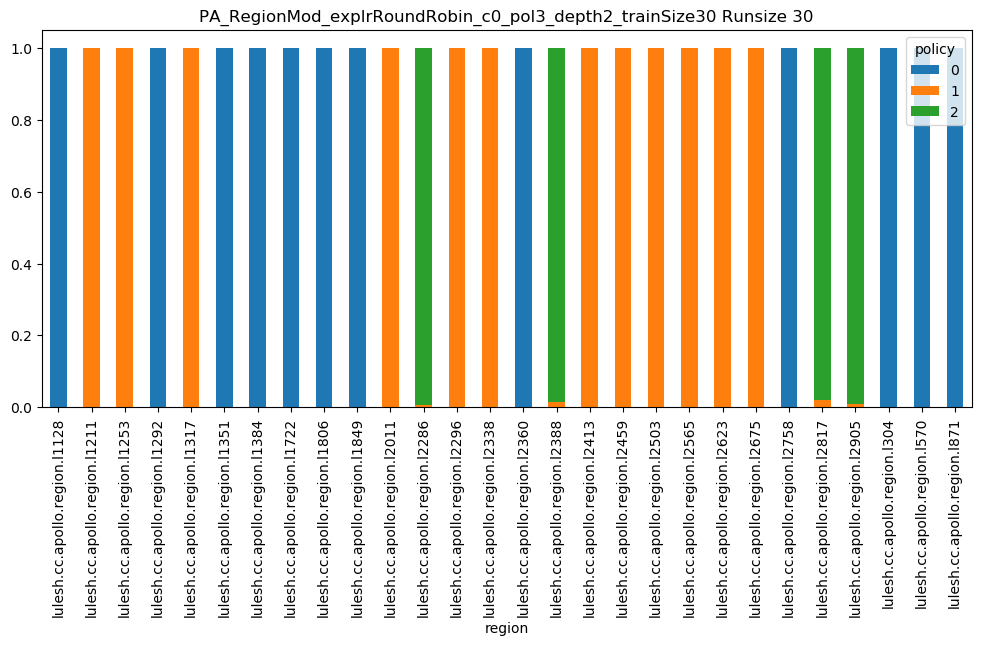

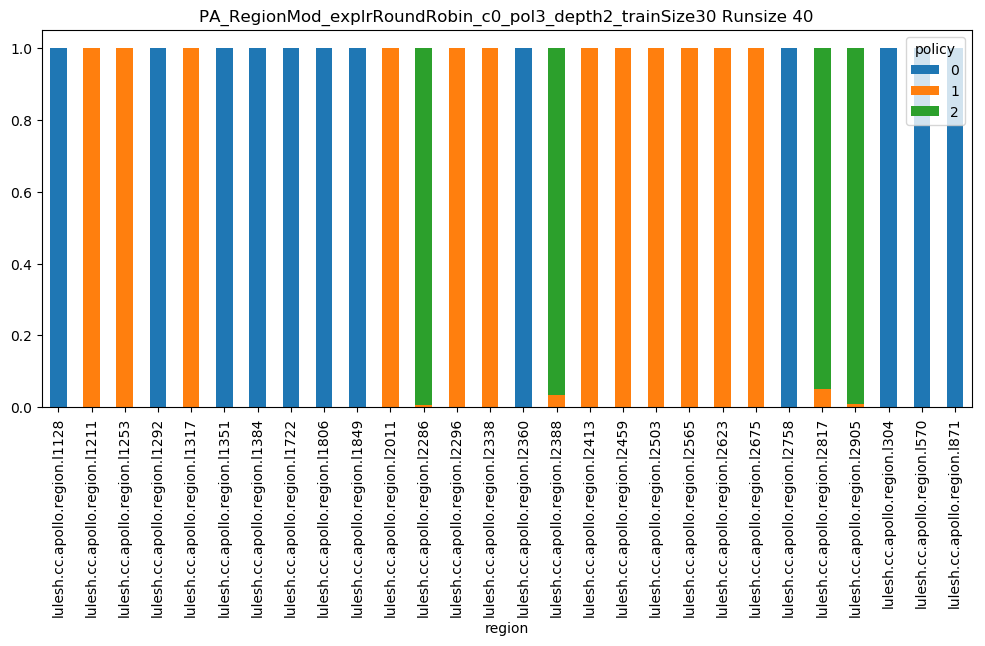

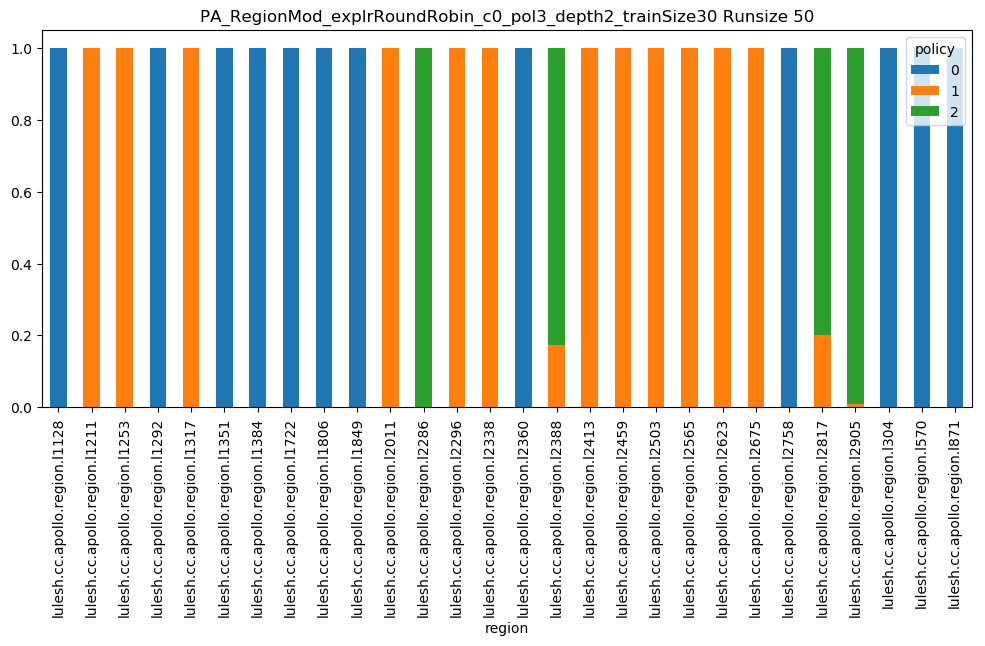

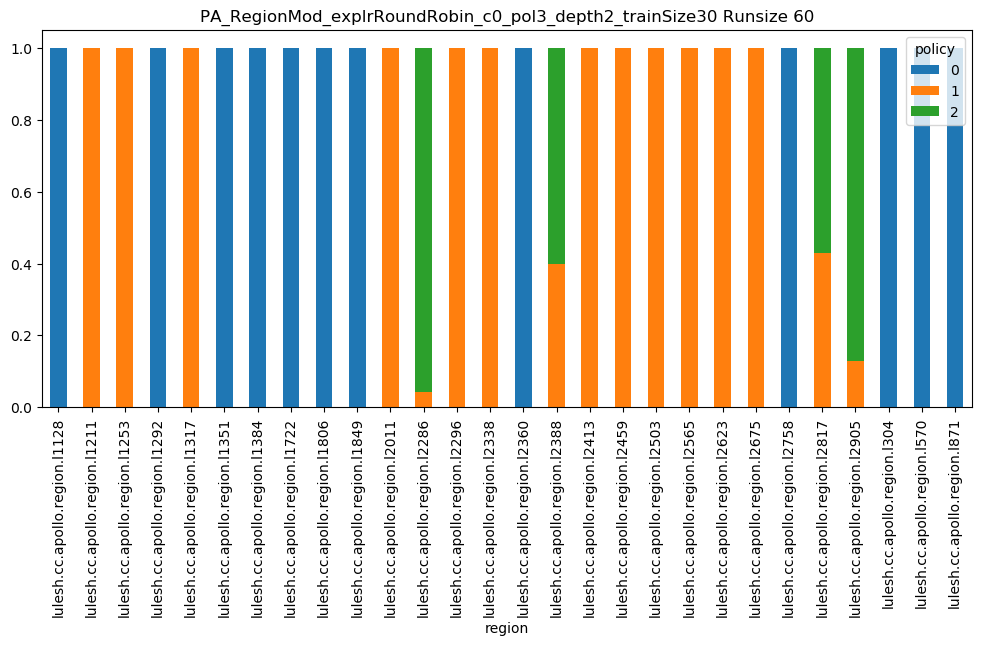

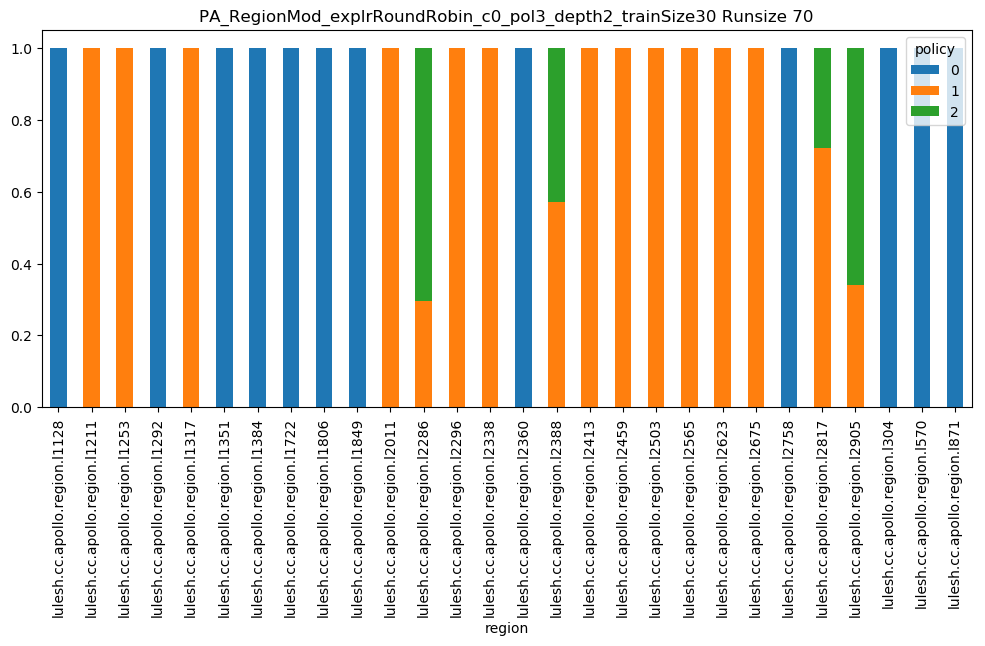

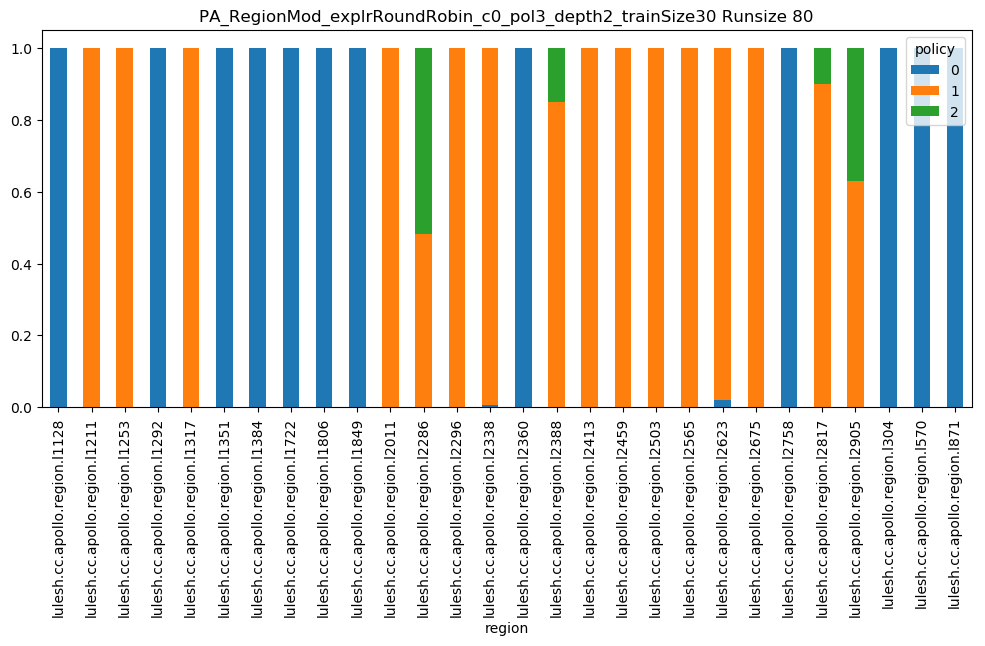

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 56 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


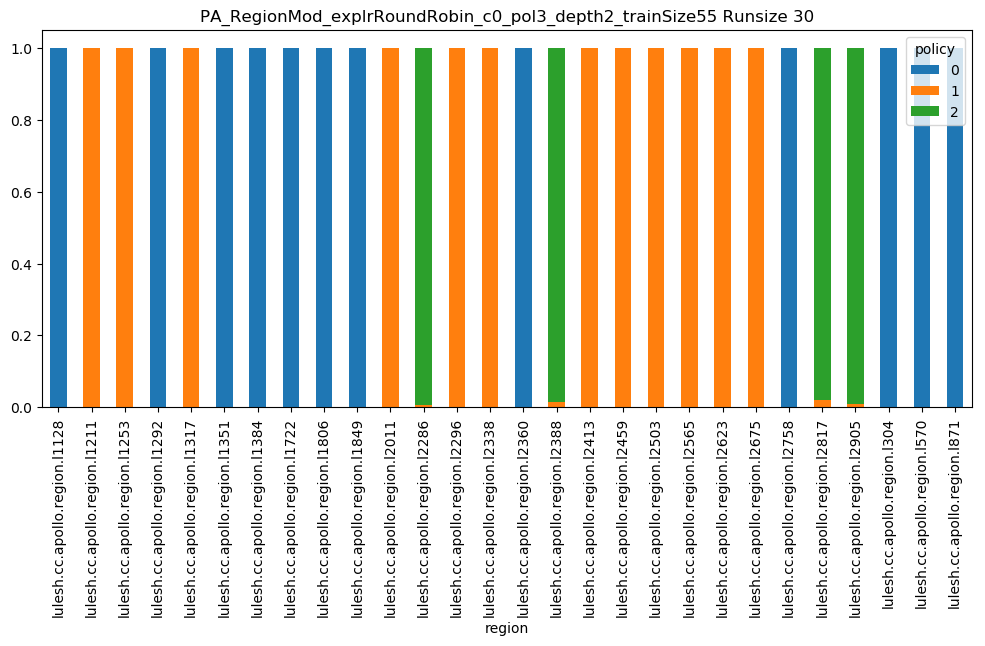

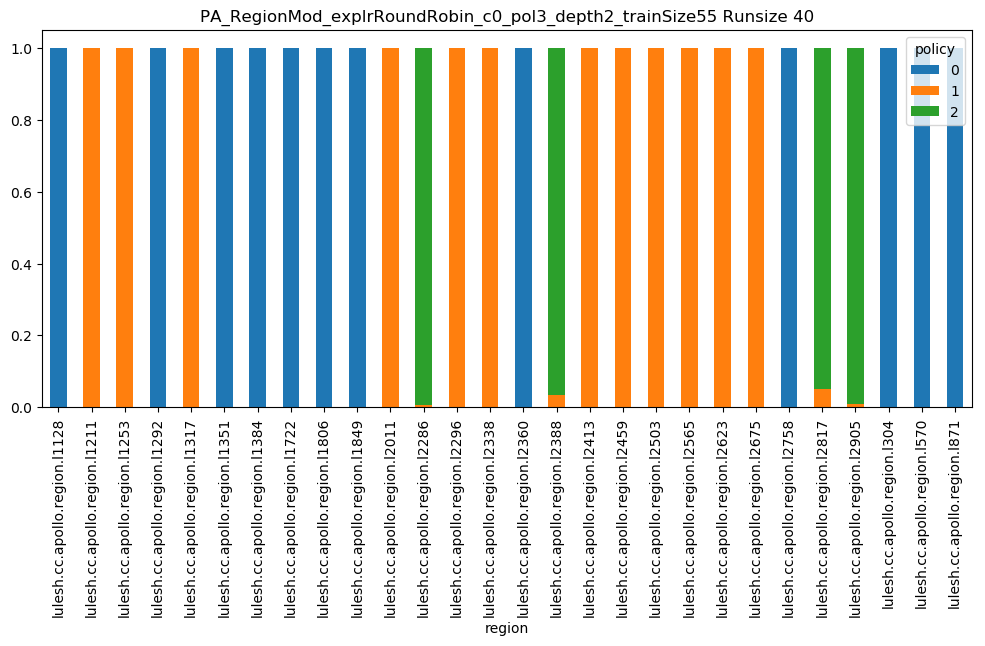

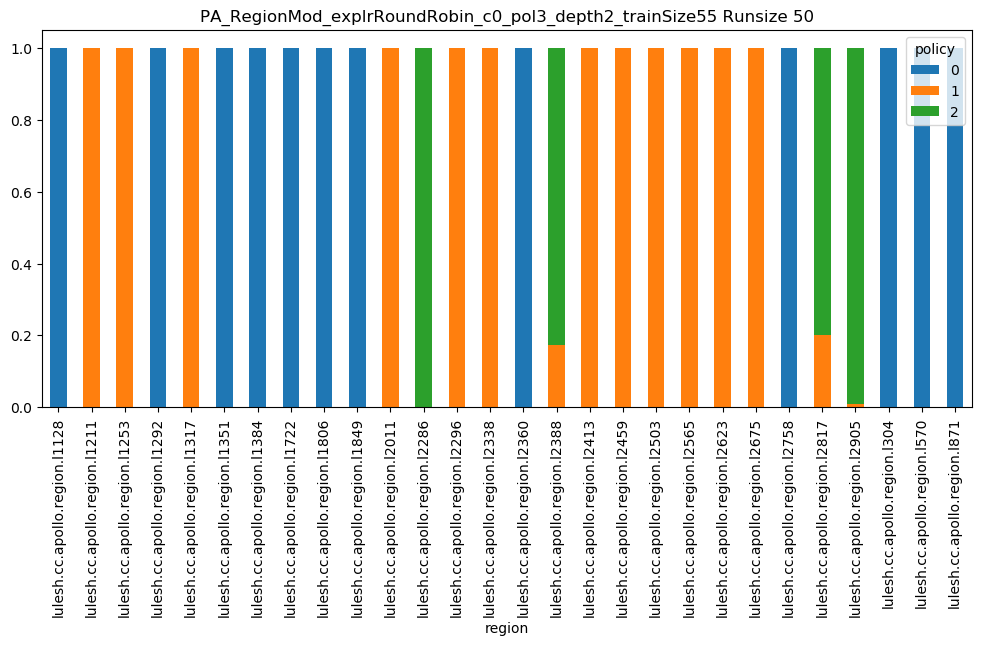

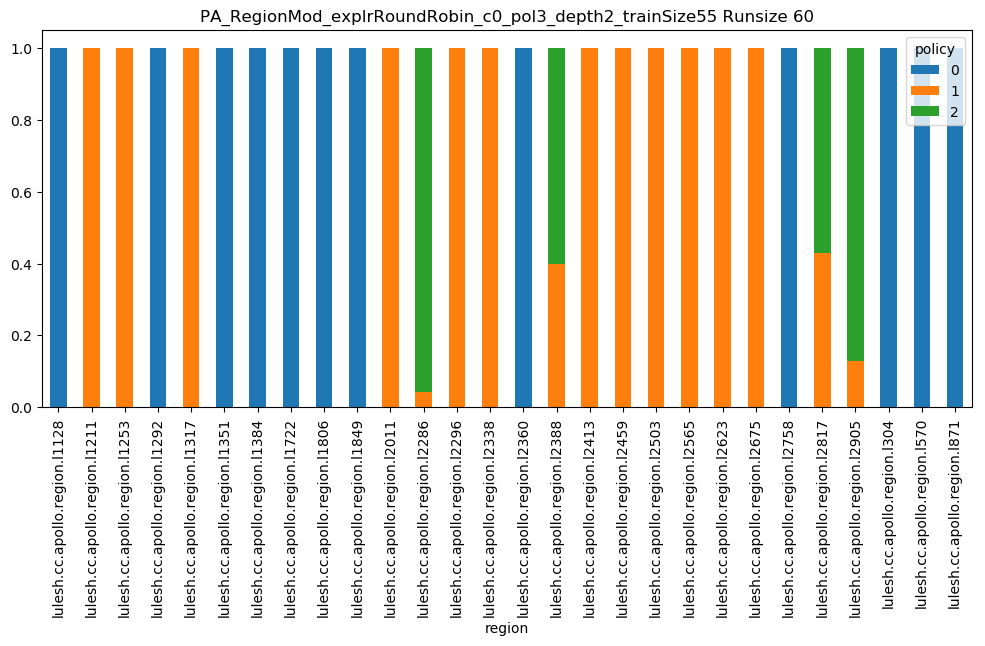

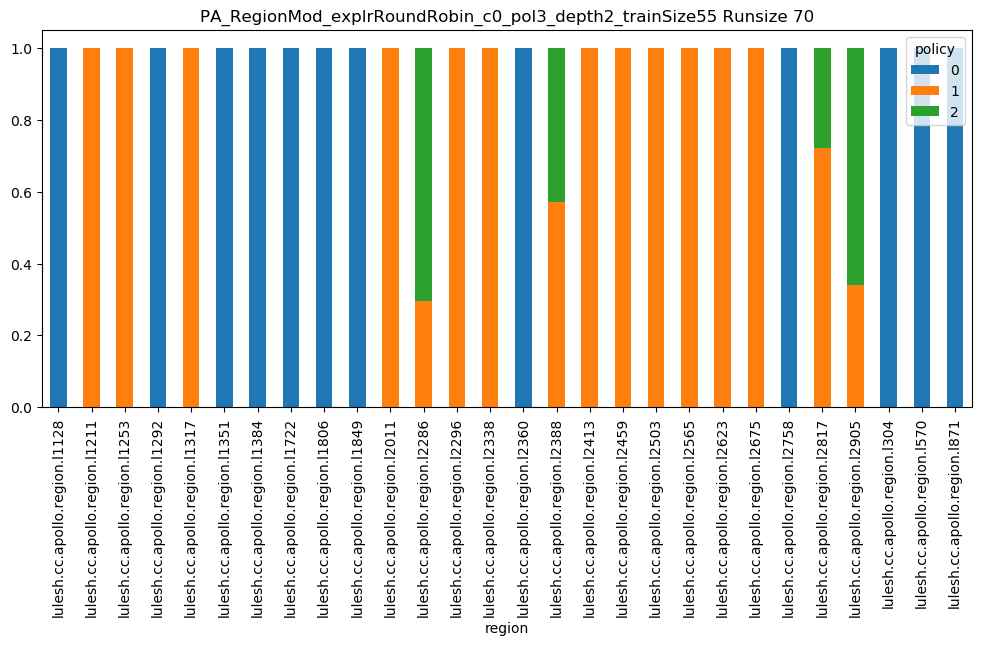

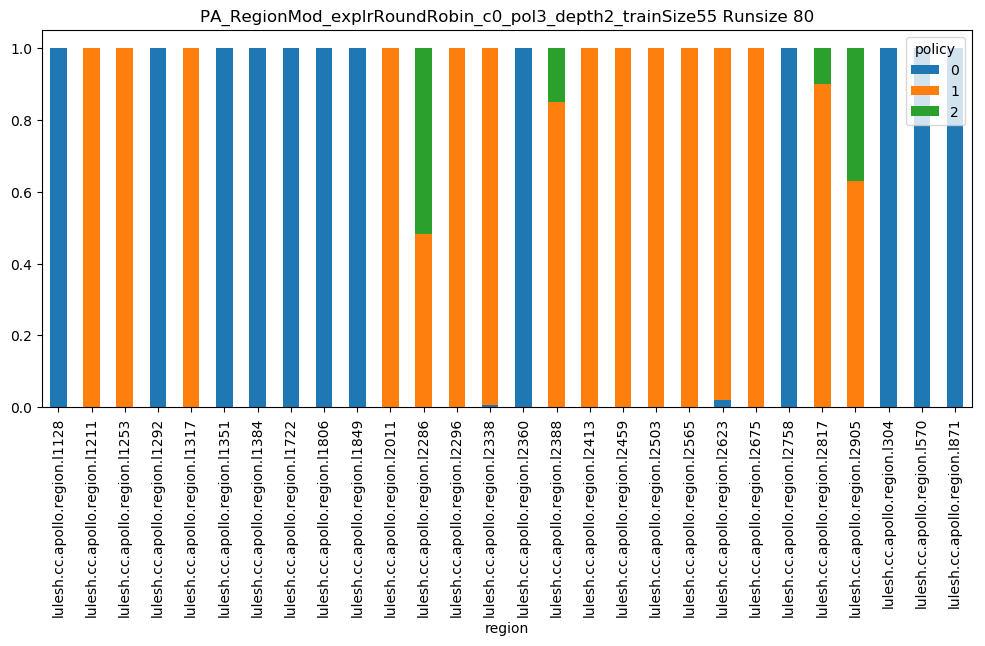

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 64 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


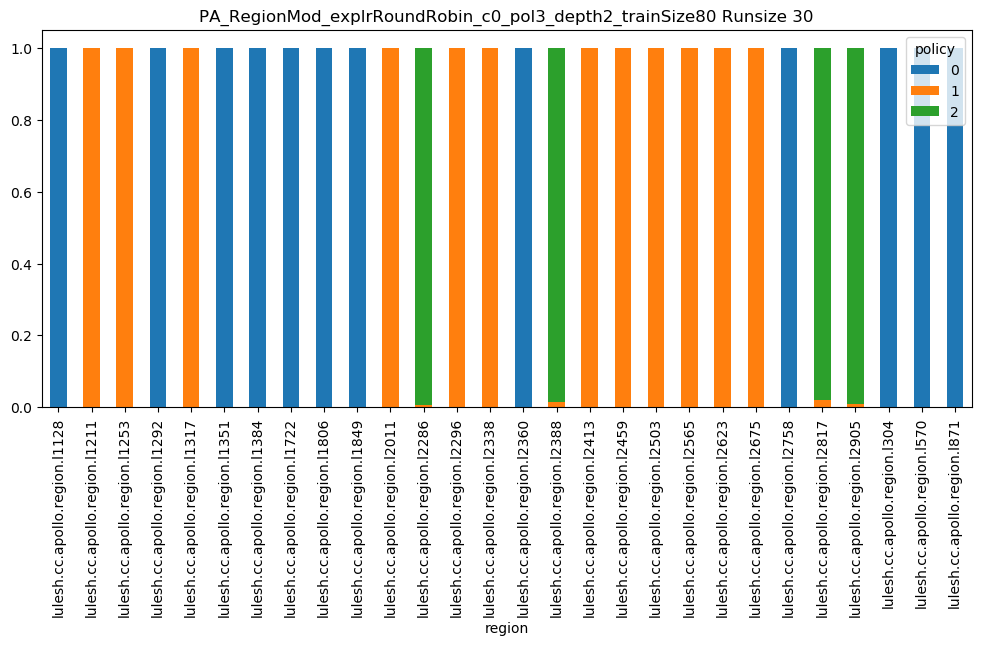

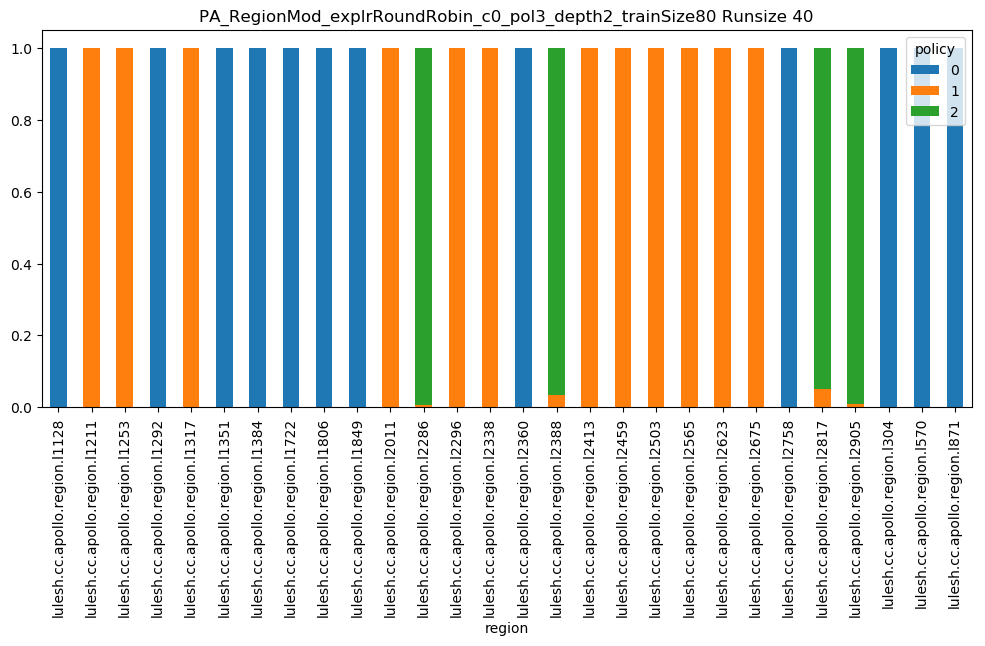

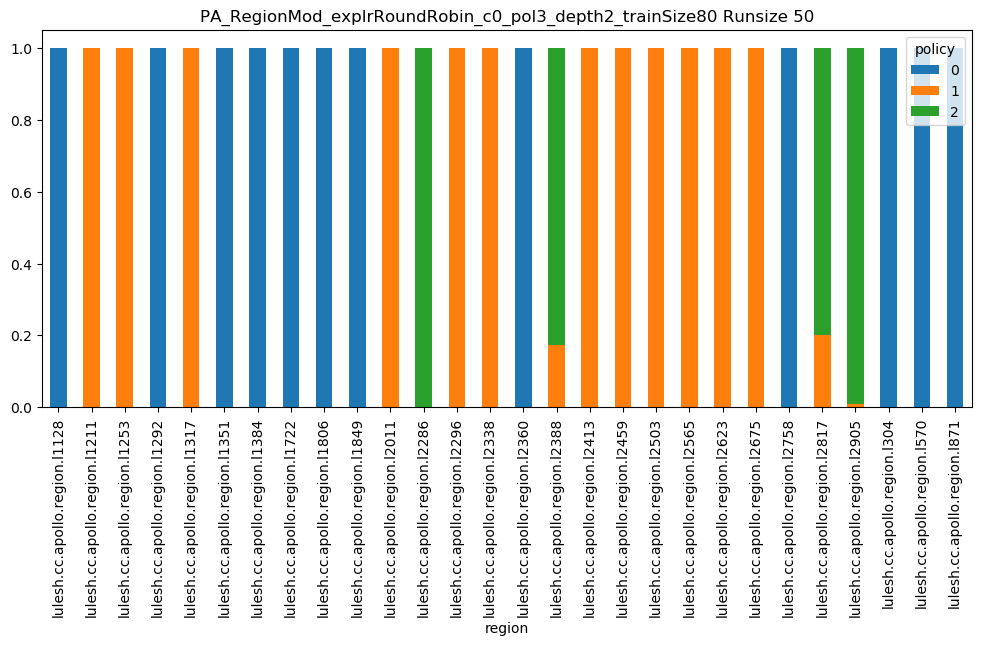

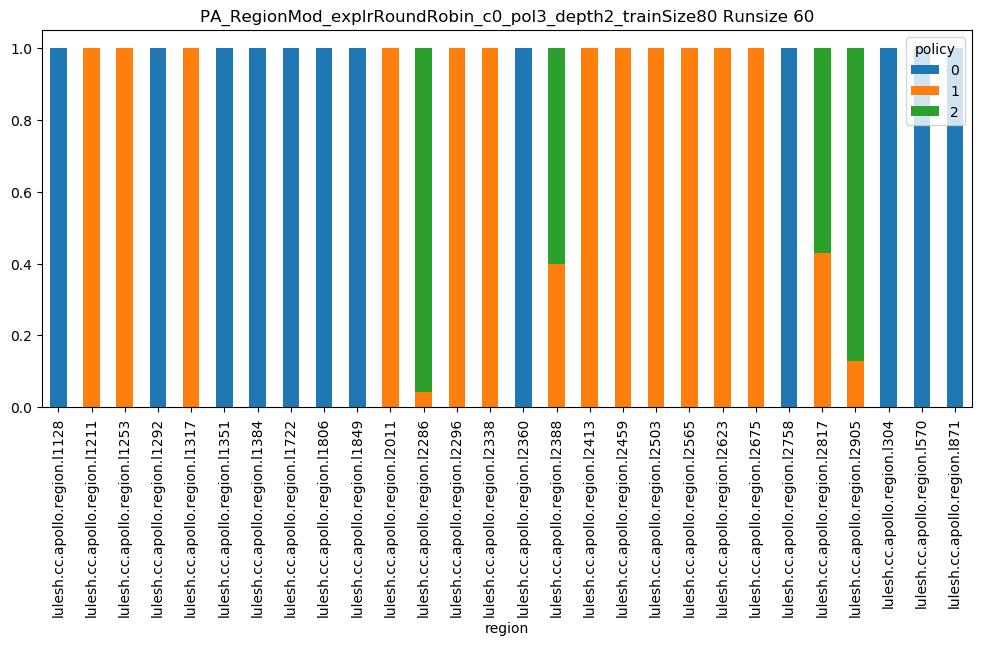

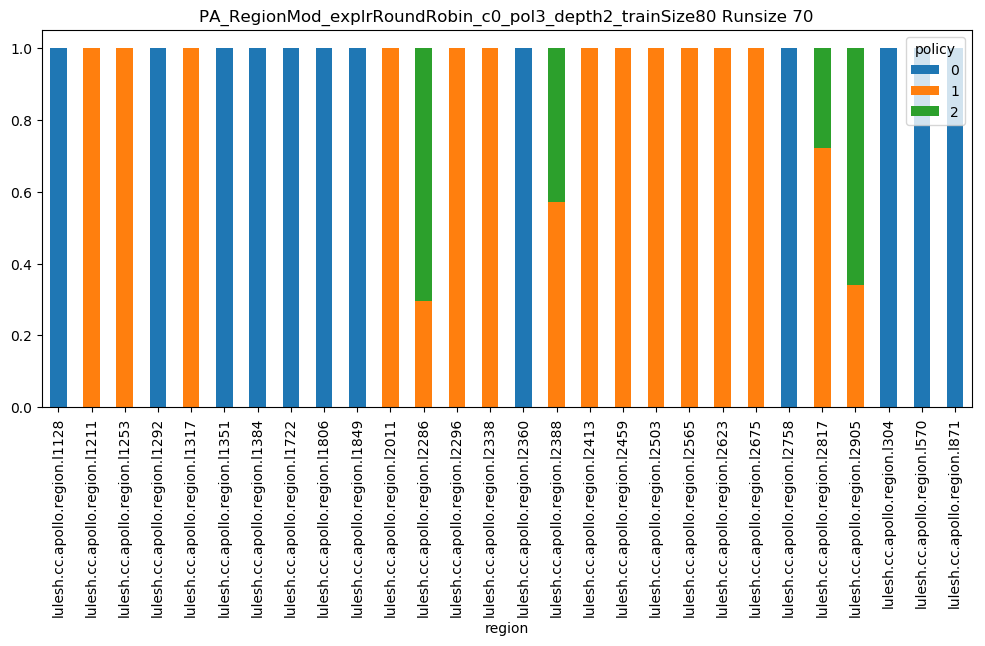

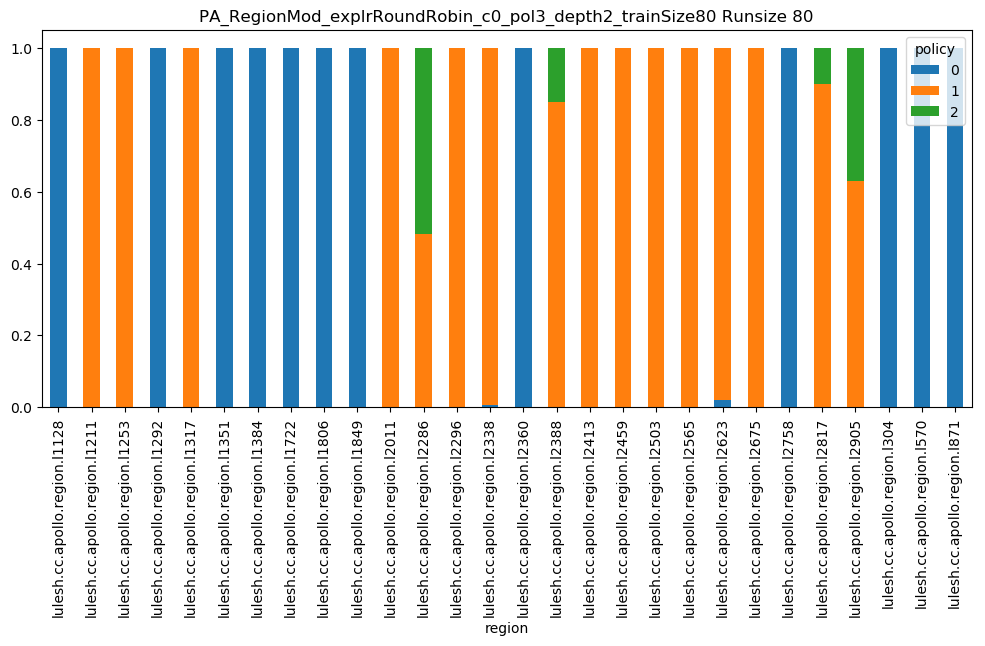

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 67 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


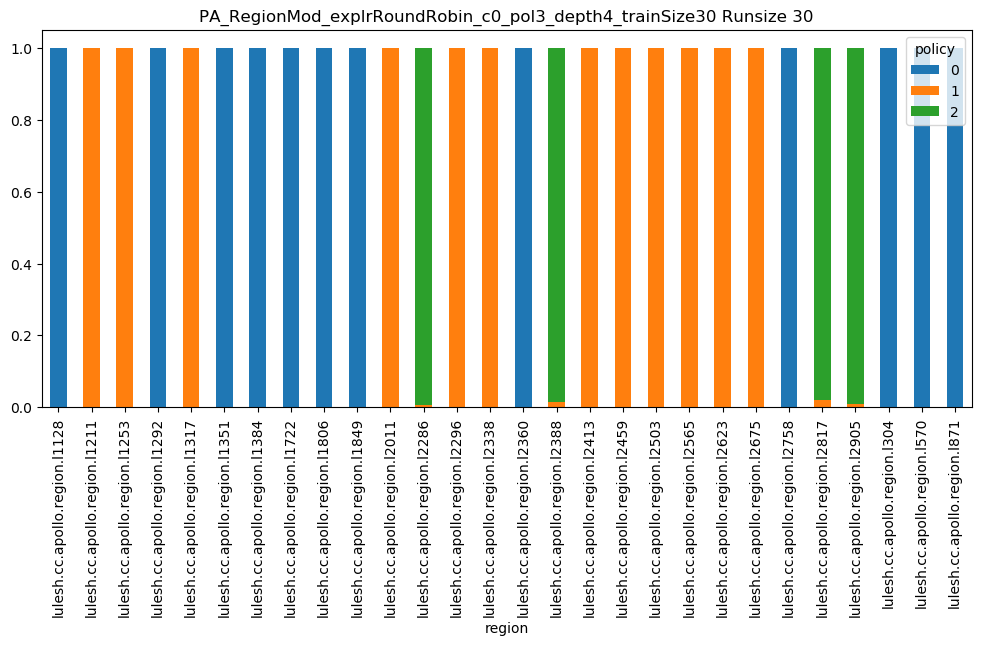

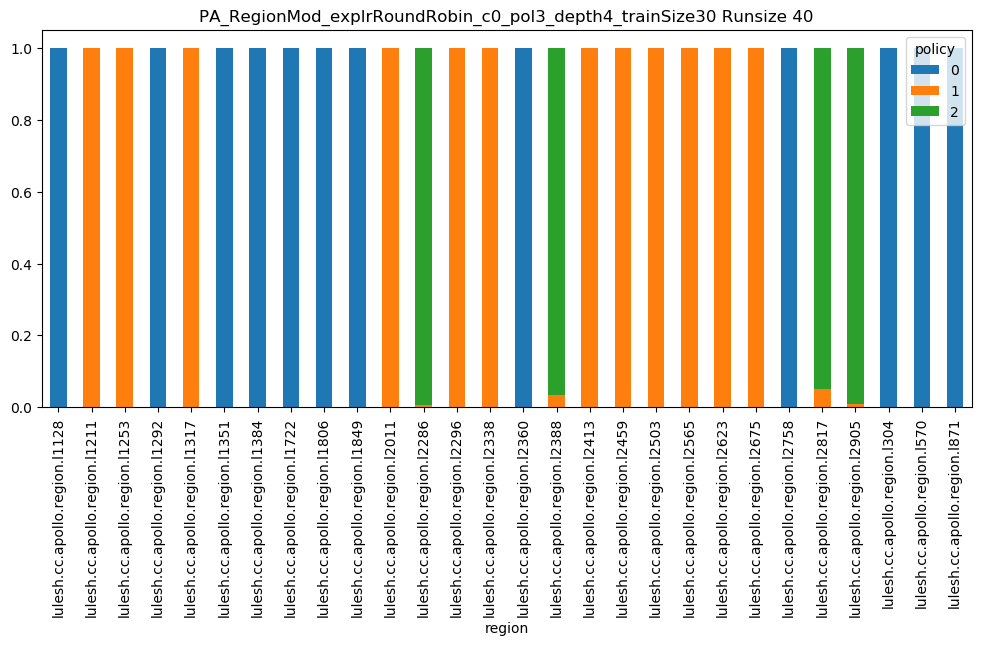

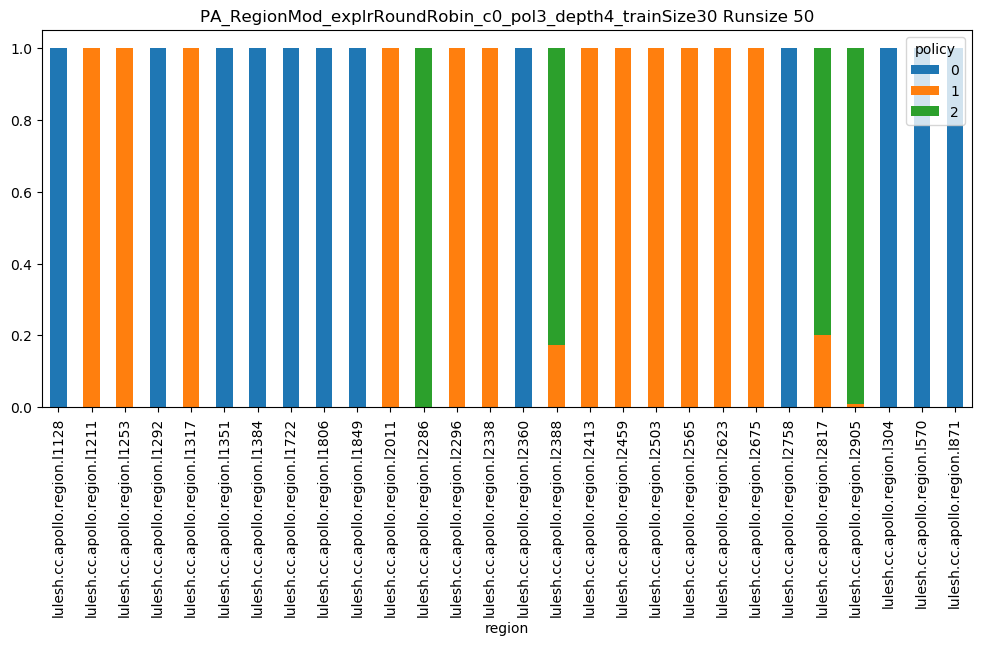

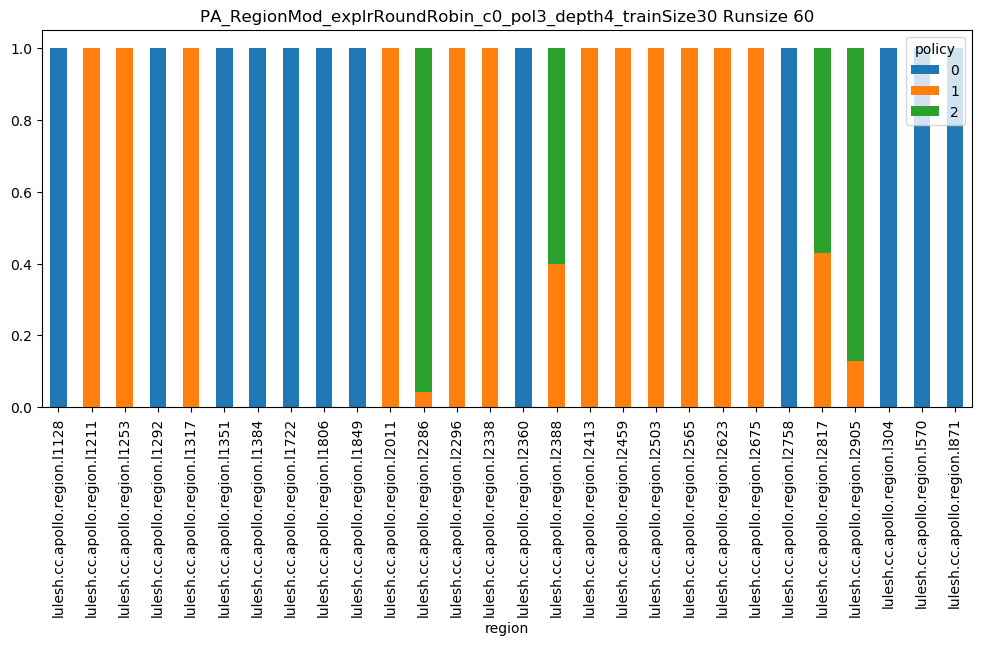

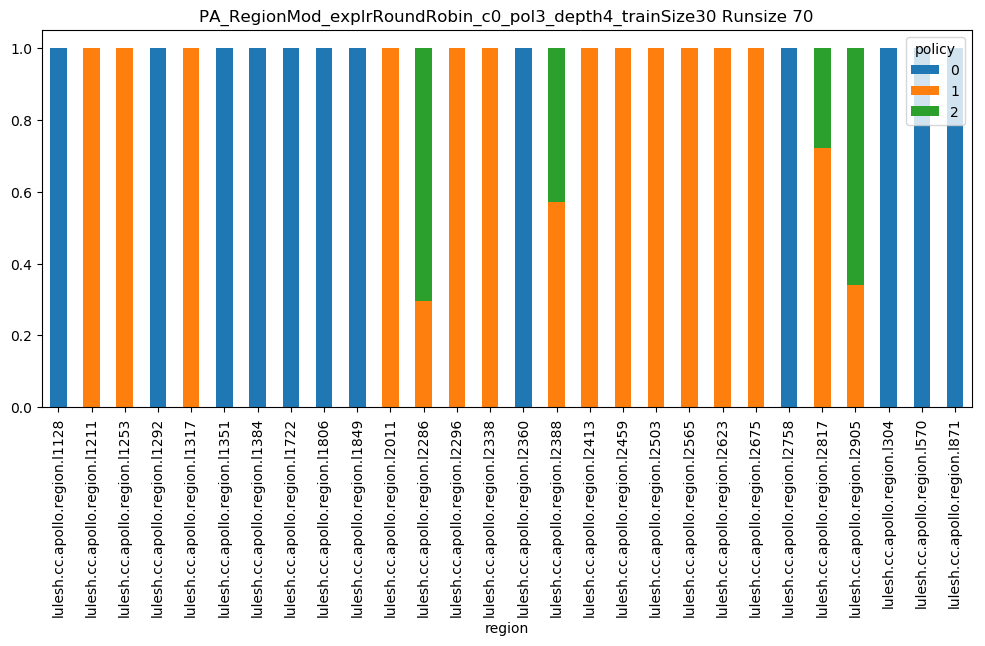

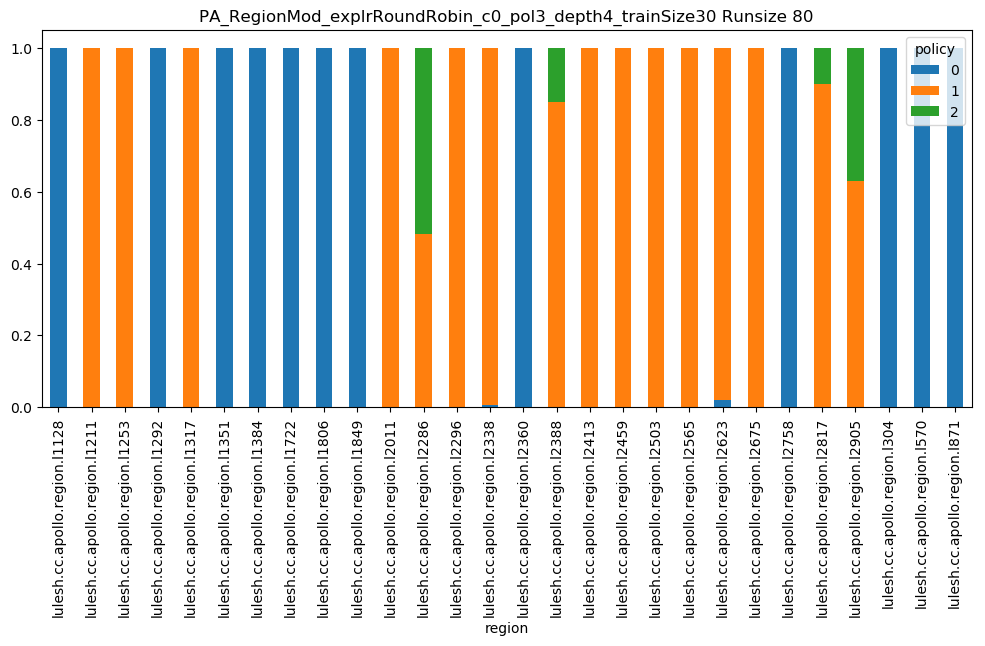

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 66 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


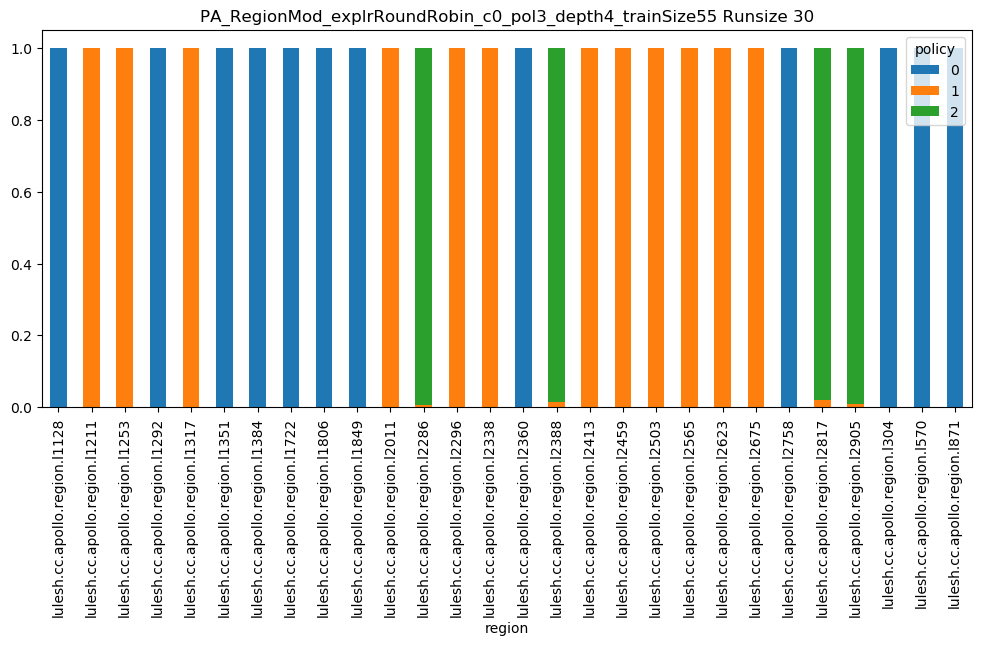

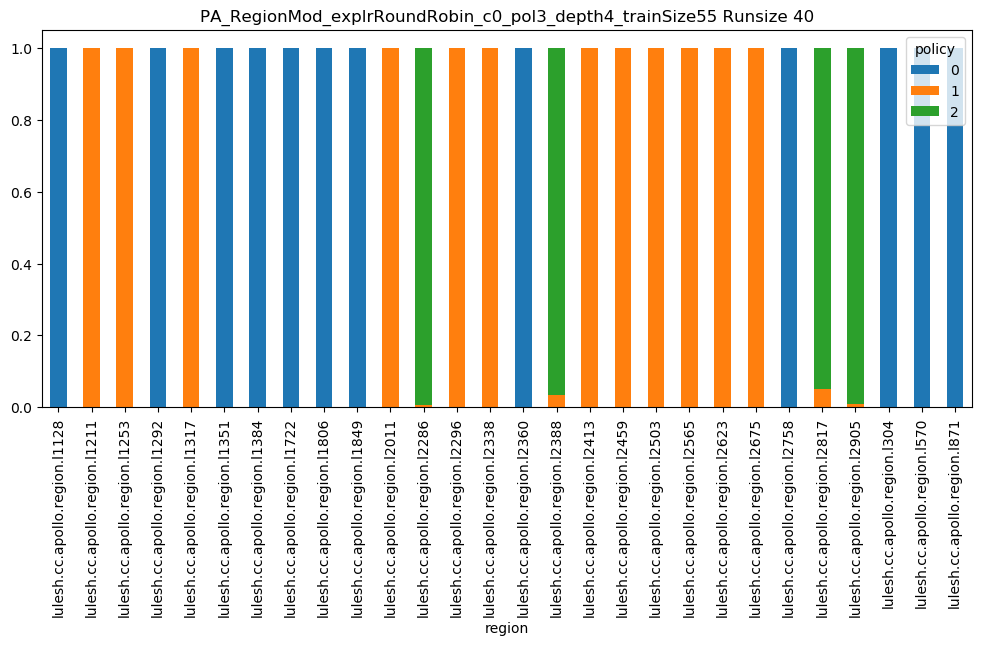

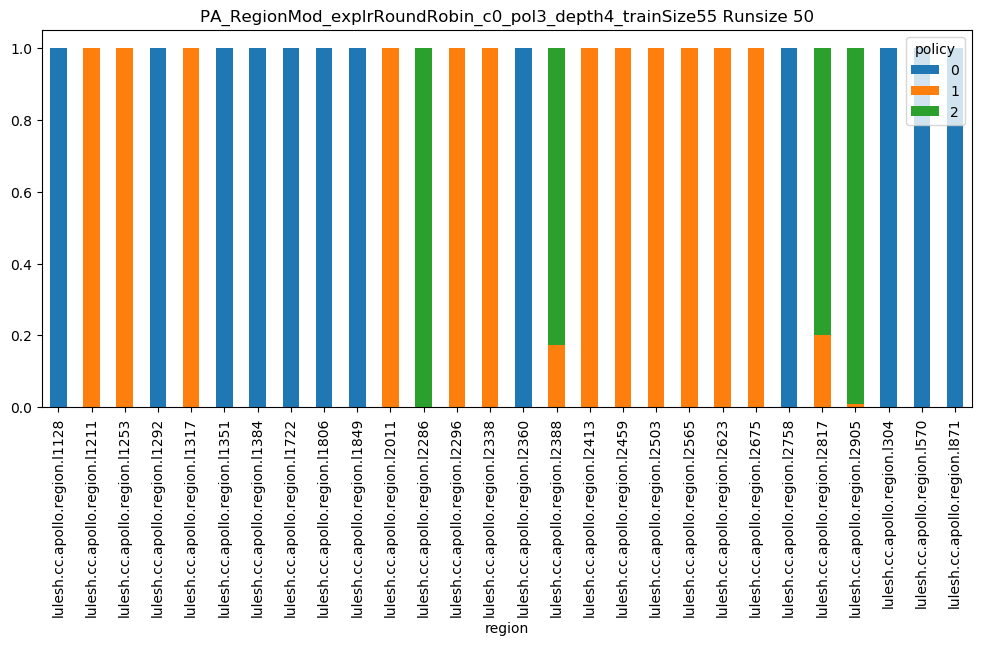

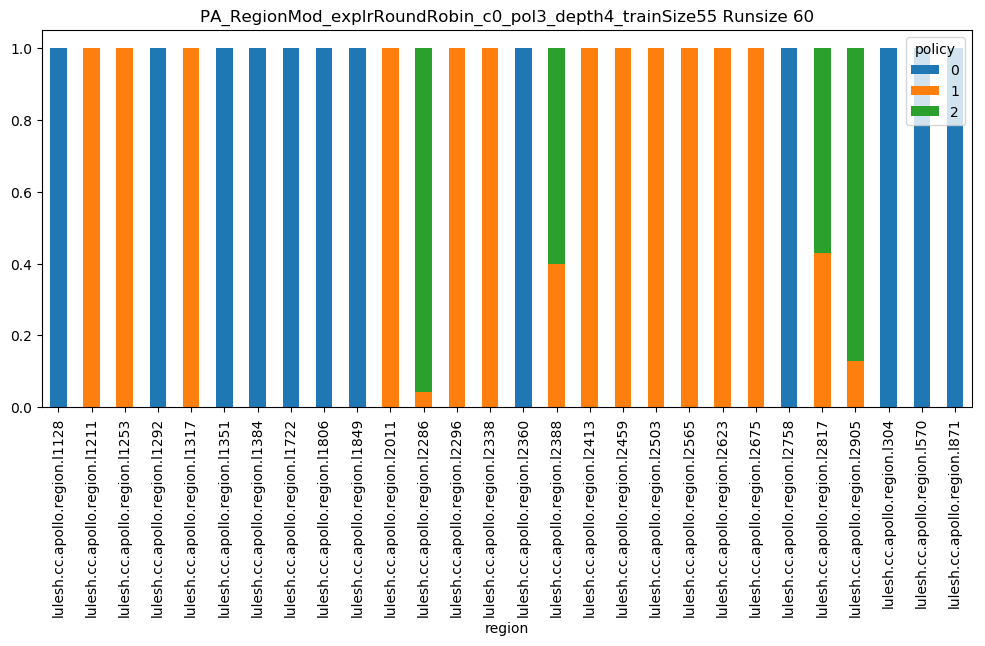

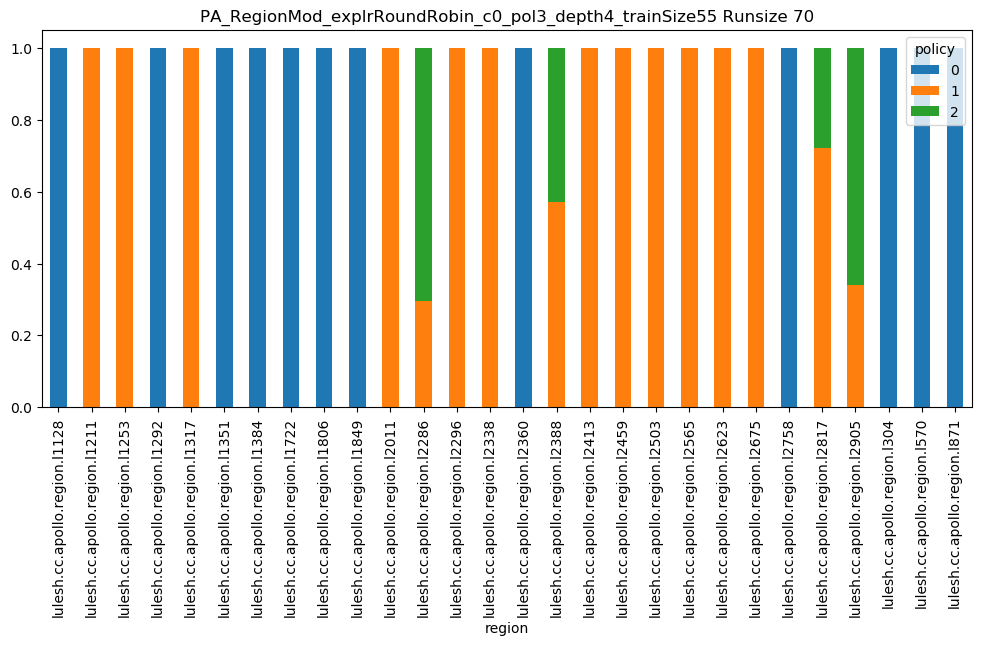

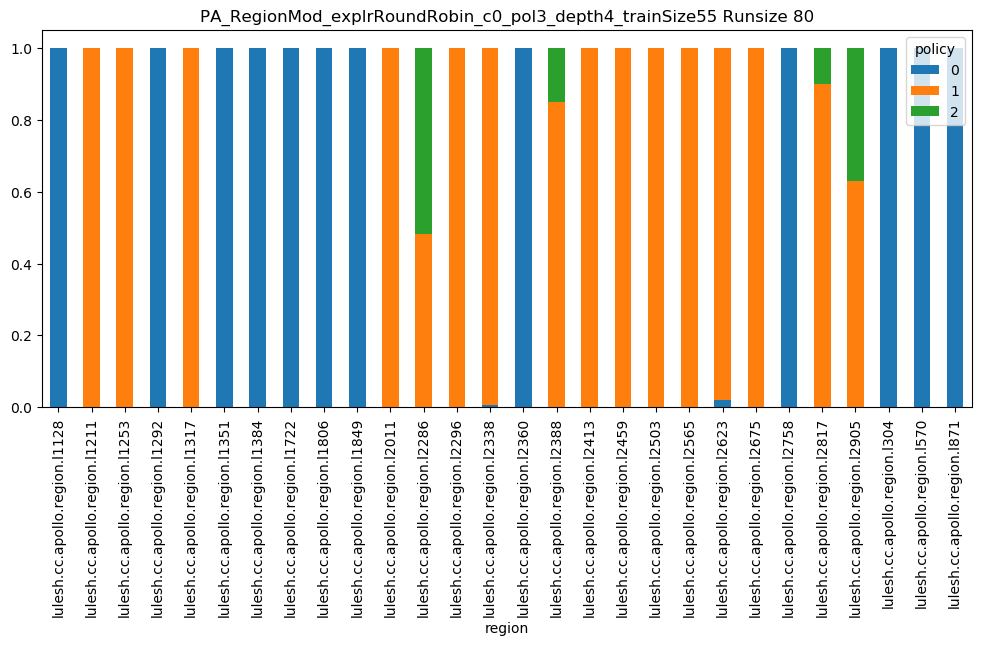

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 65 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


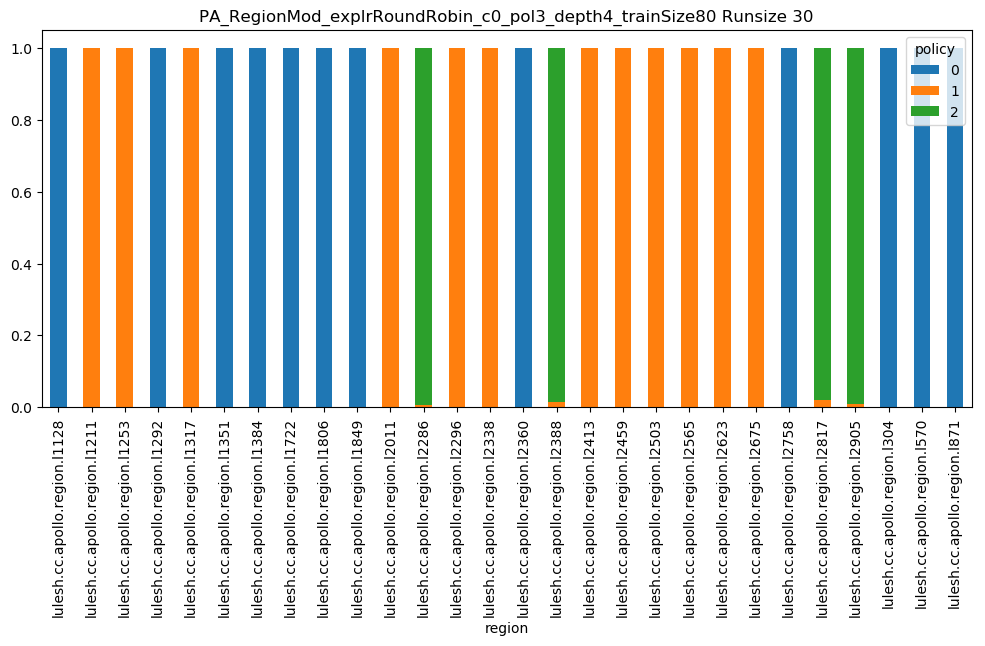

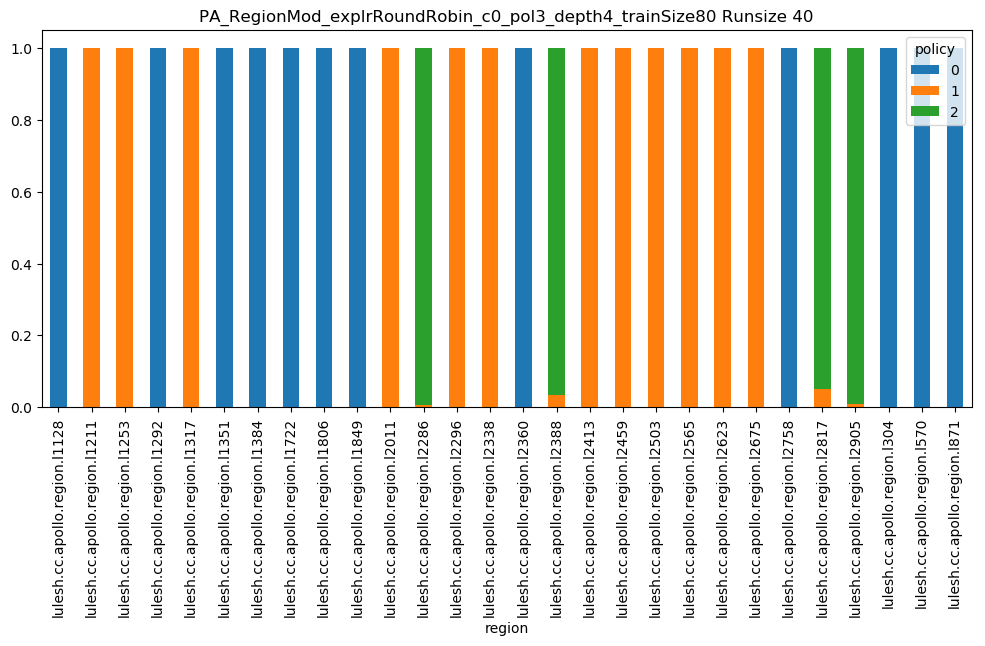

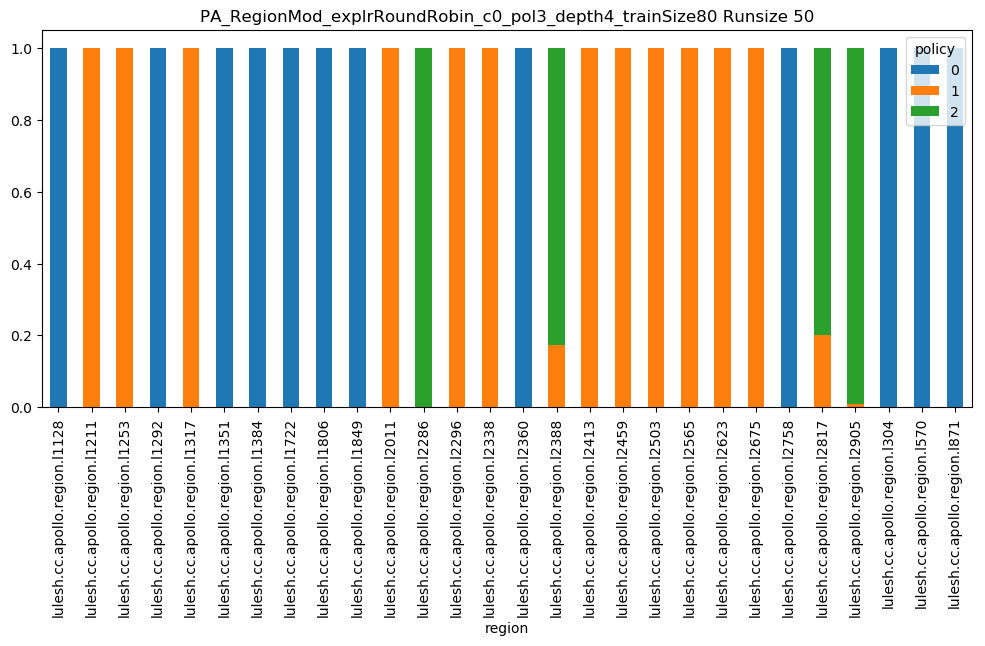

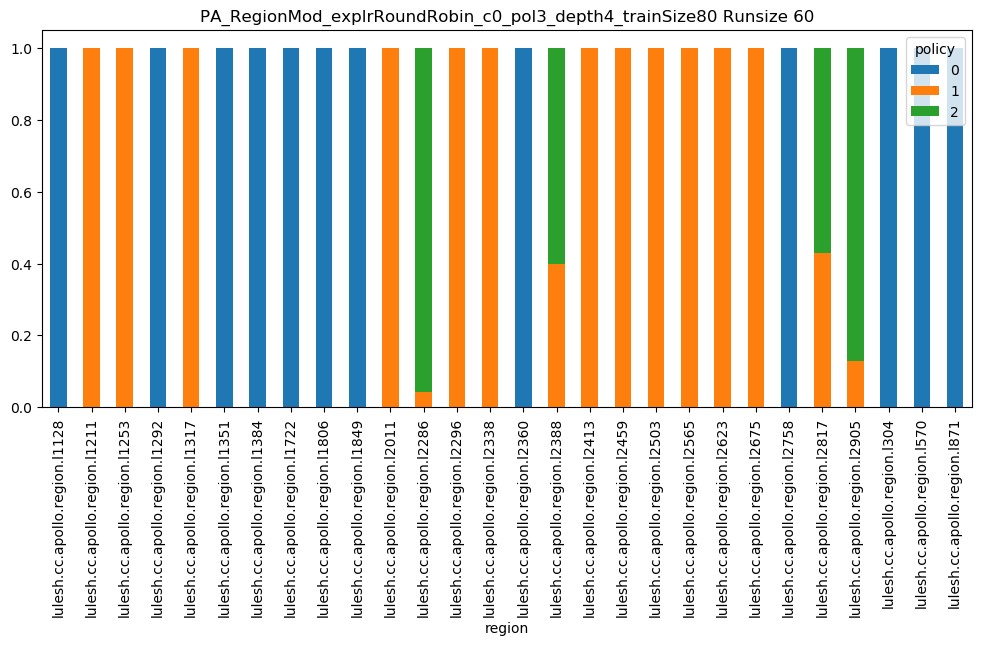

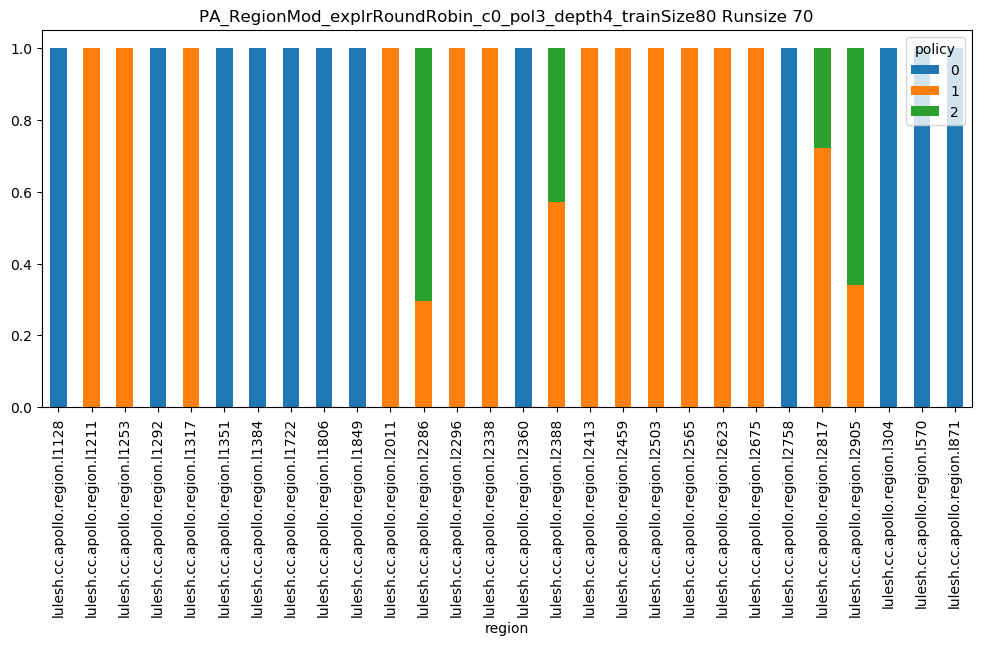

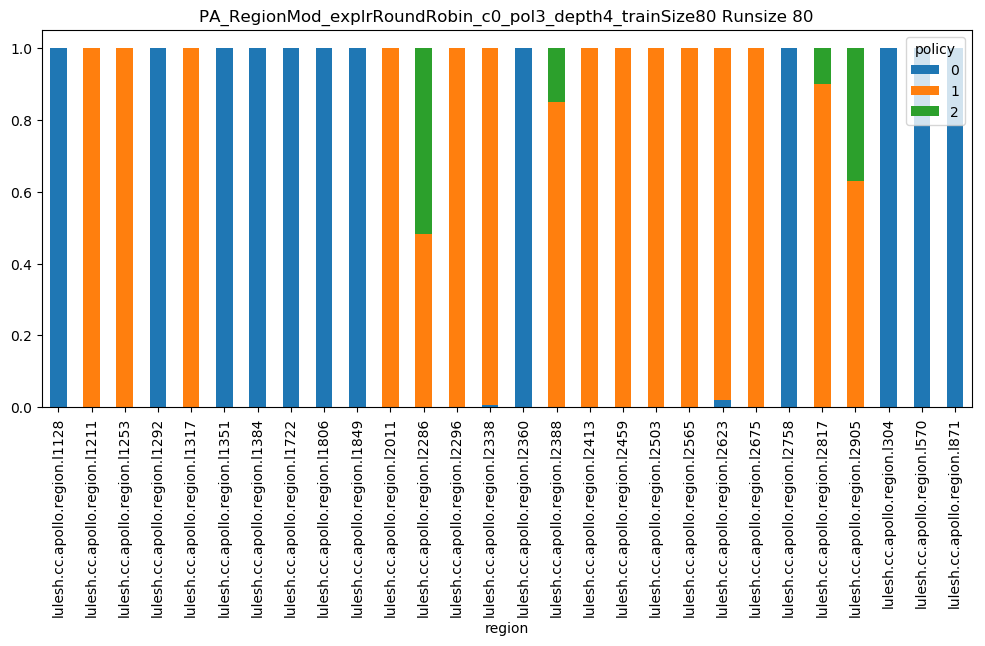

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 59 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


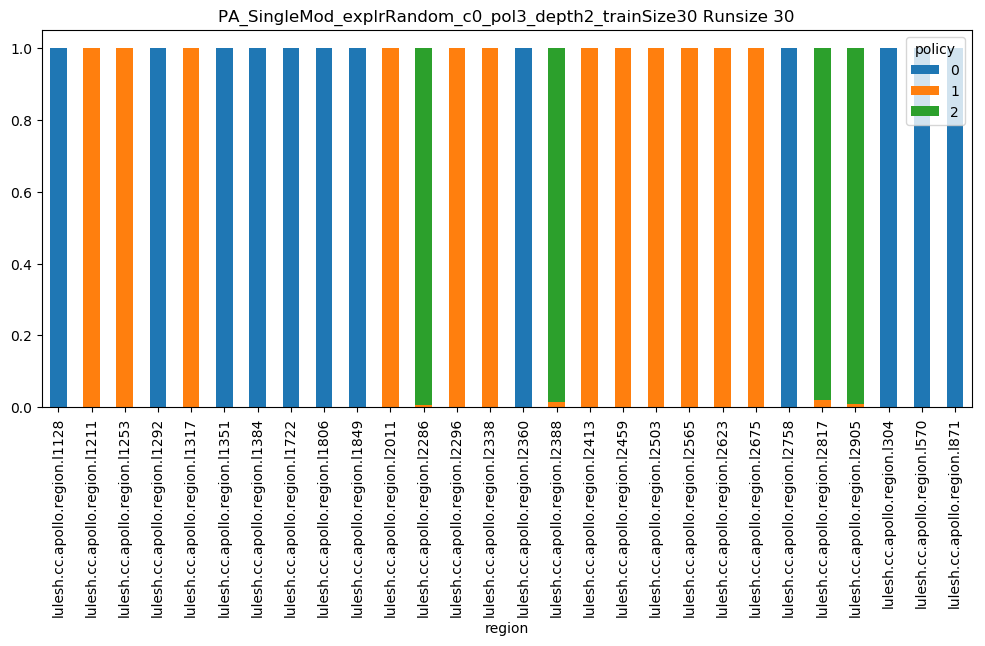

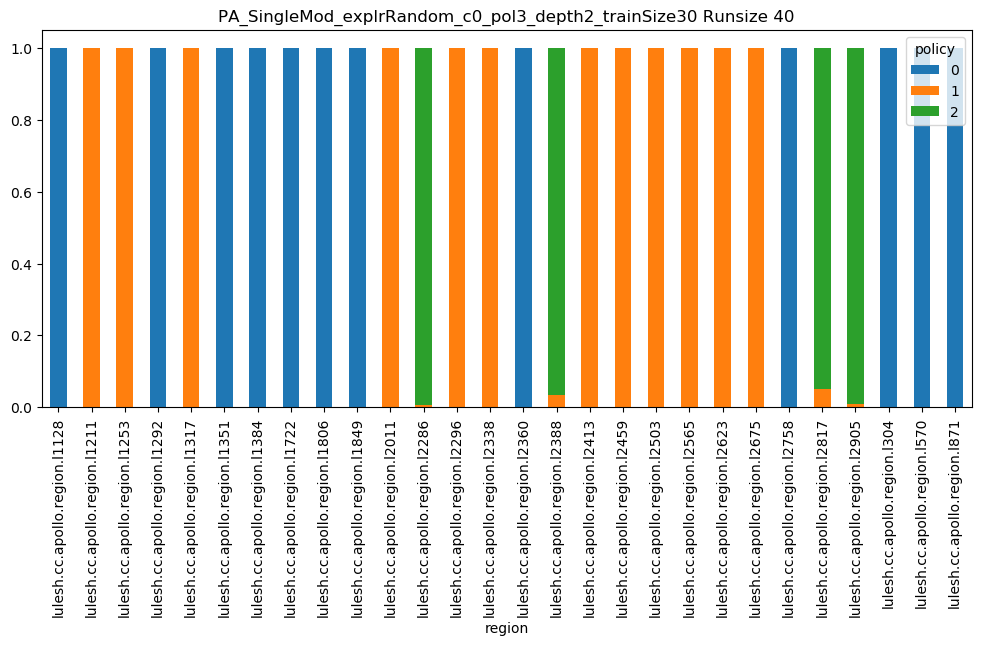

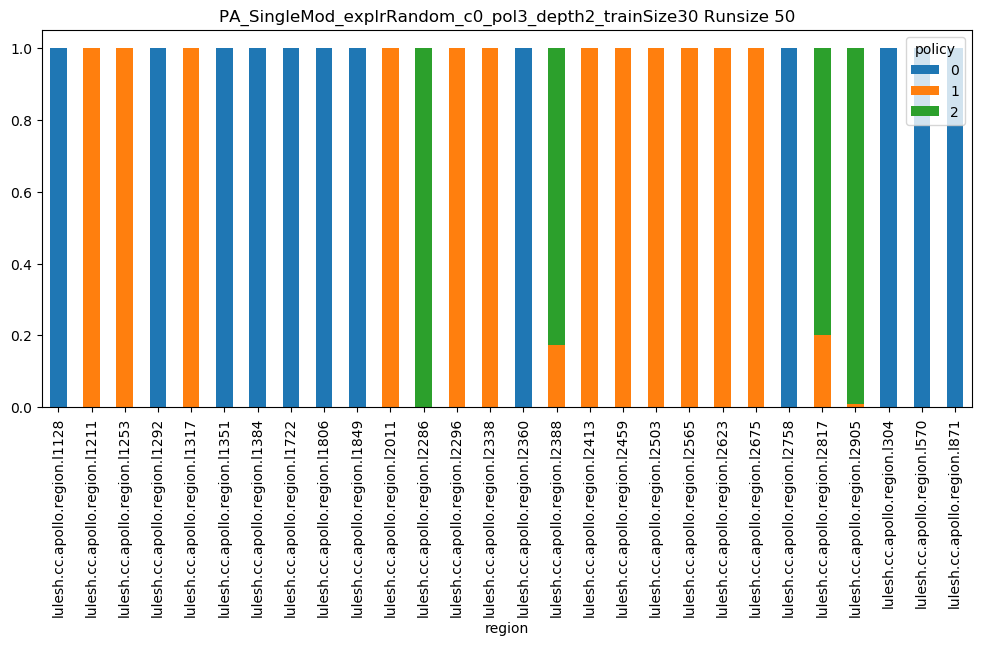

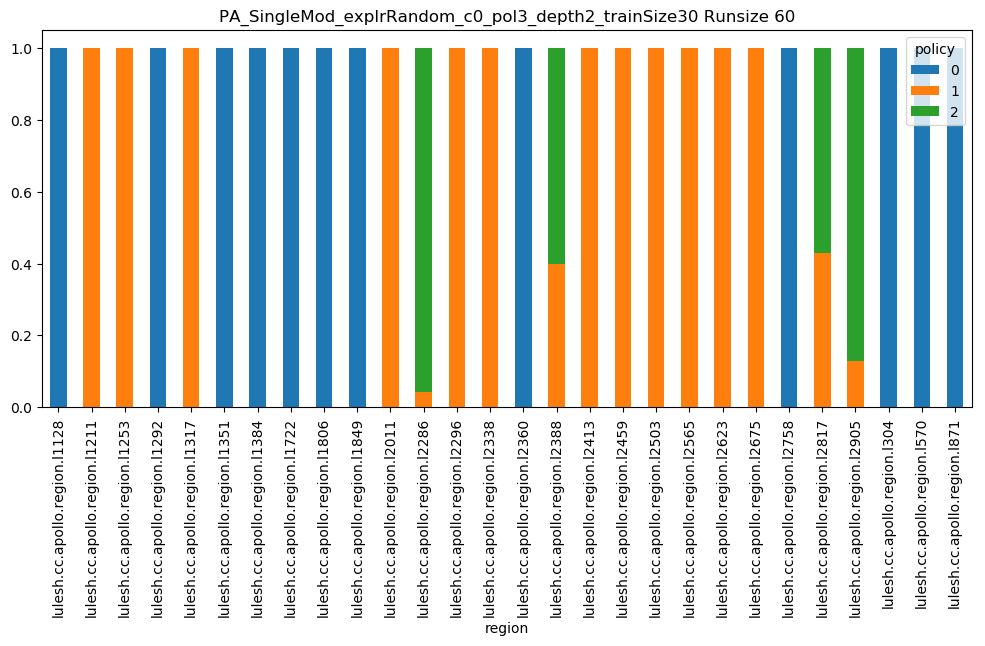

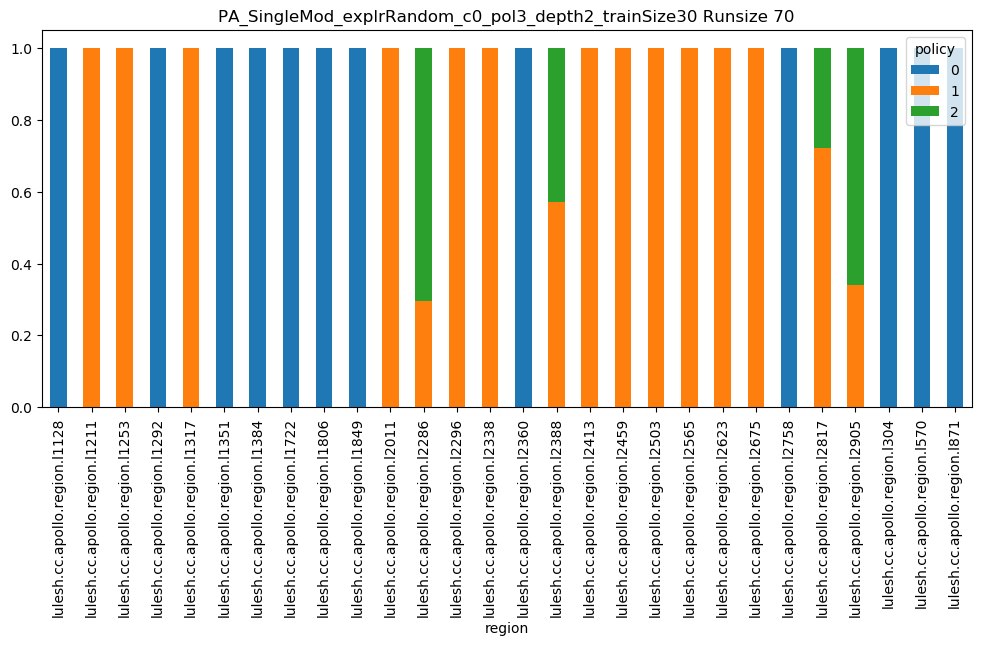

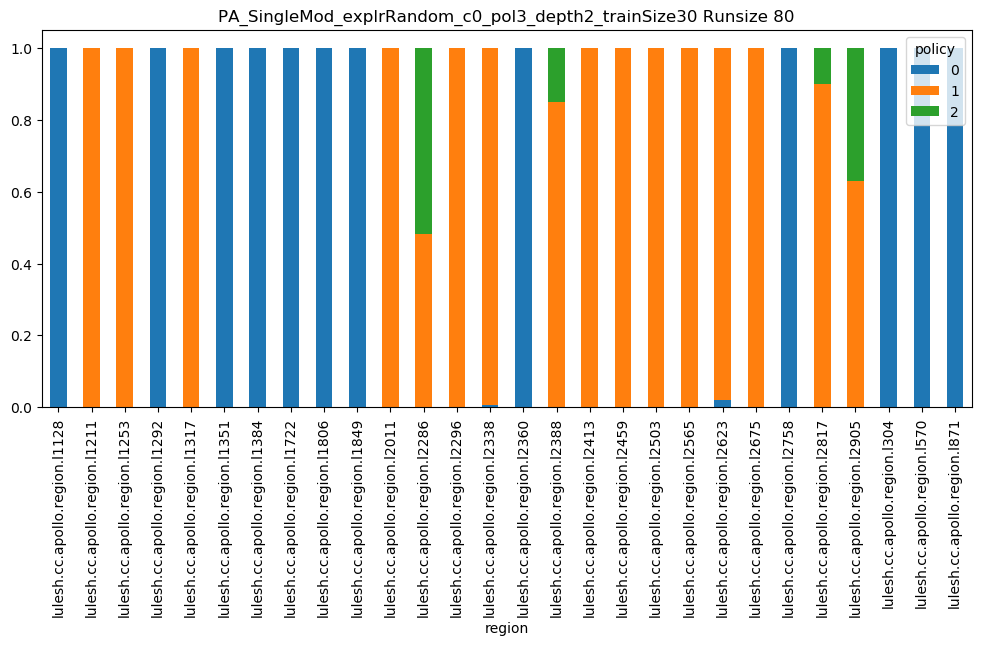

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 60 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


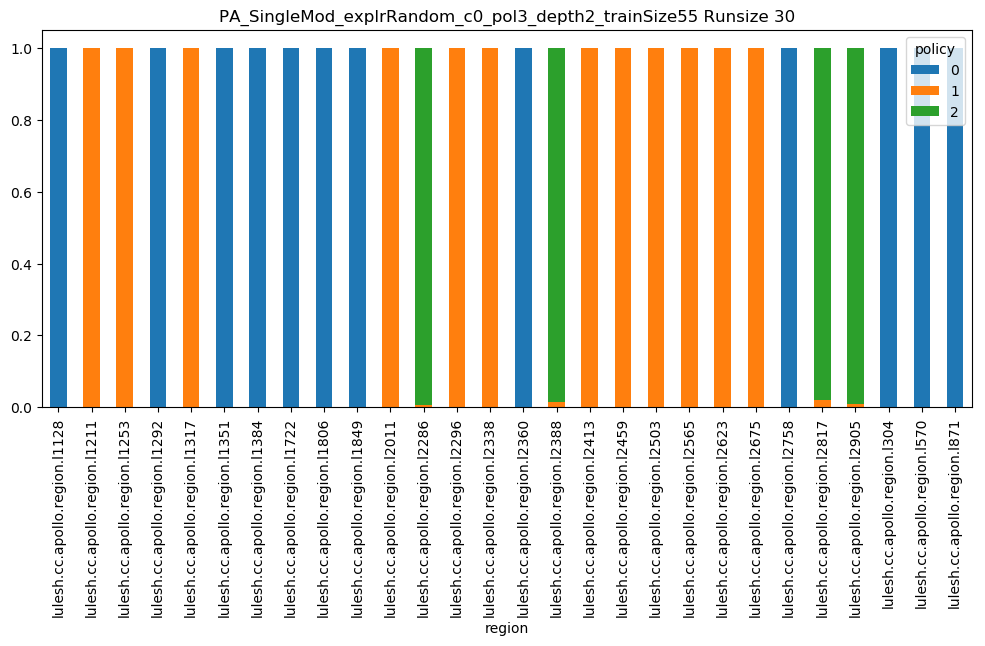

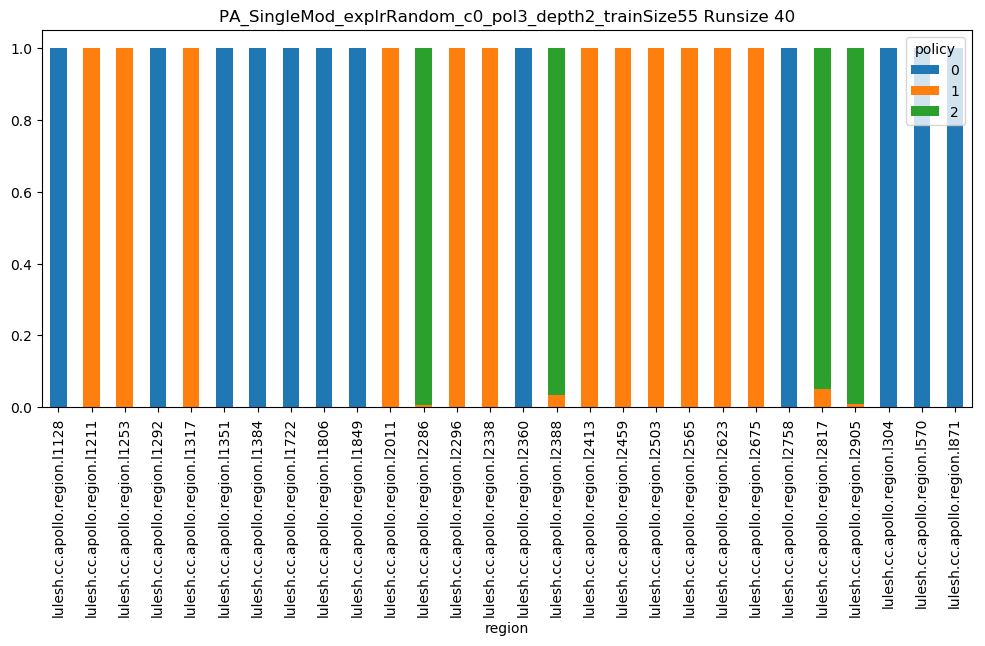

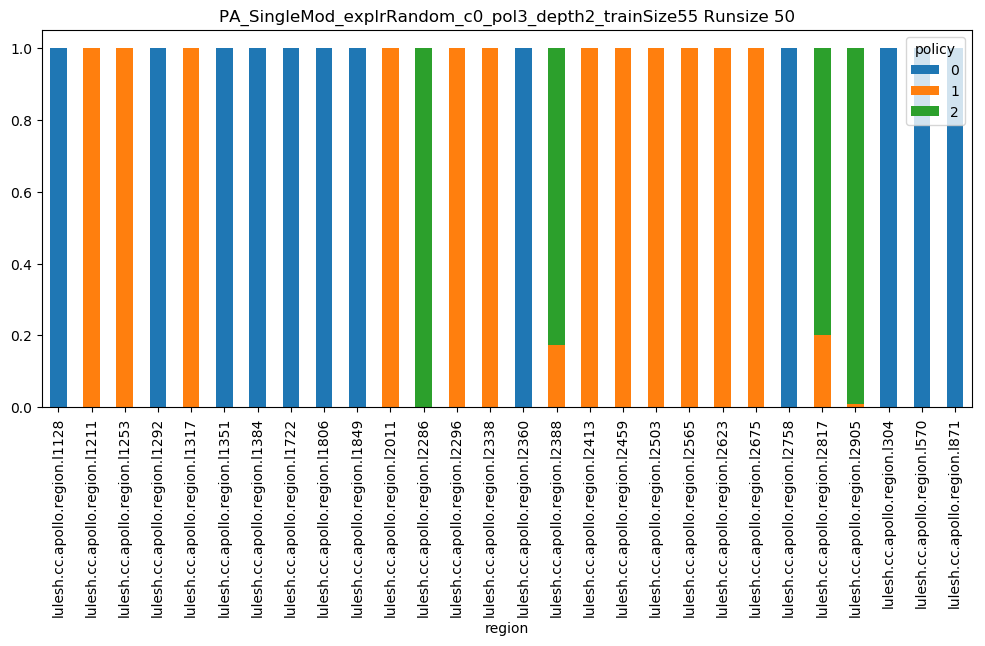

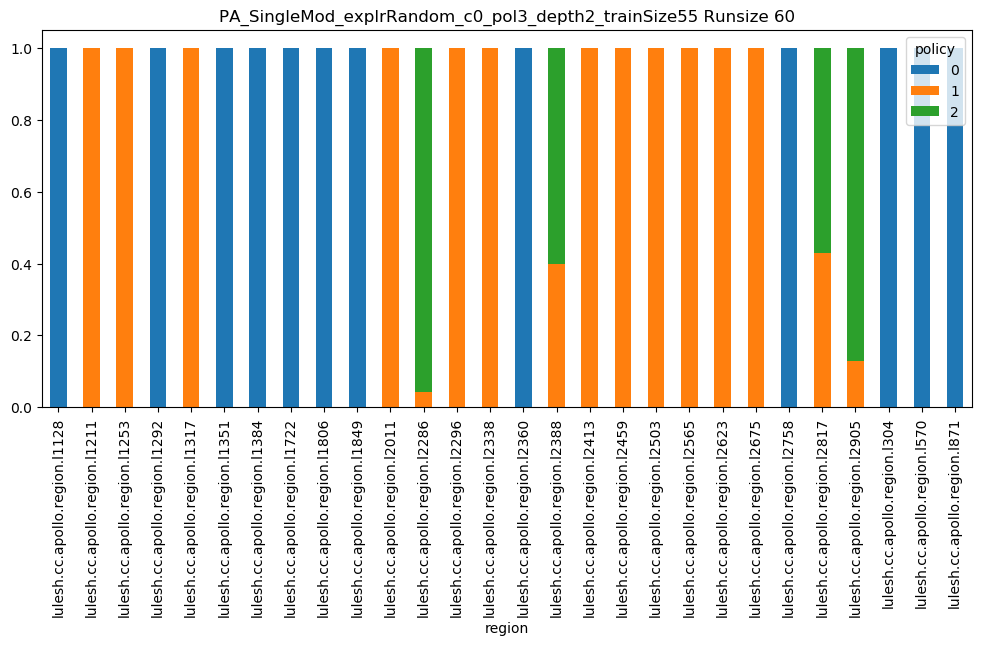

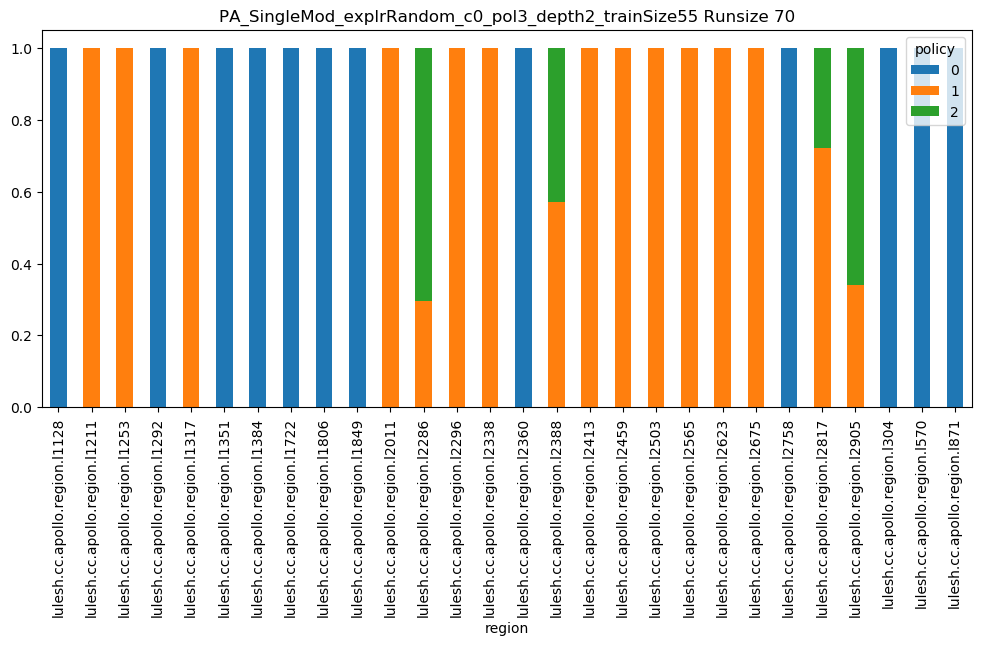

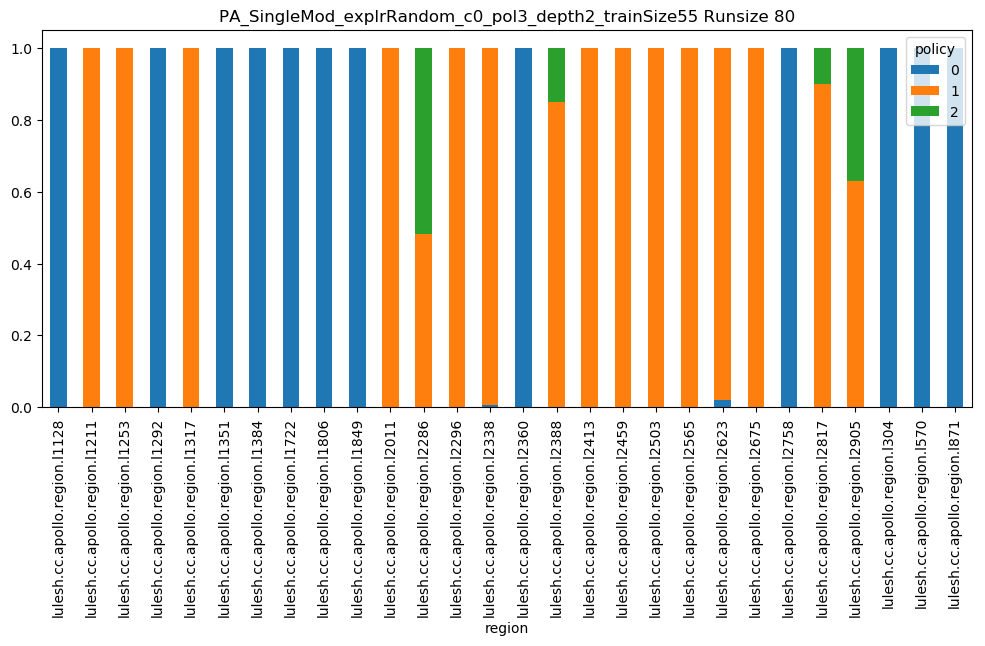

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 58 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


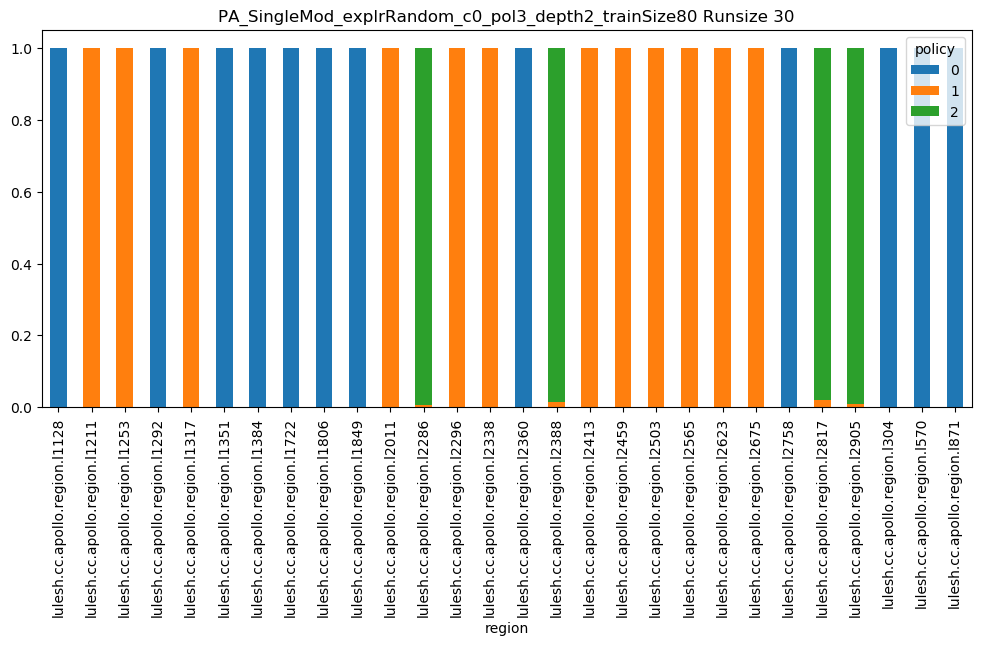

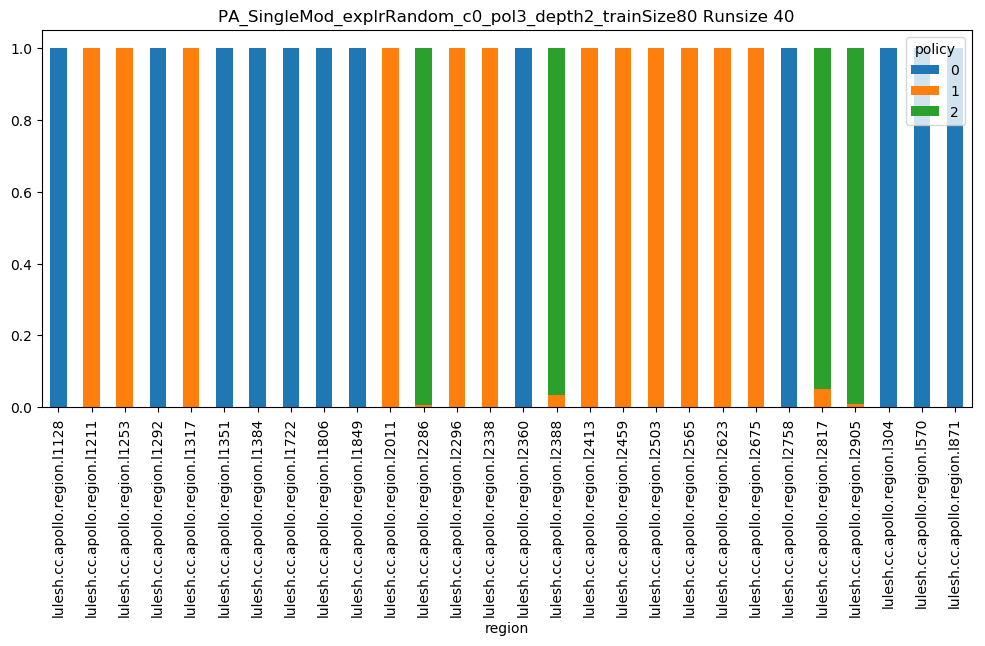

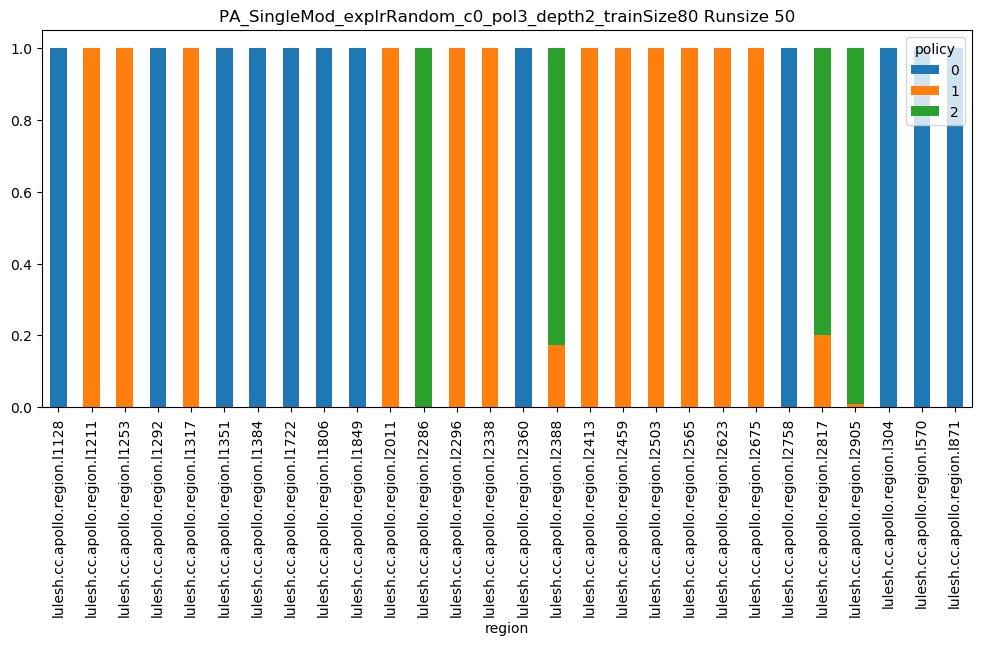

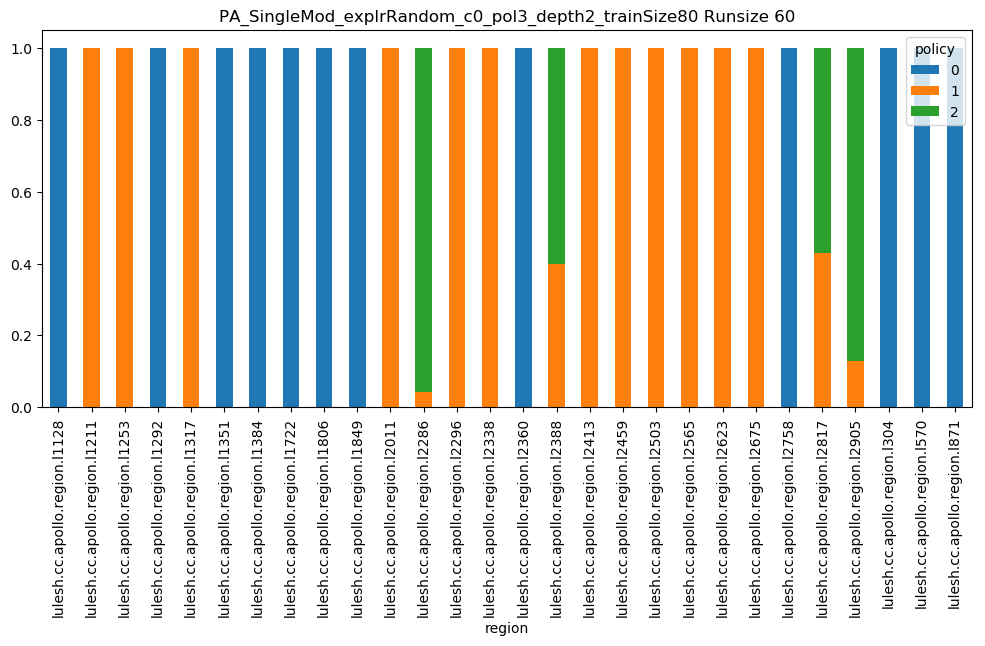

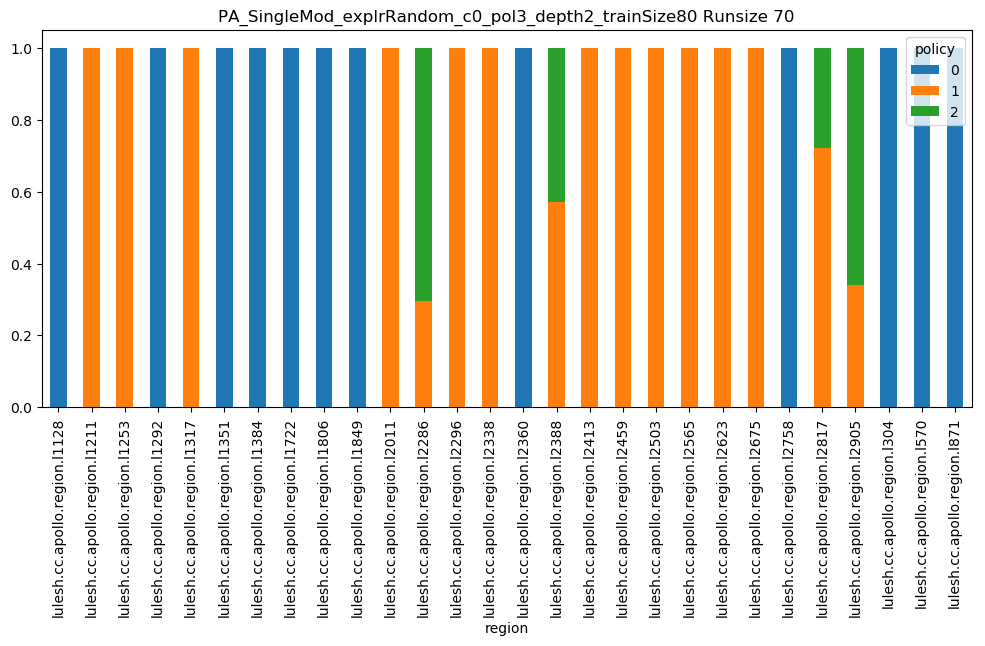

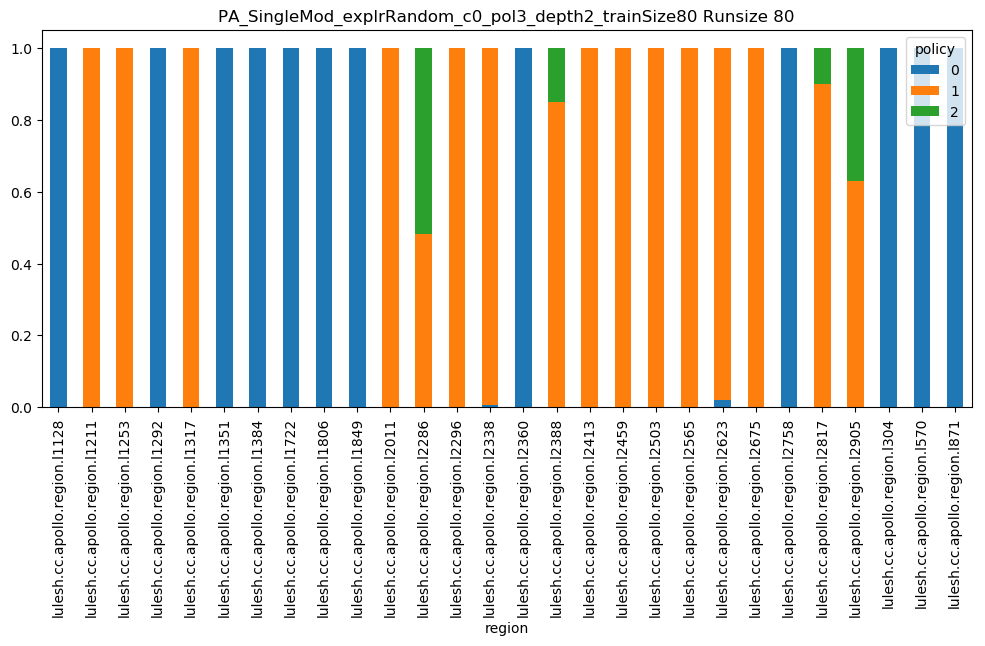

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


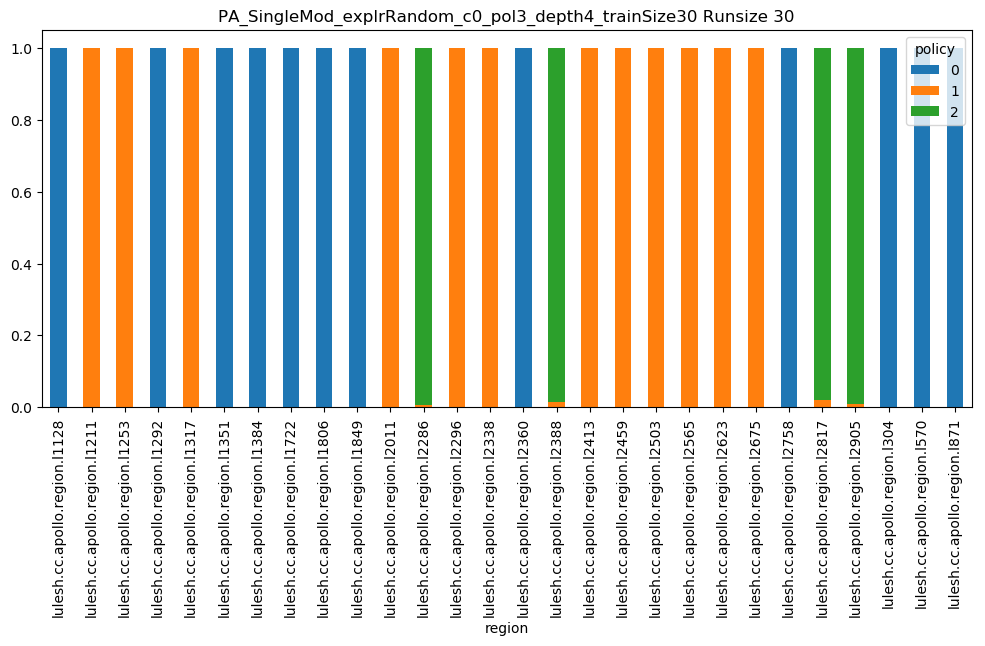

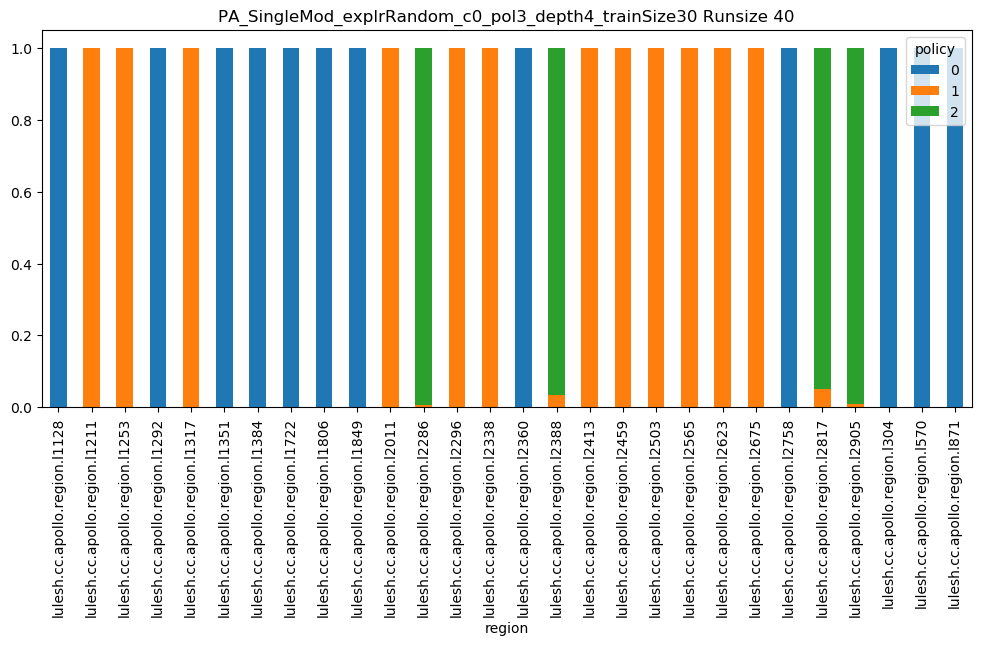

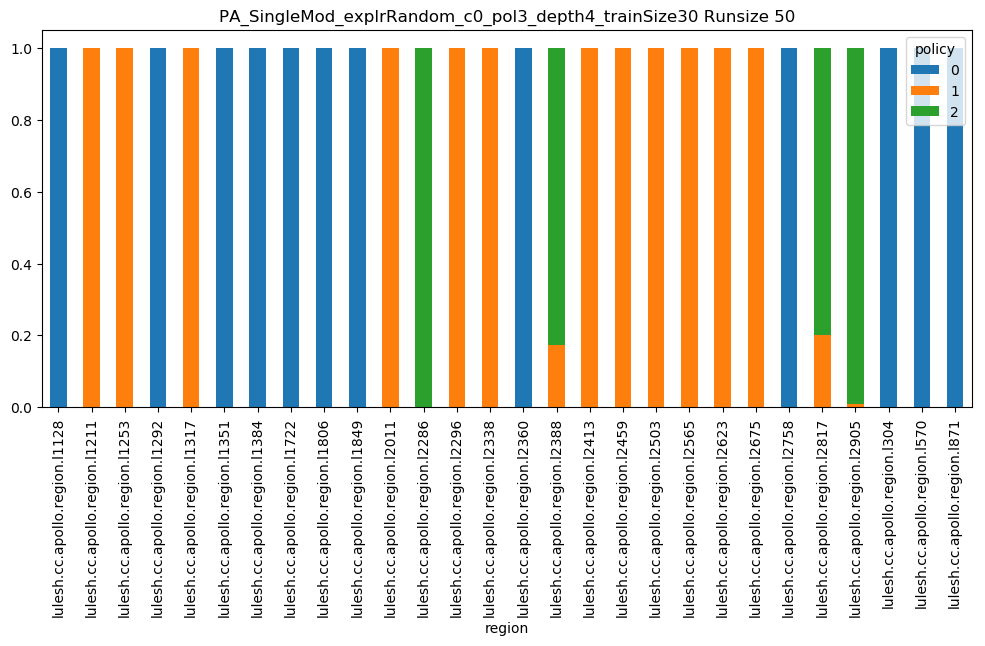

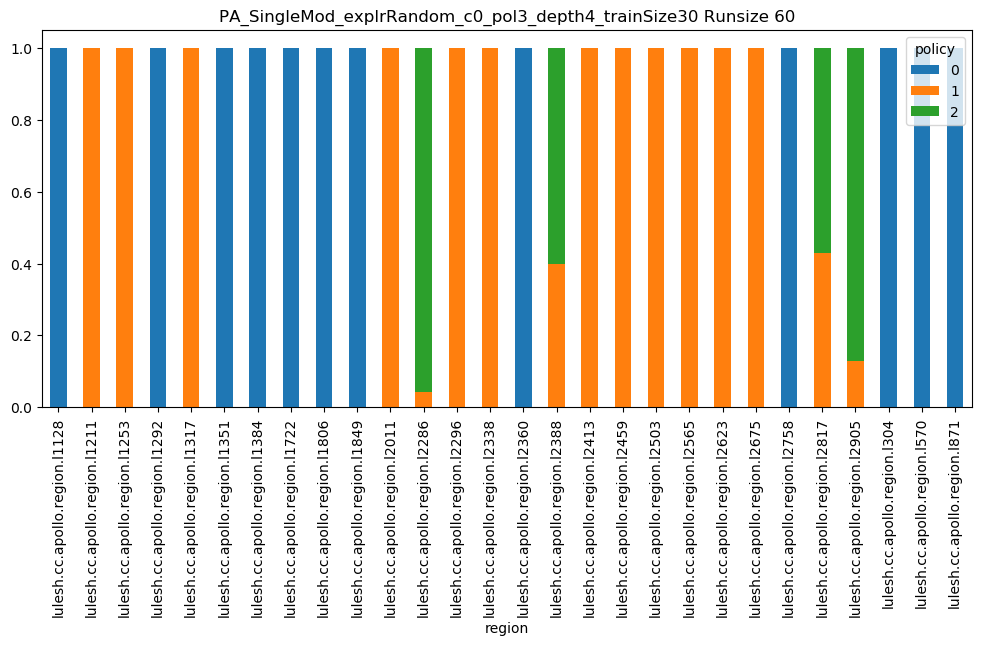

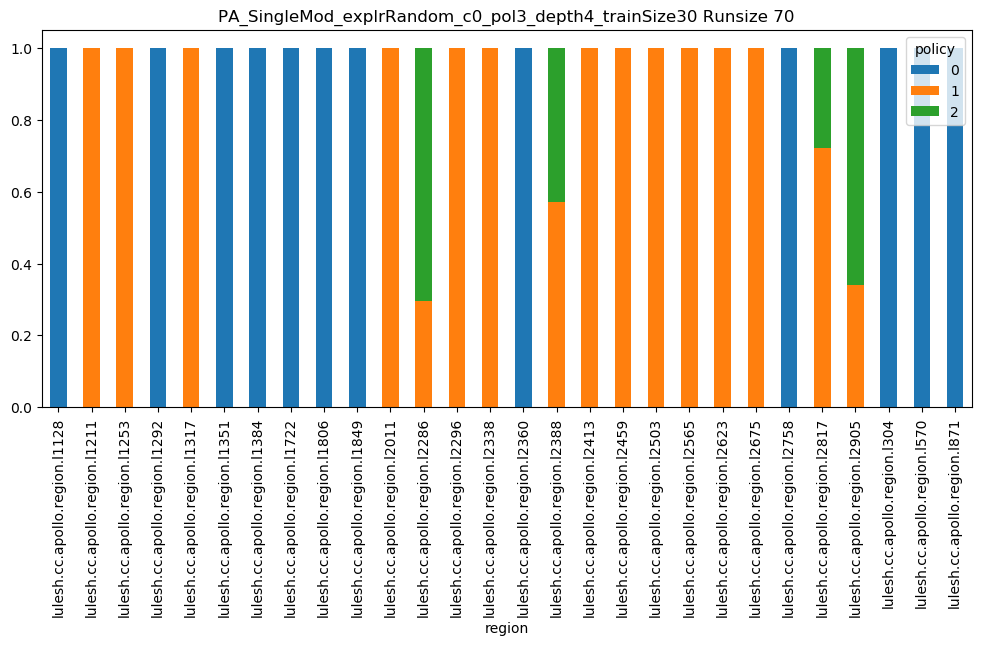

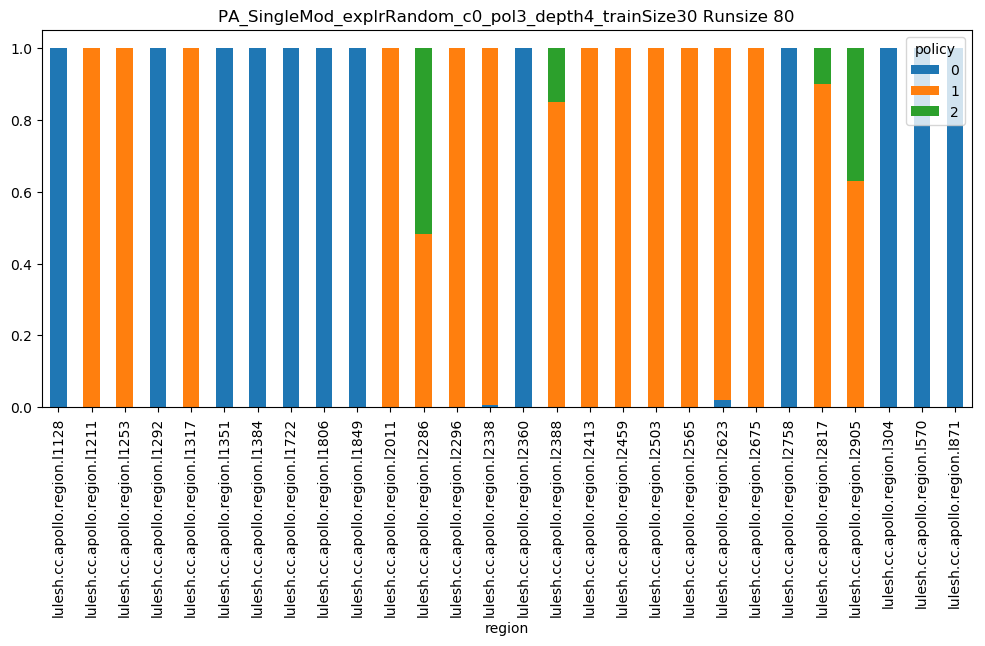

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


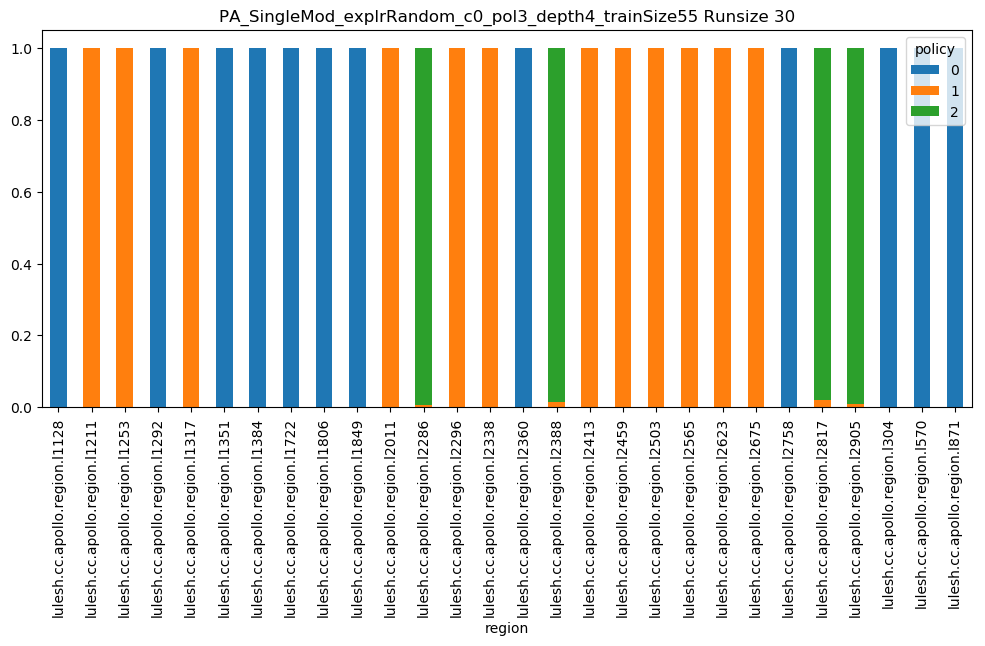

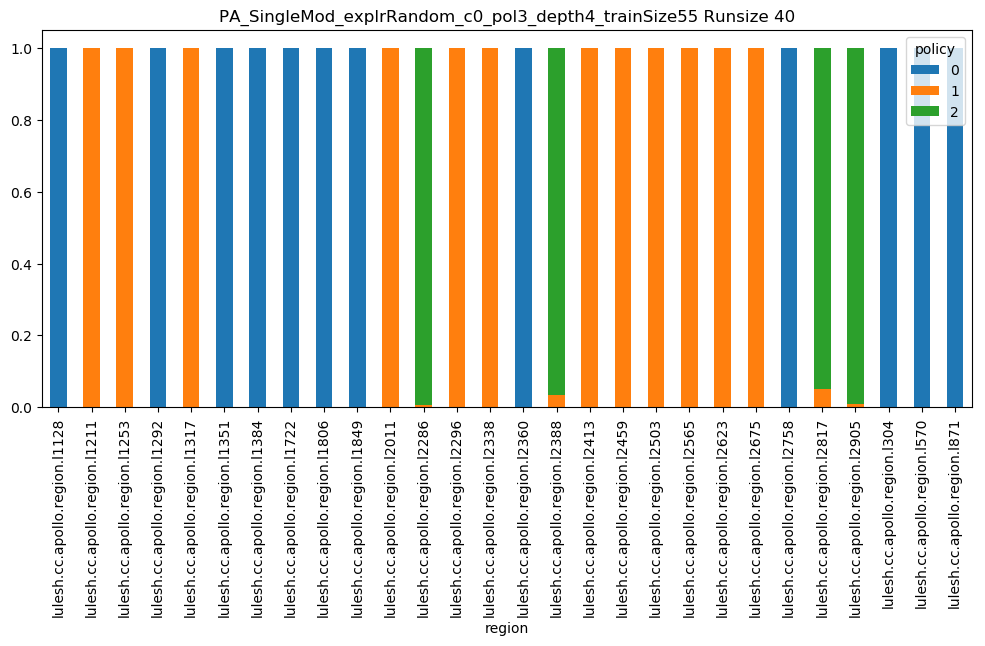

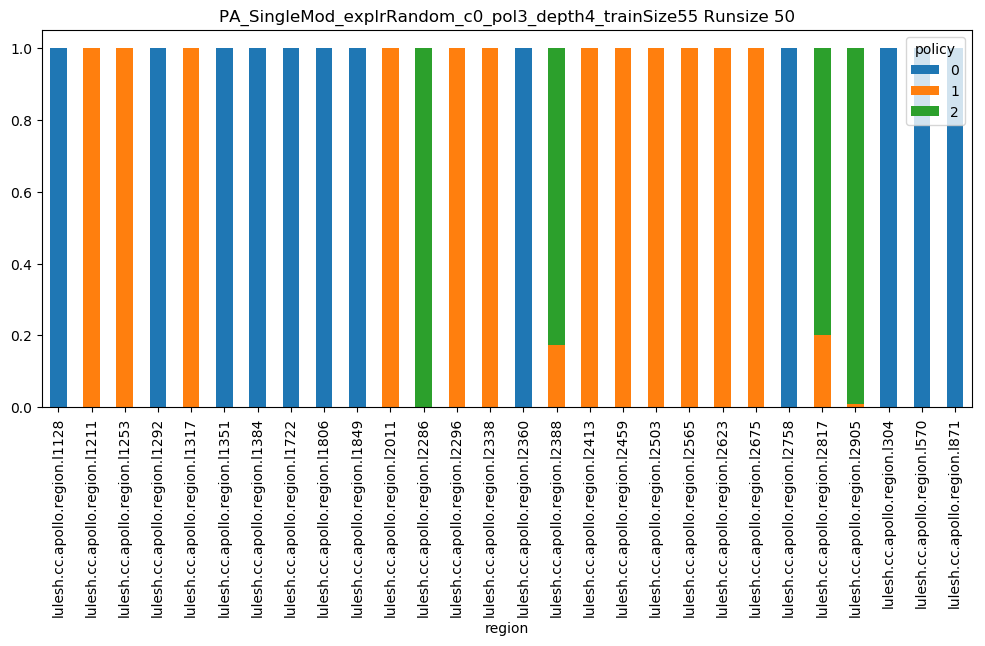

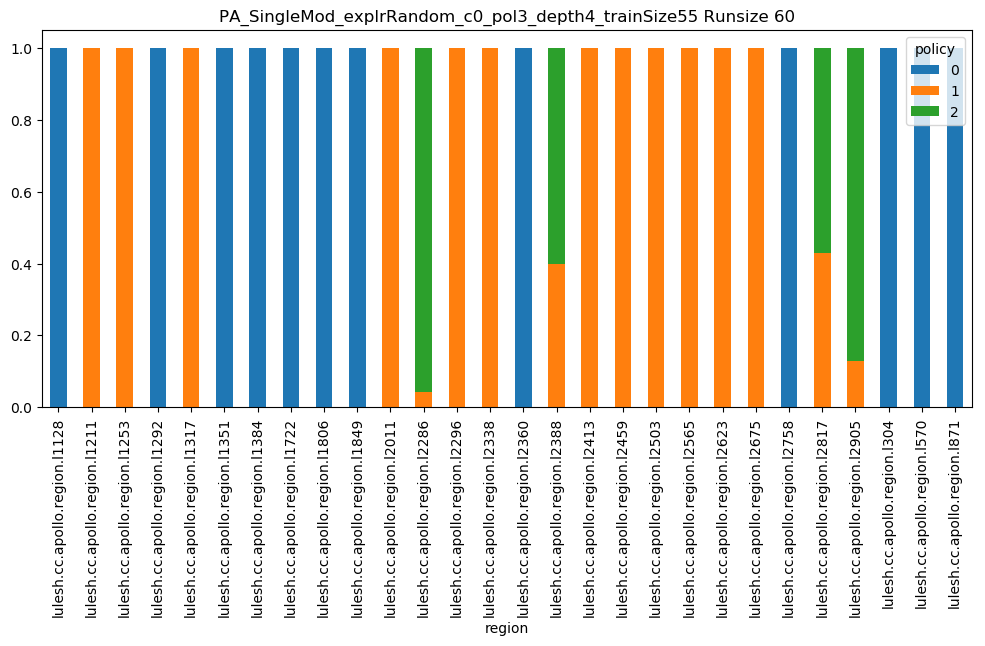

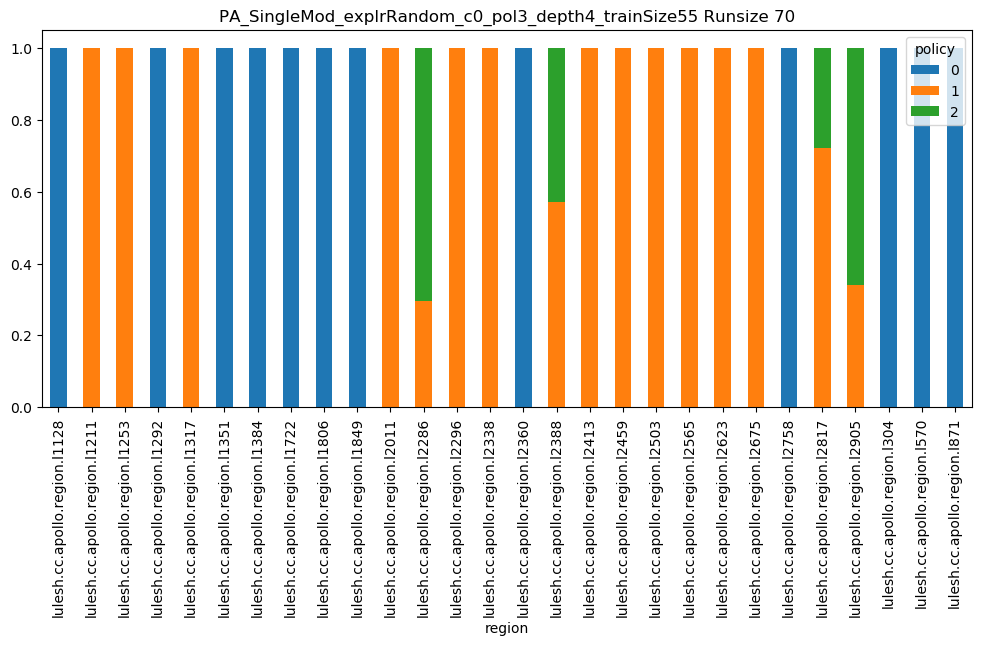

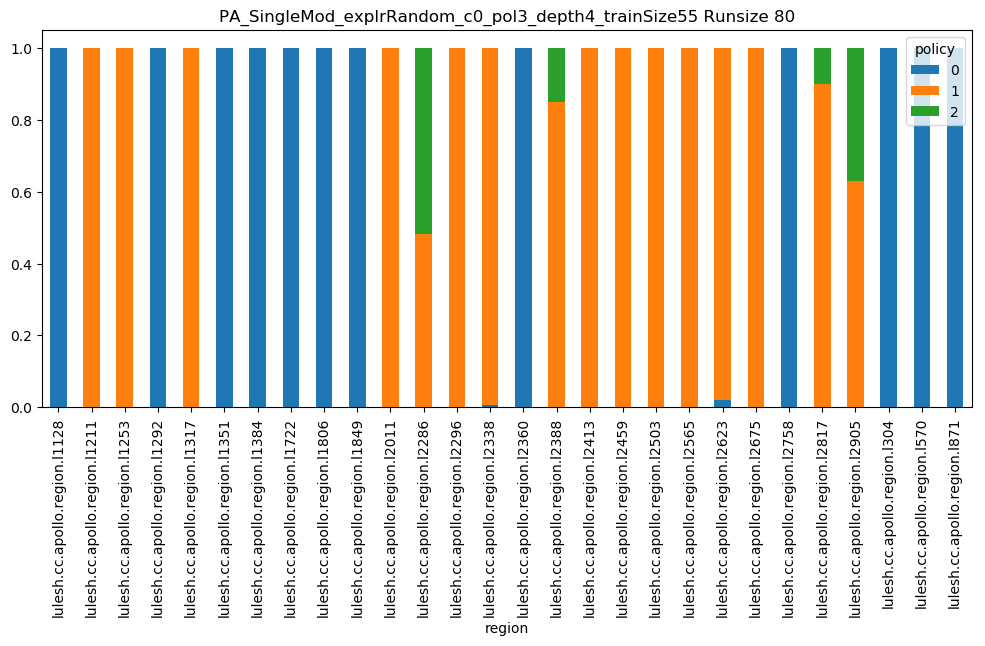

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 57 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


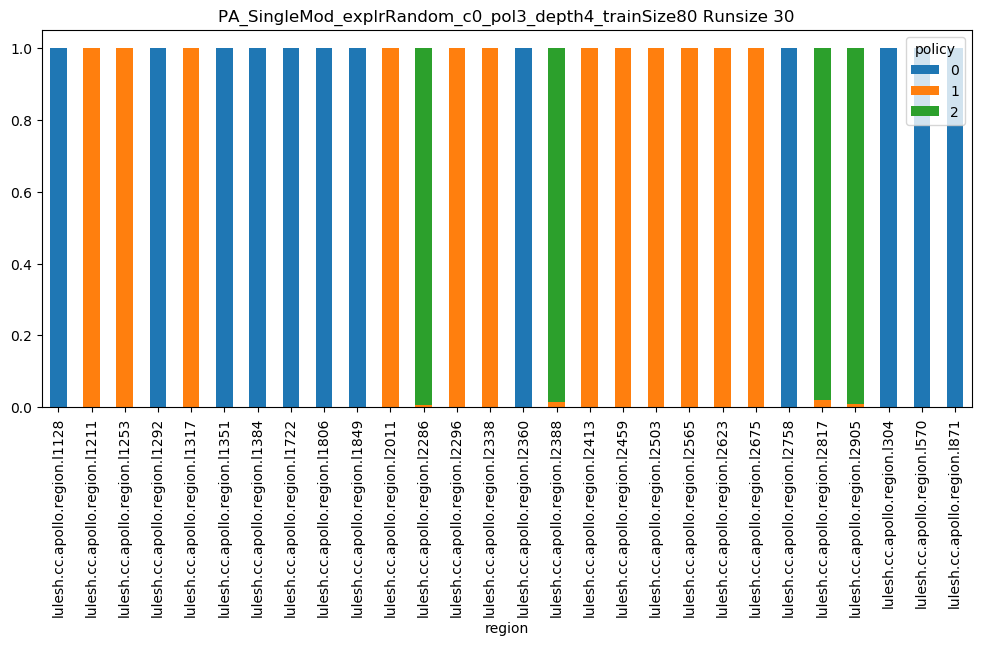

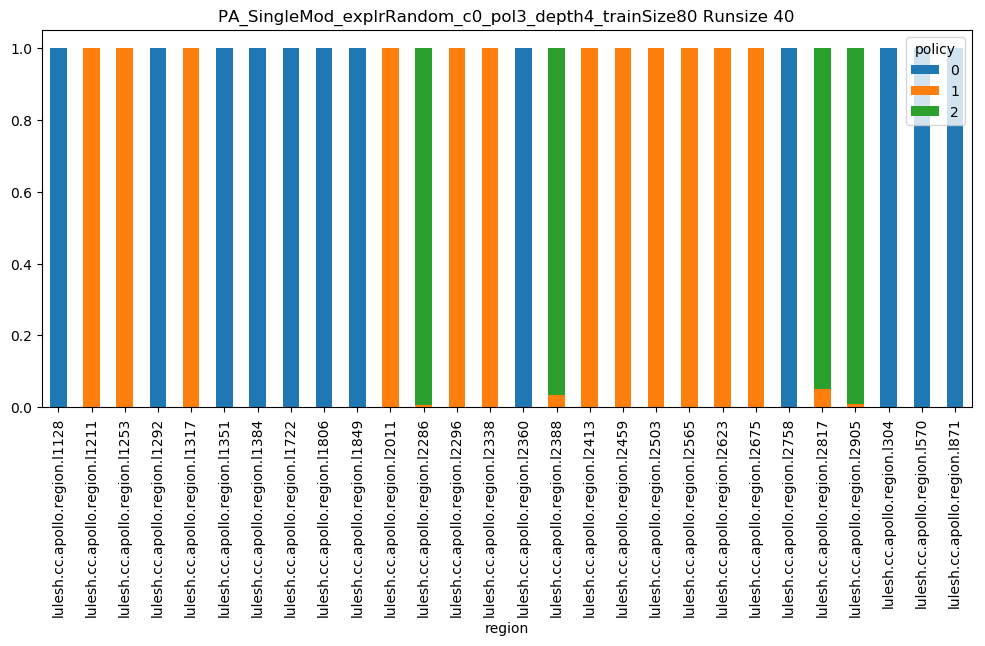

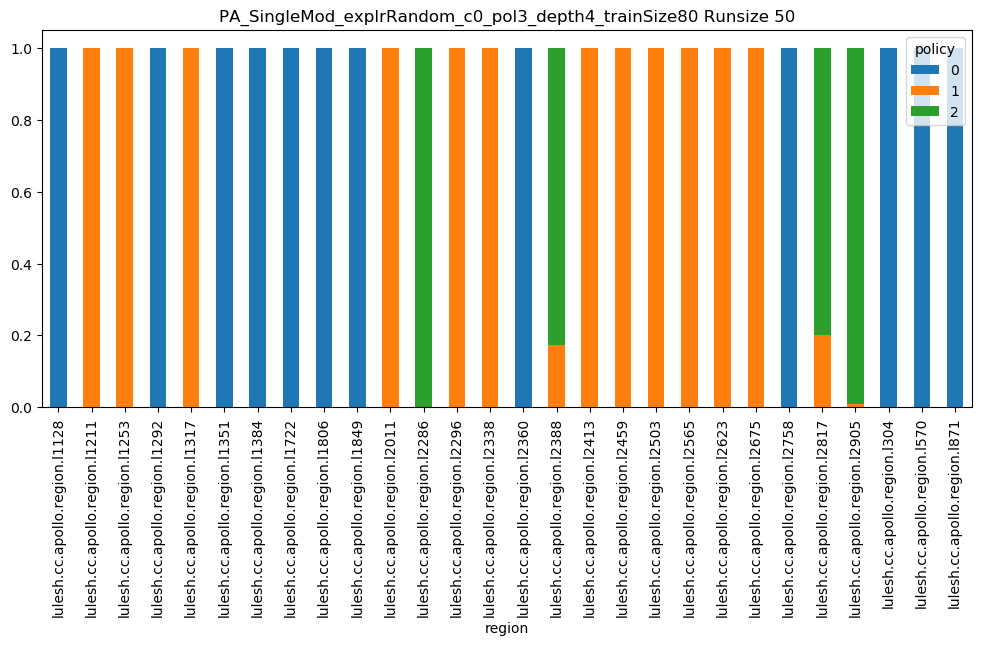

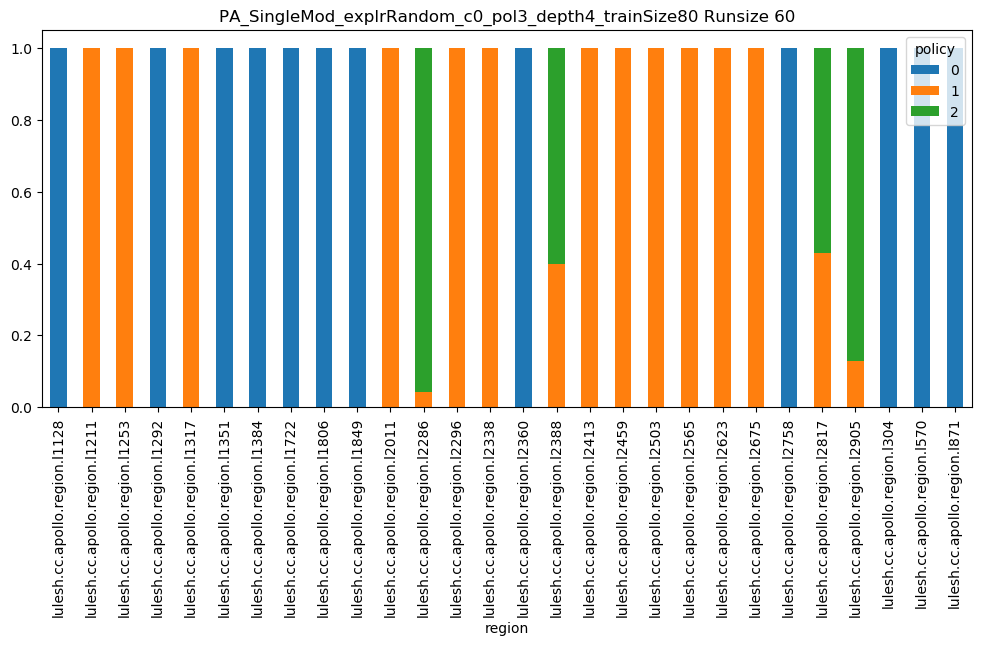

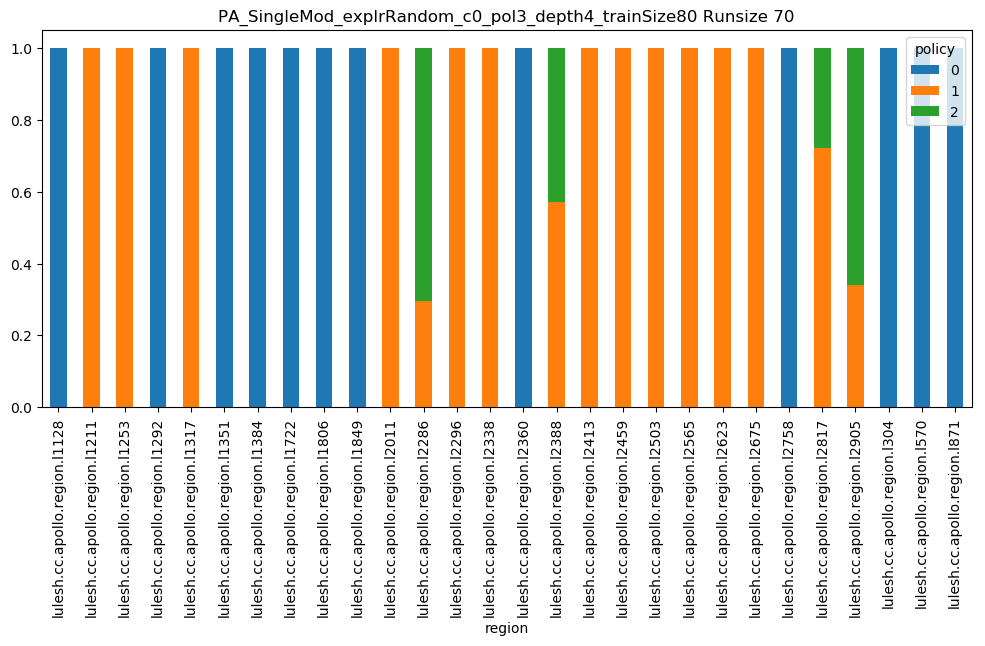

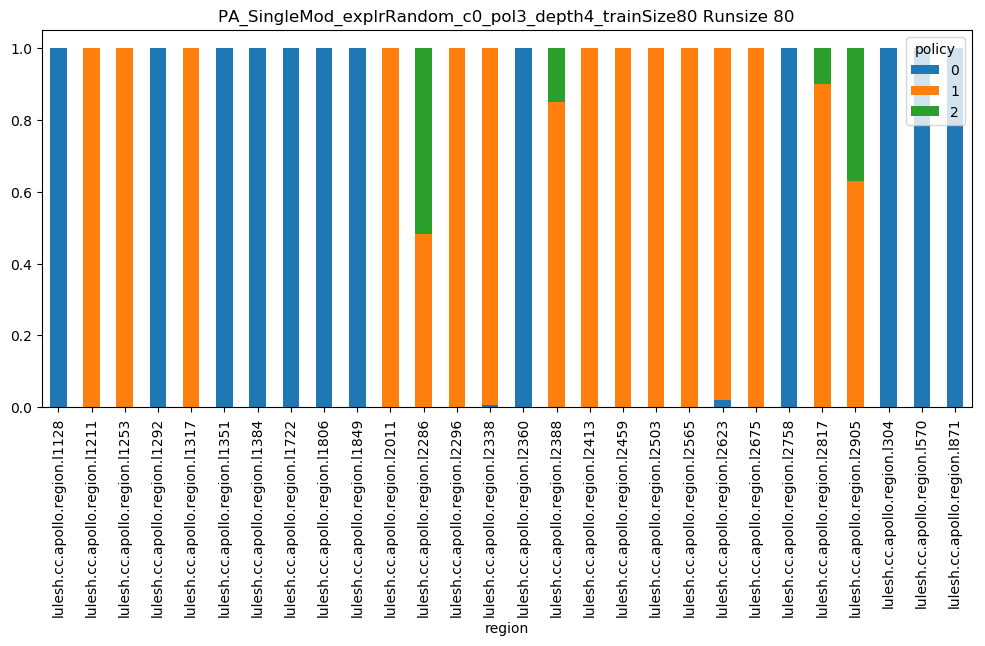

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


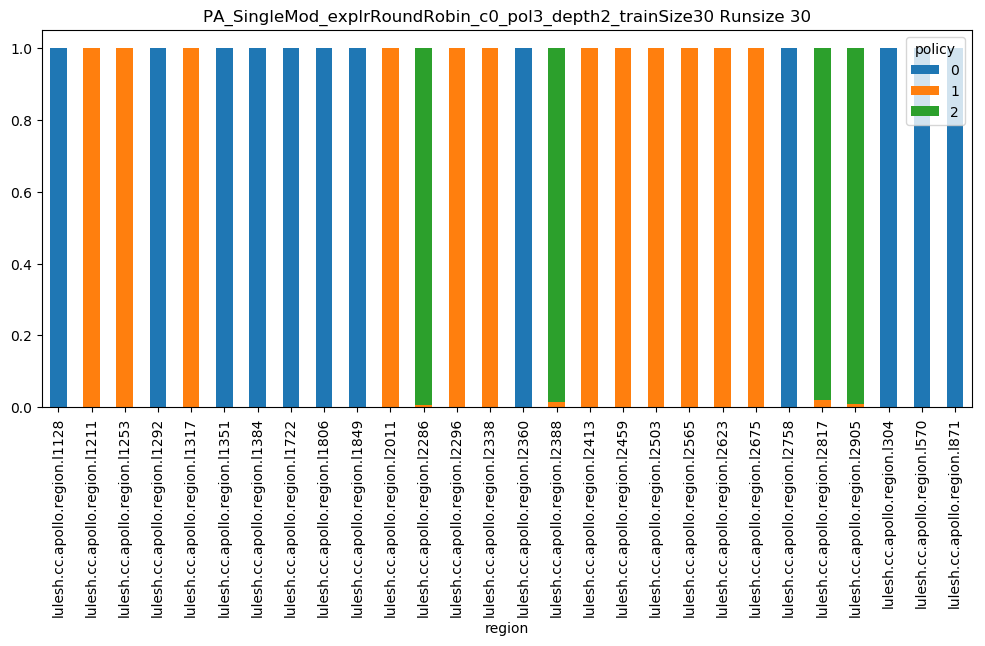

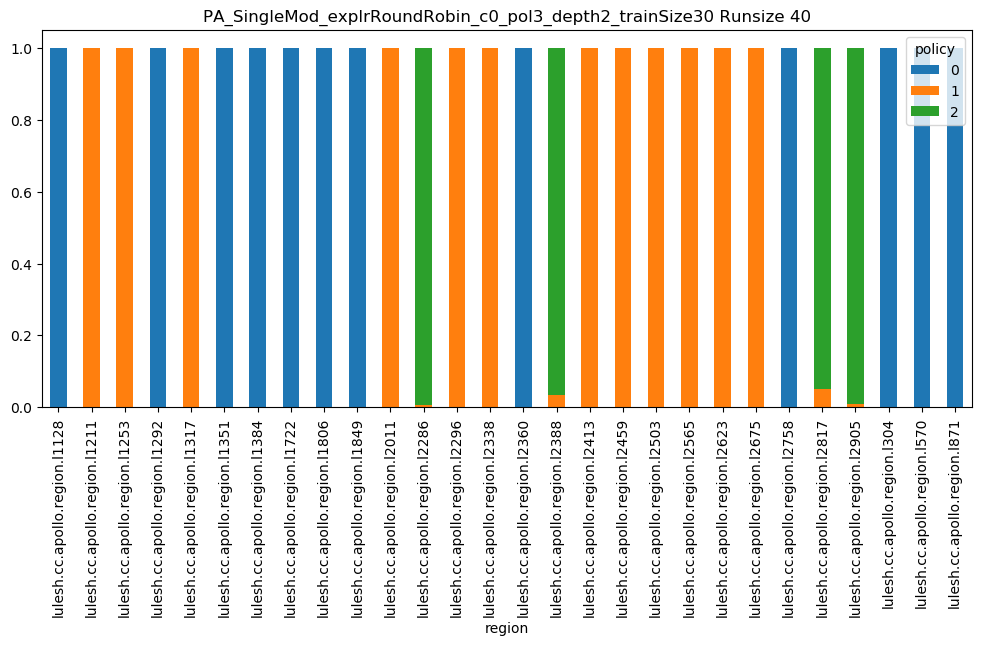

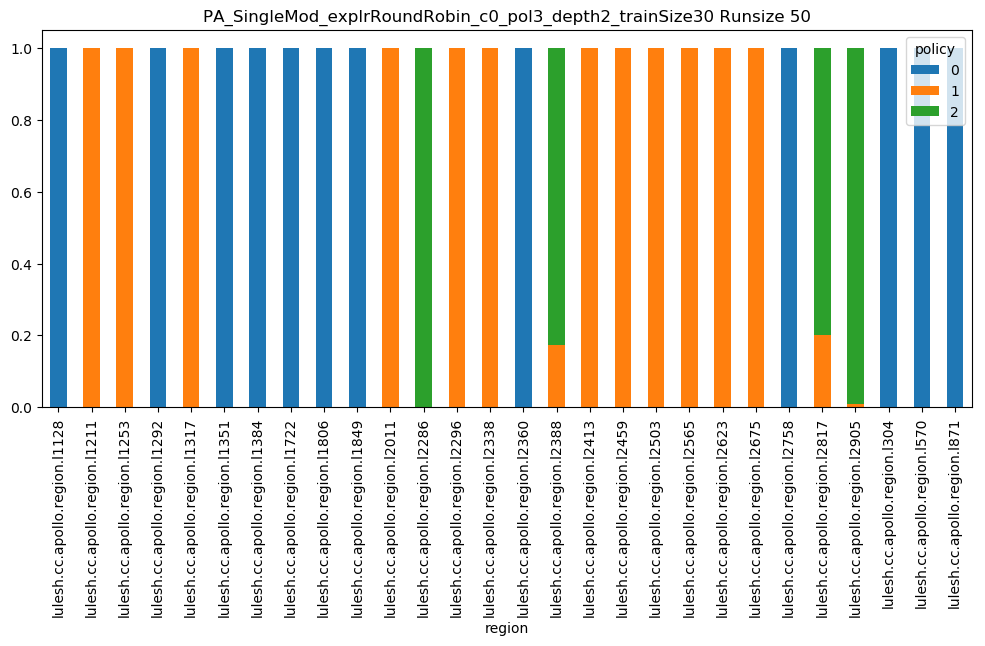

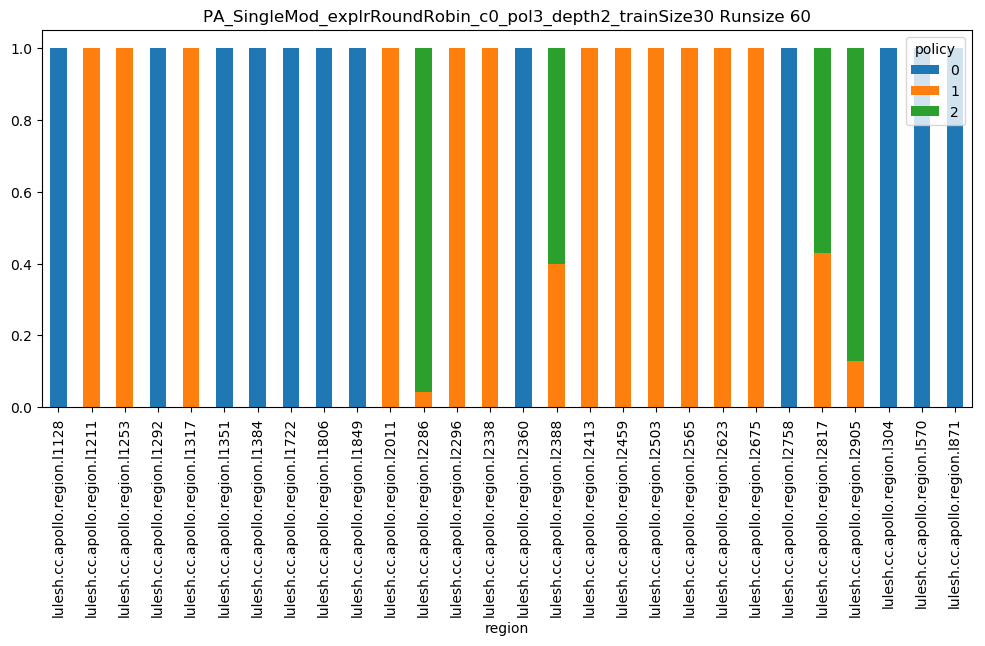

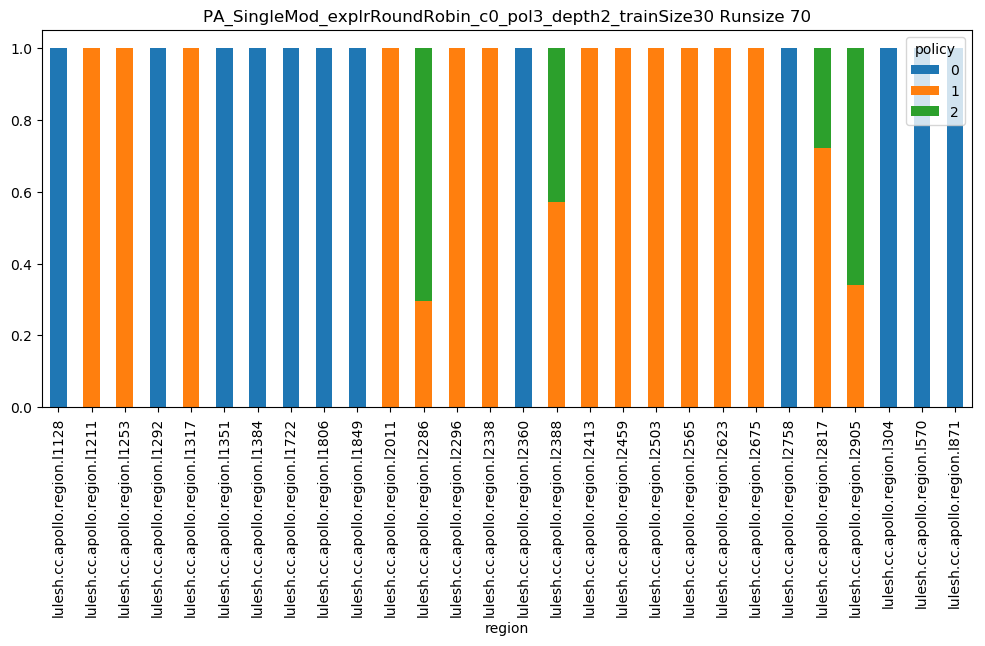

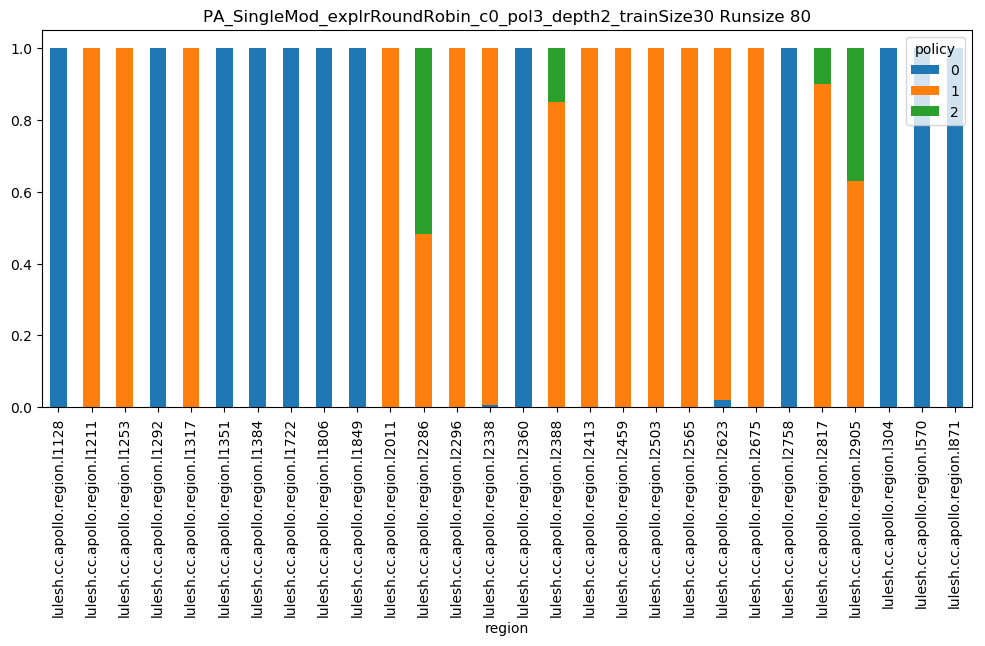

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


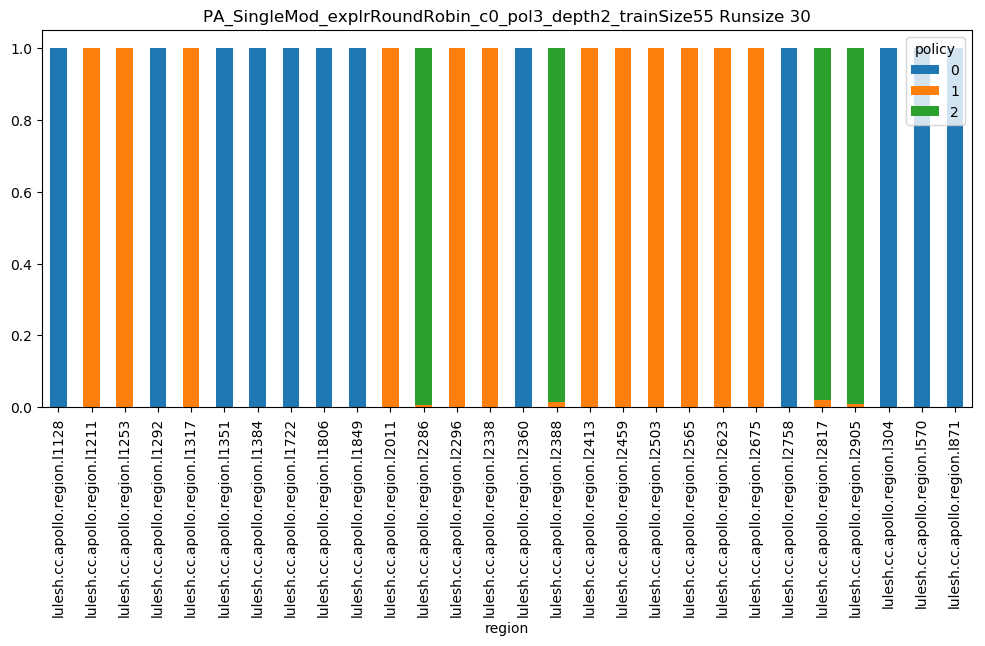

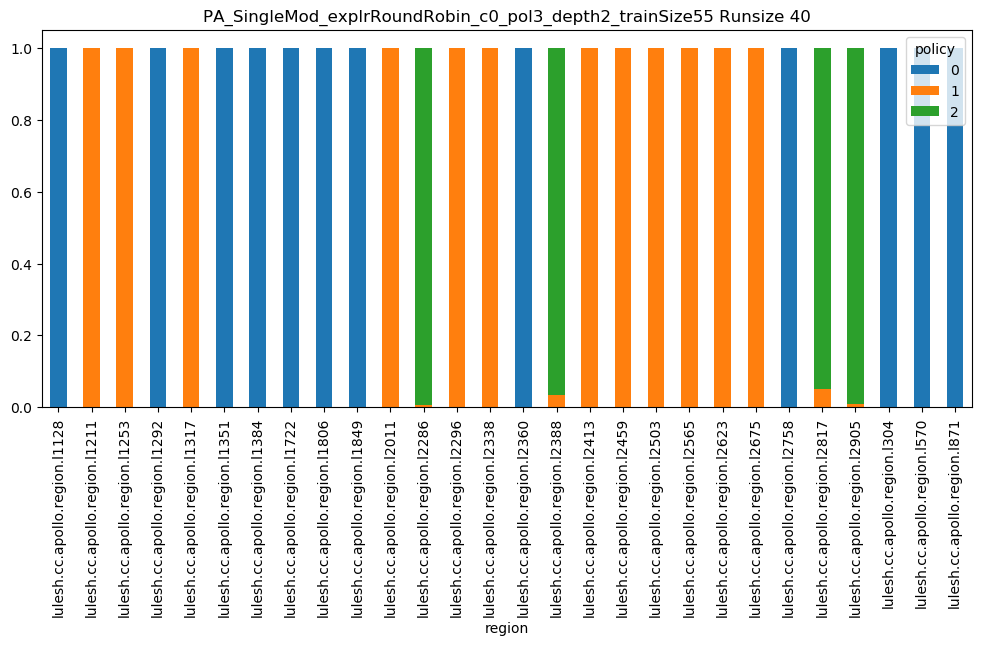

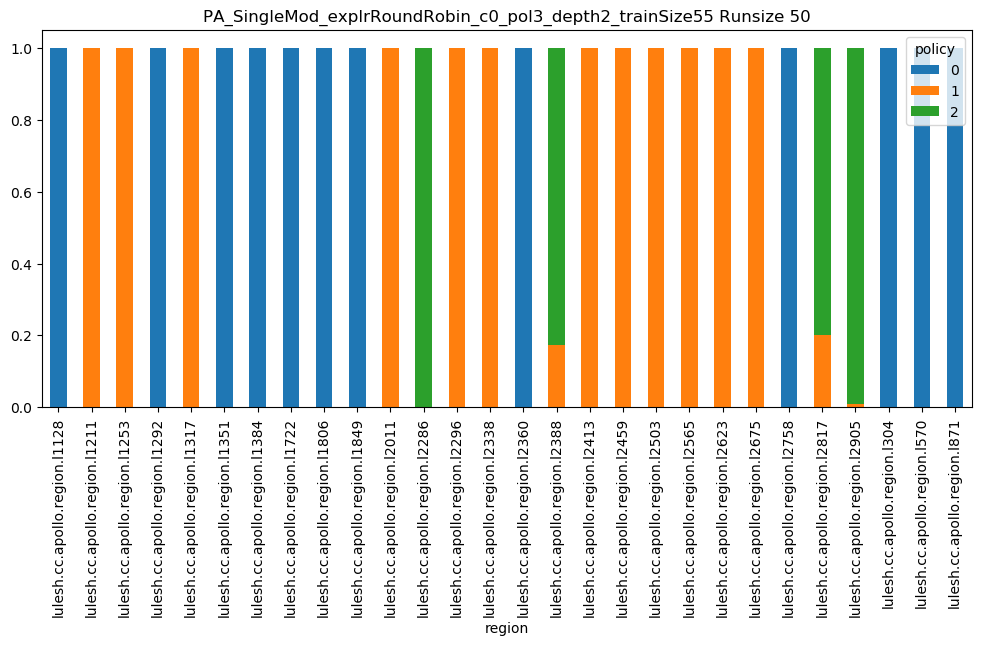

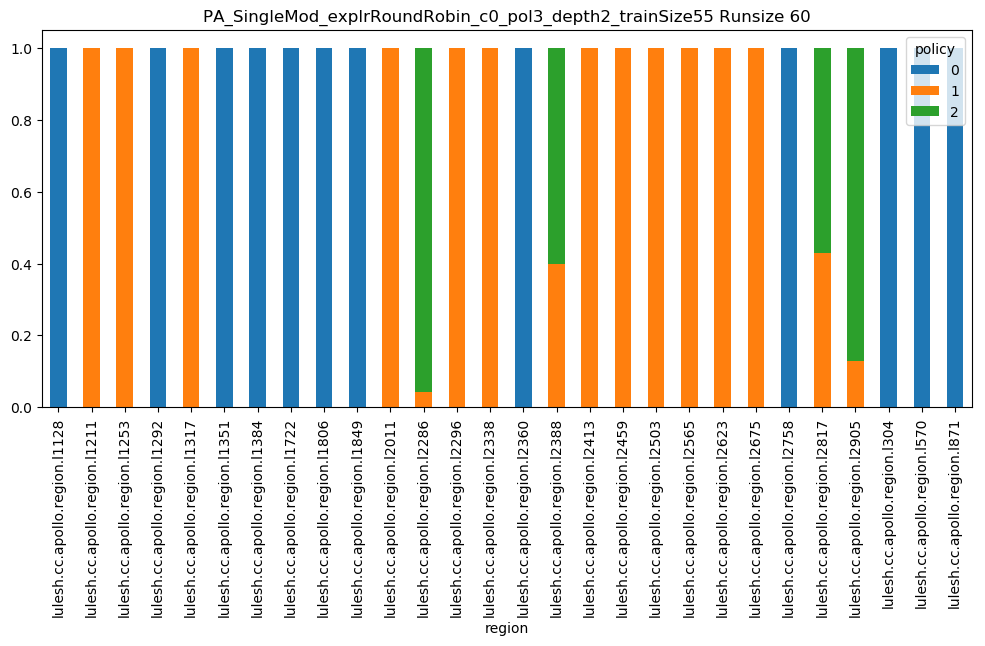

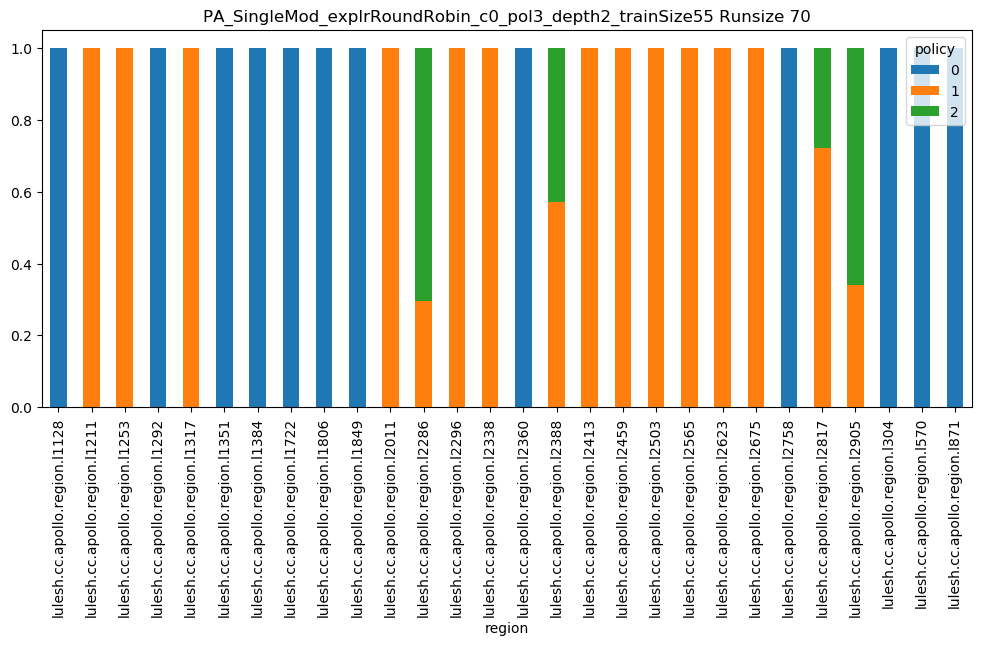

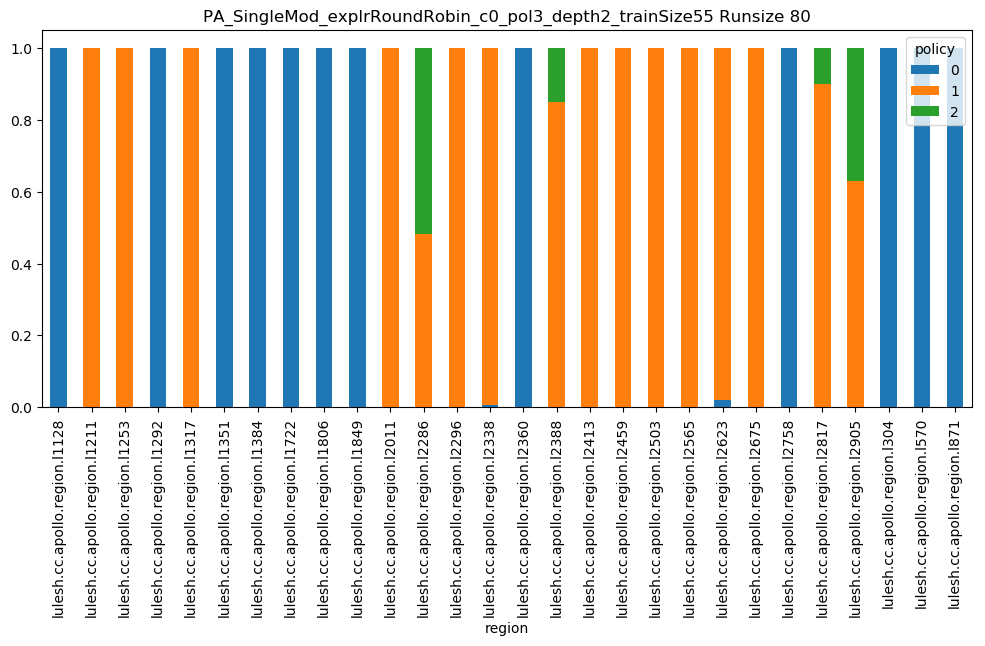

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


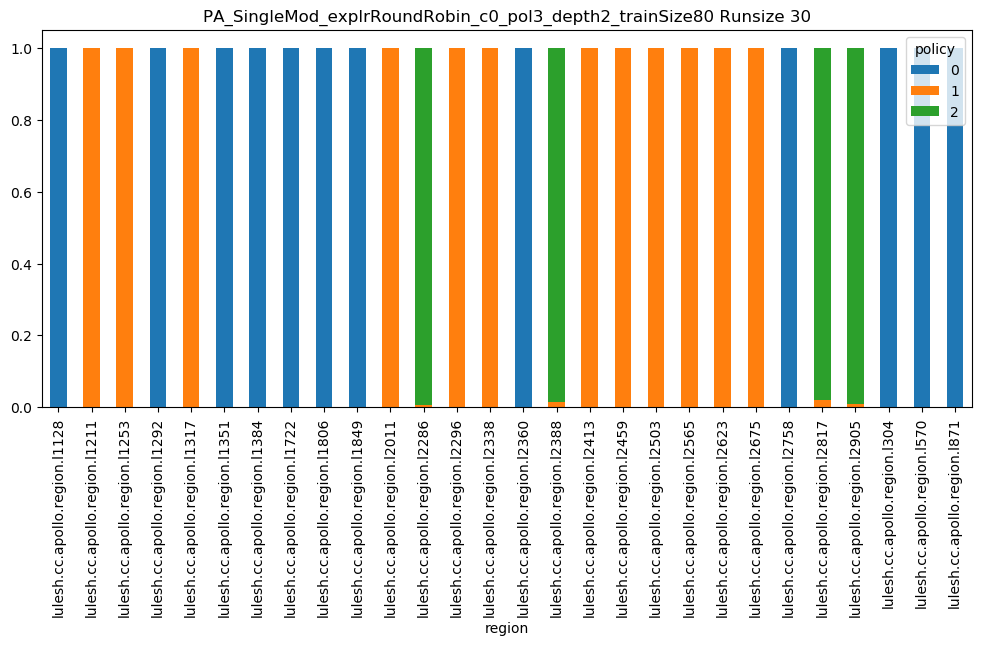

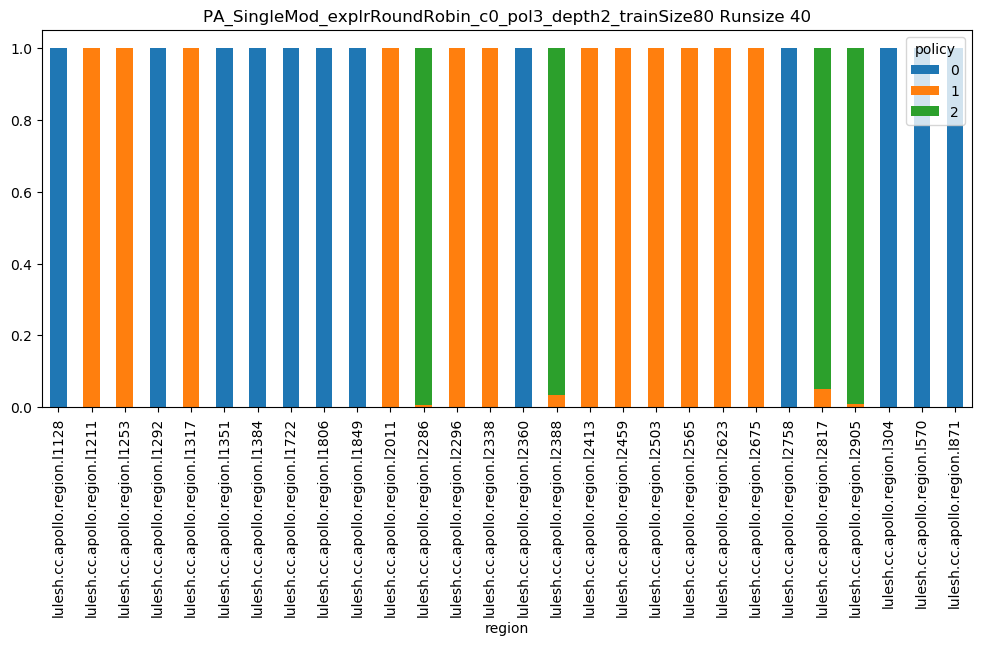

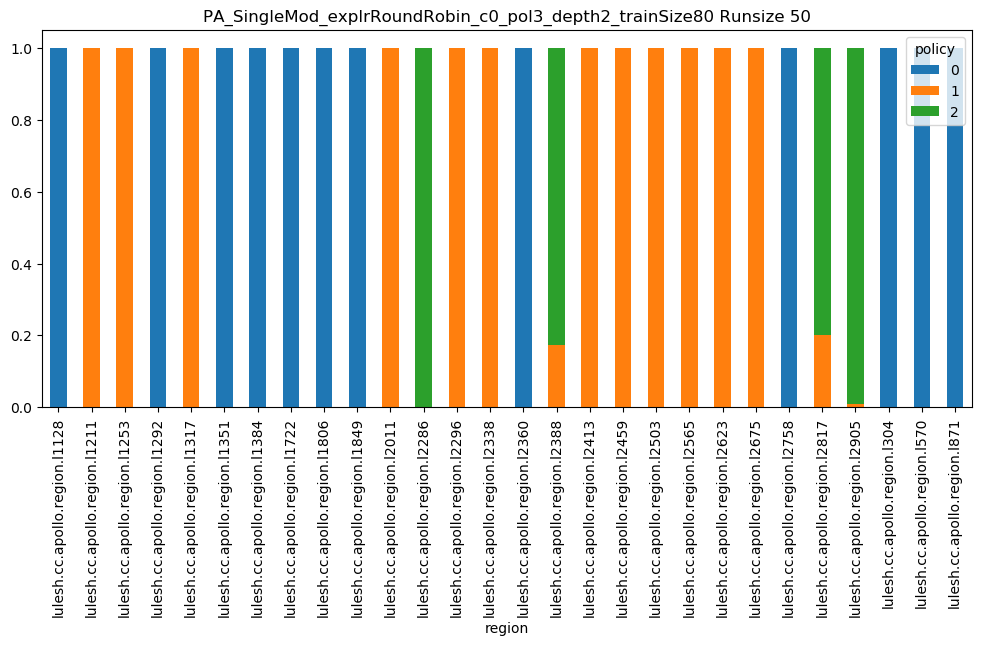

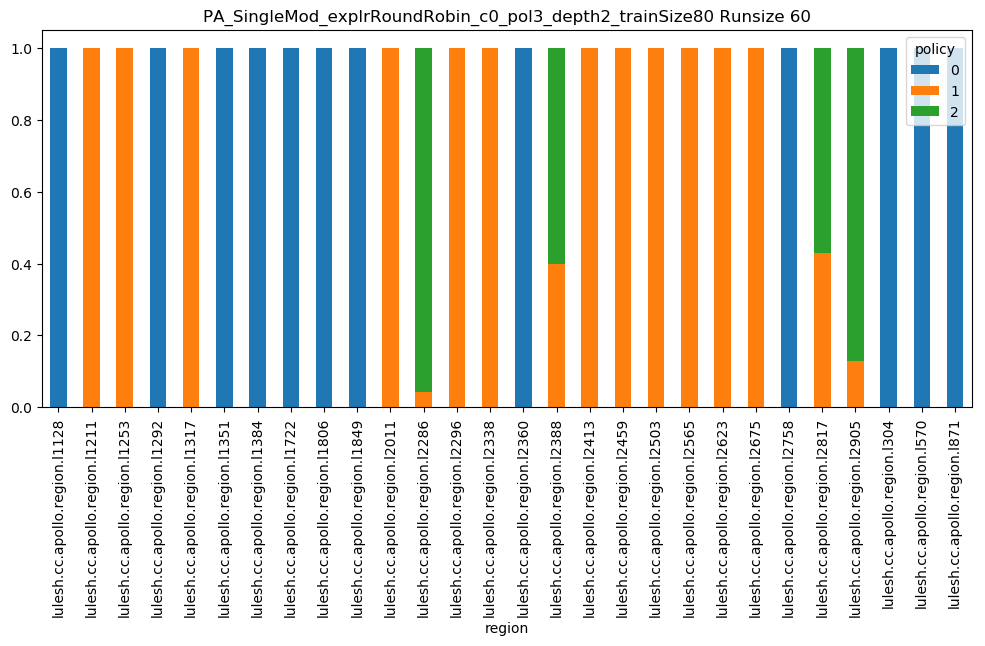

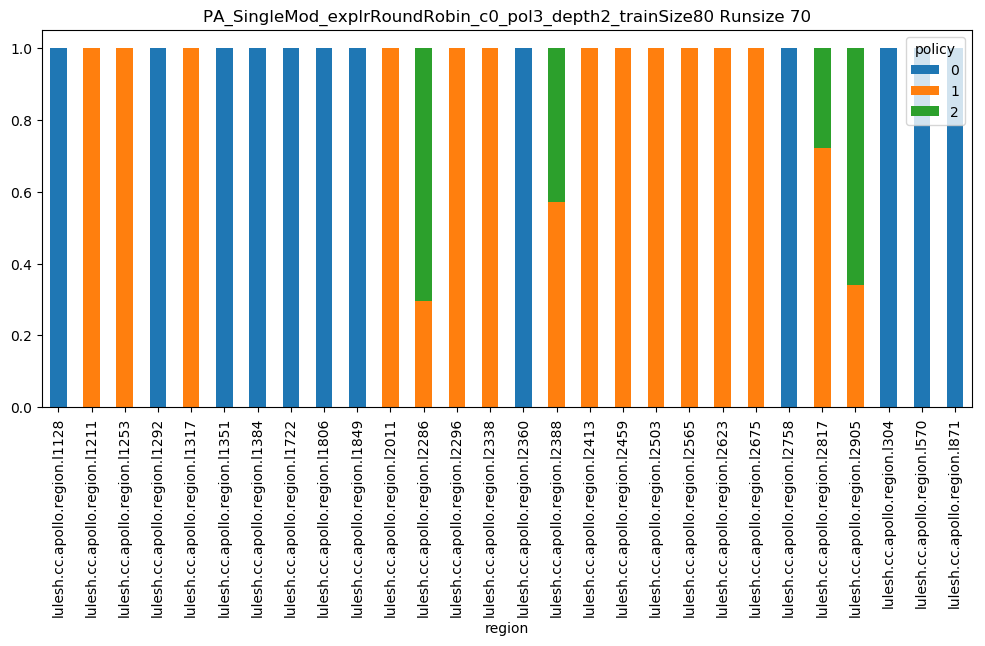

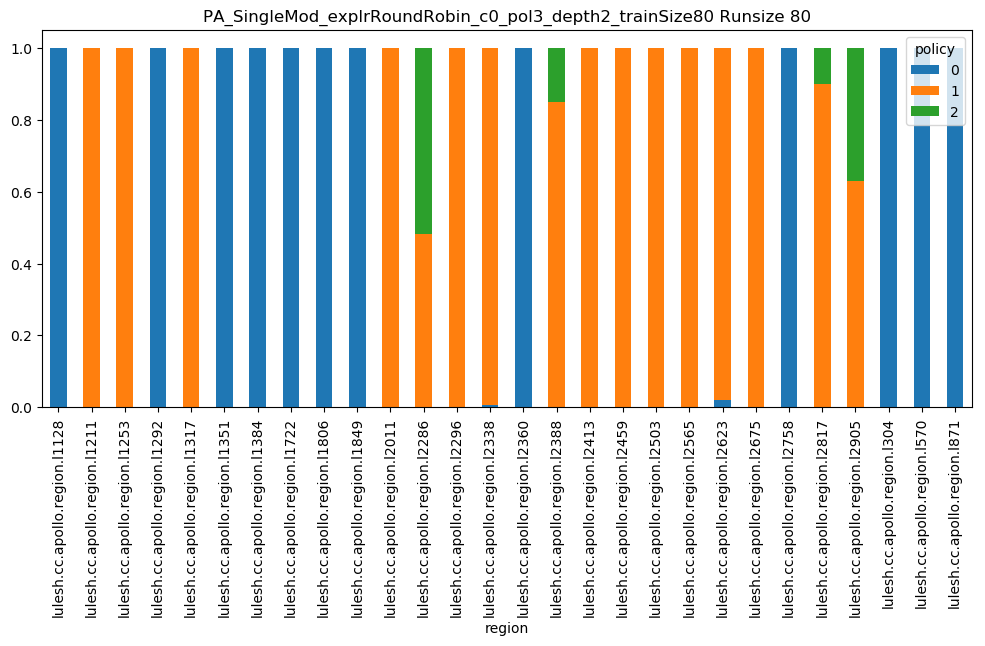

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


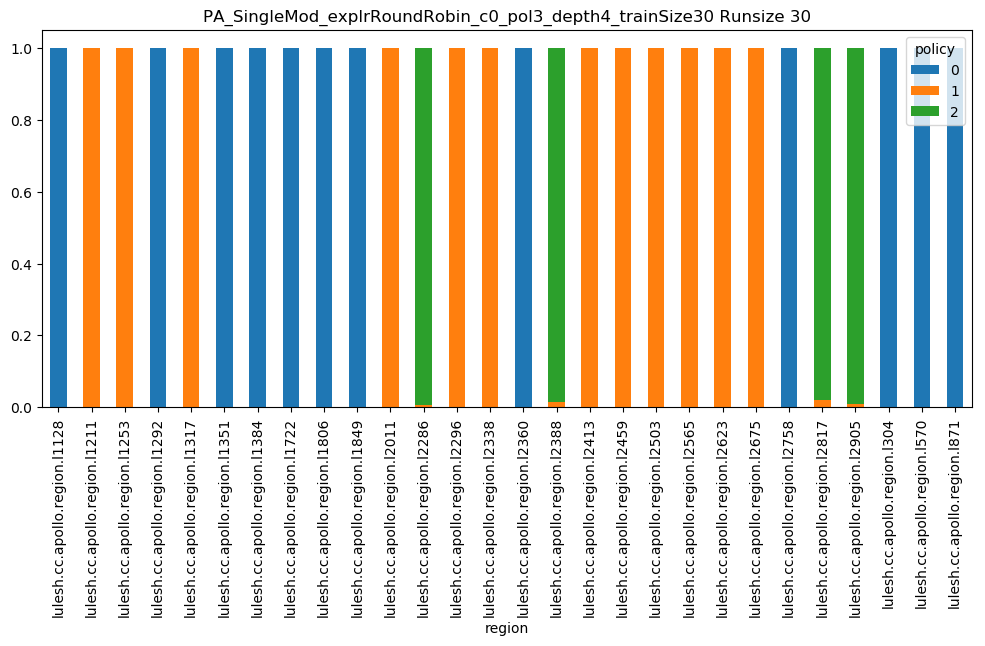

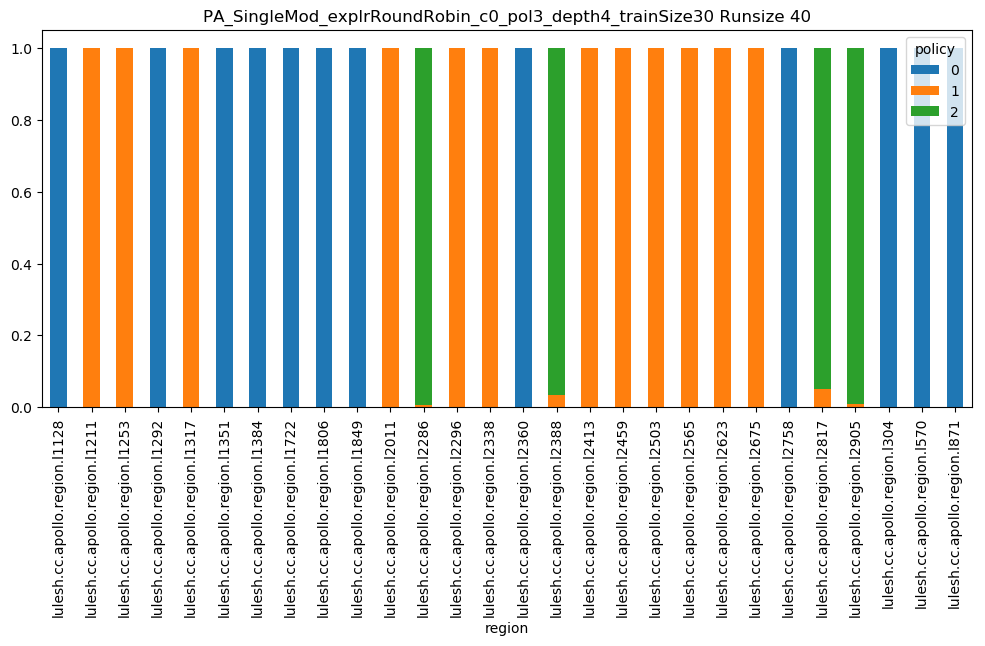

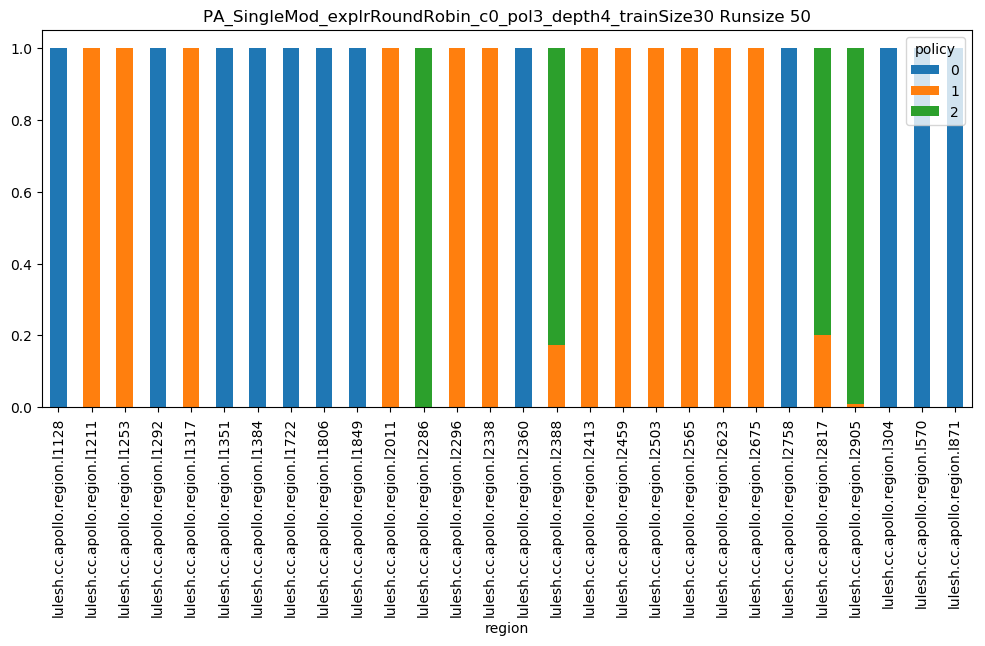

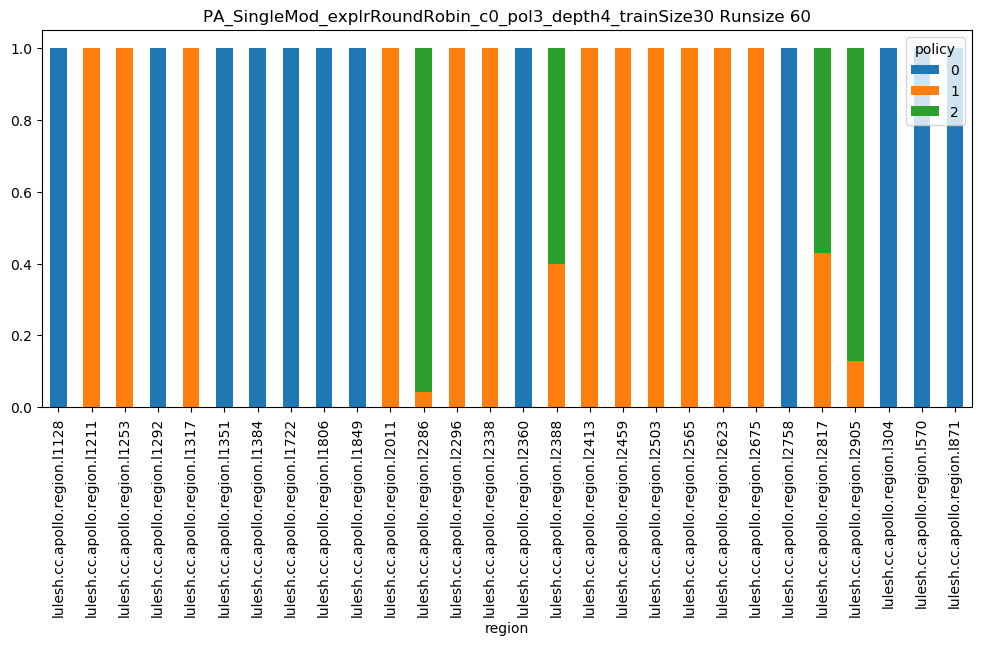

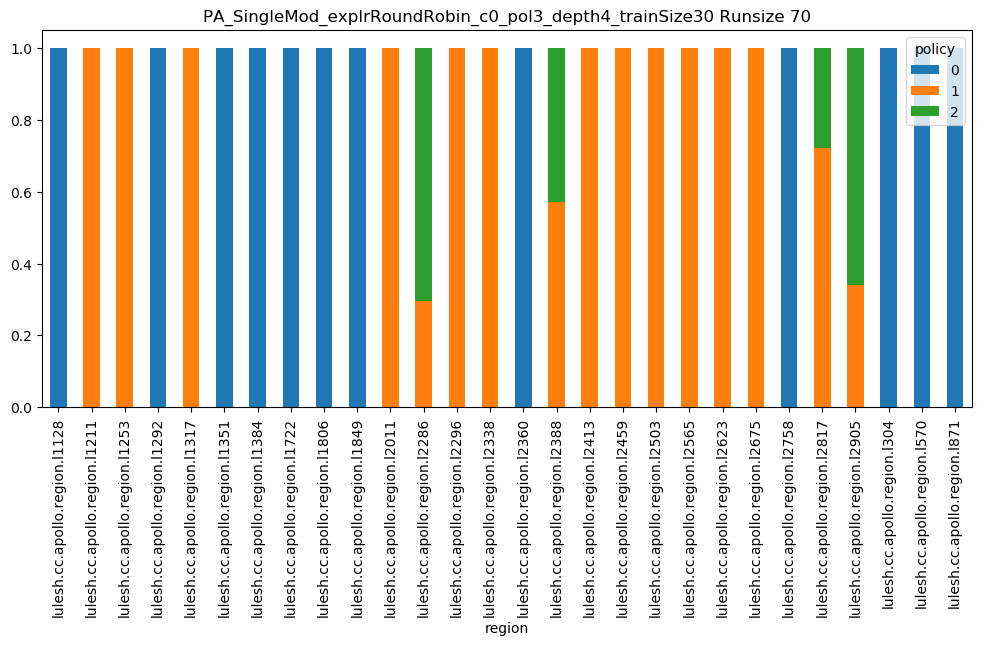

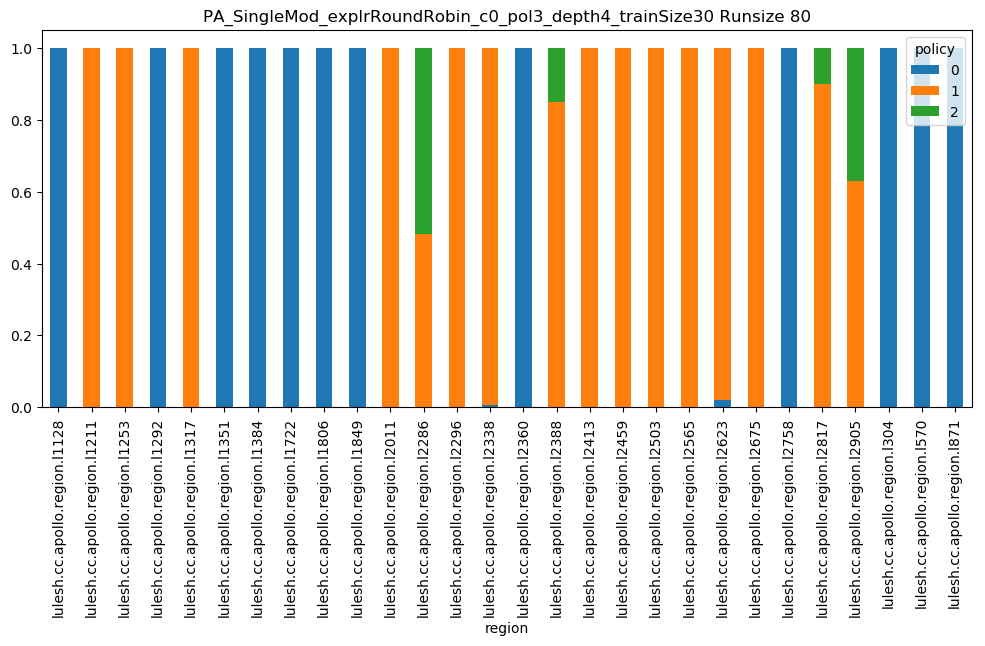

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


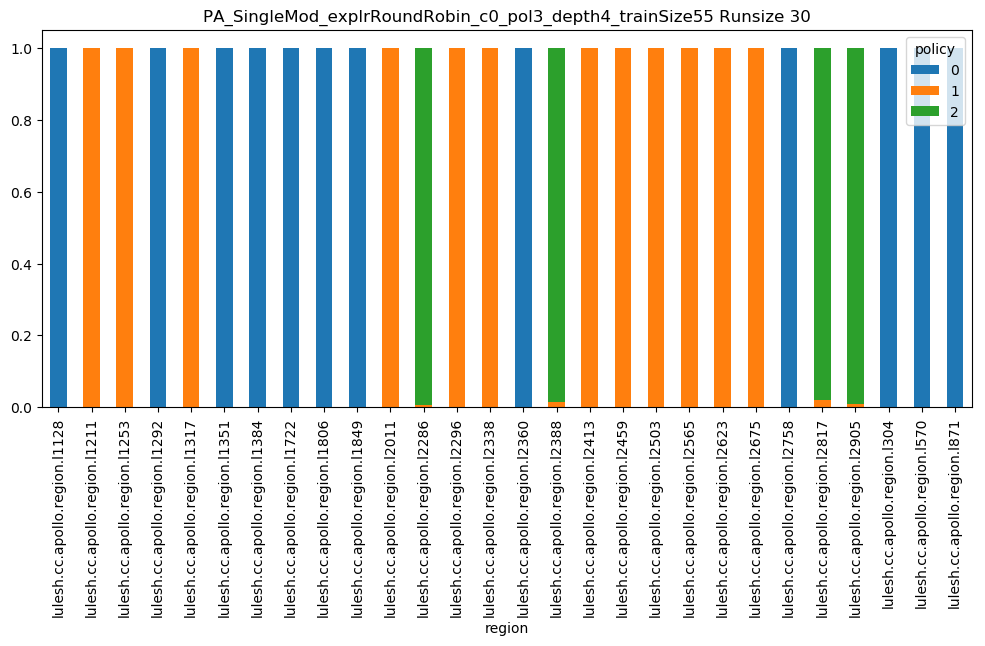

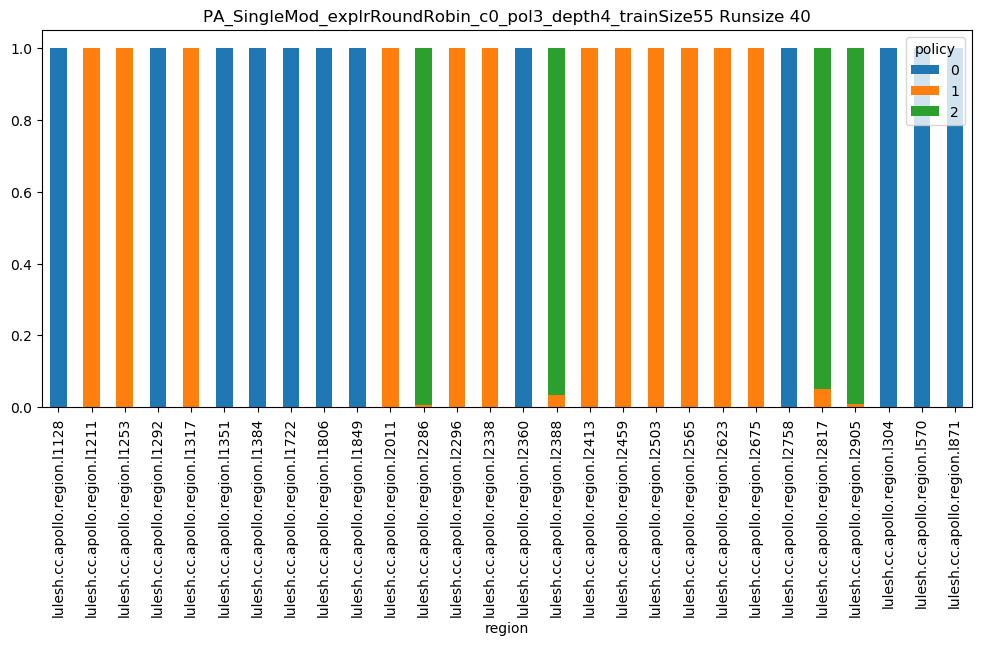

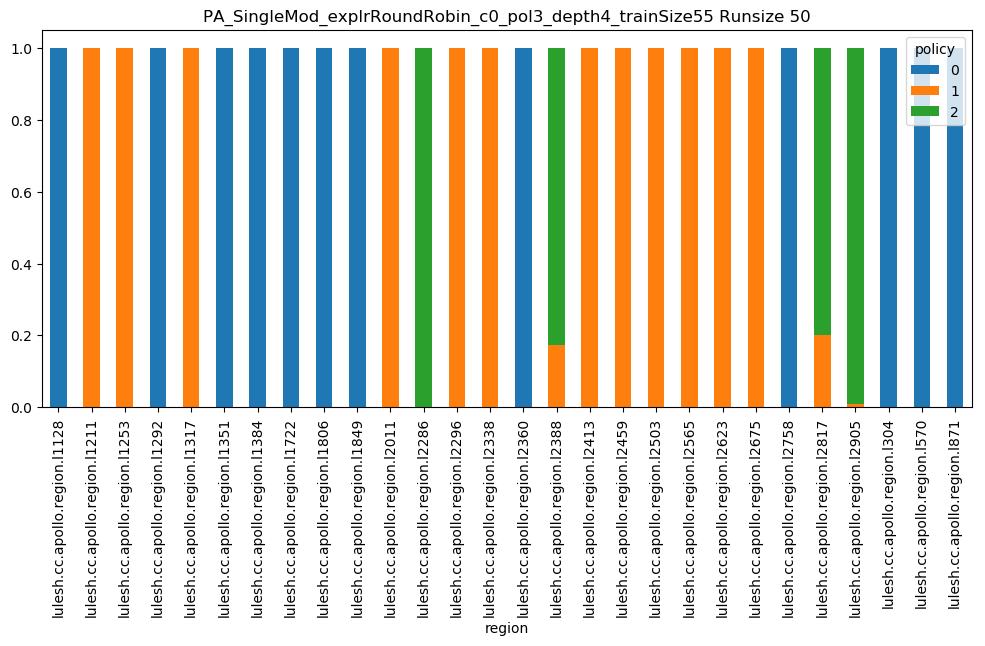

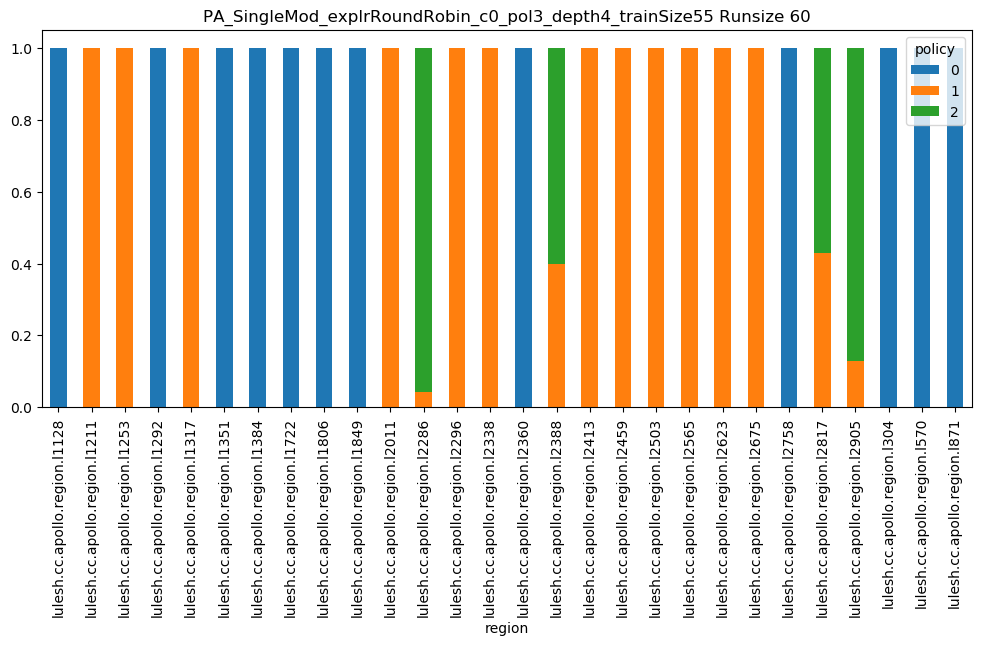

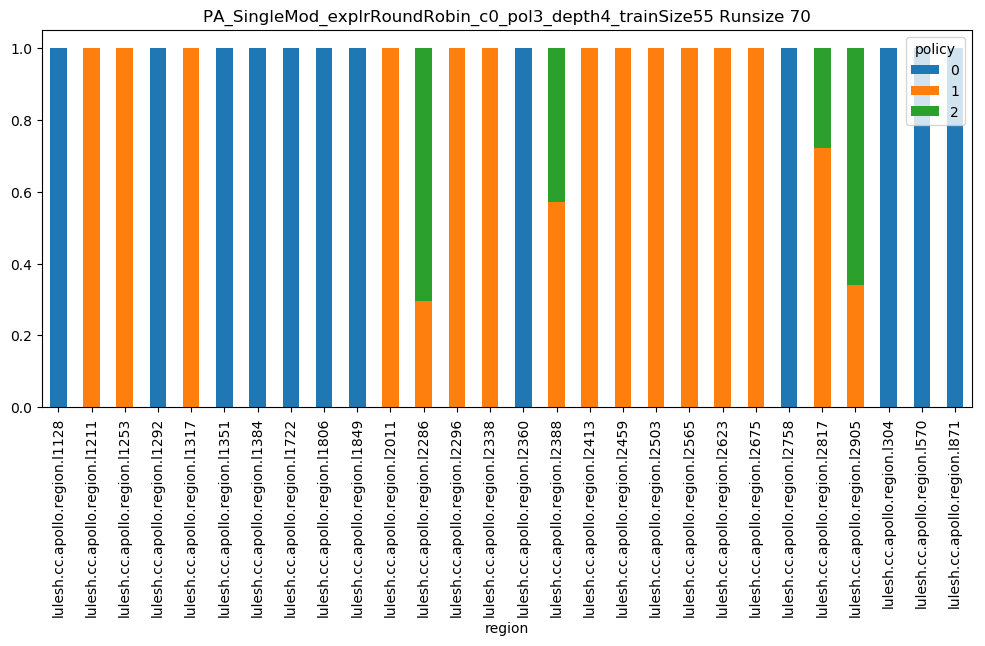

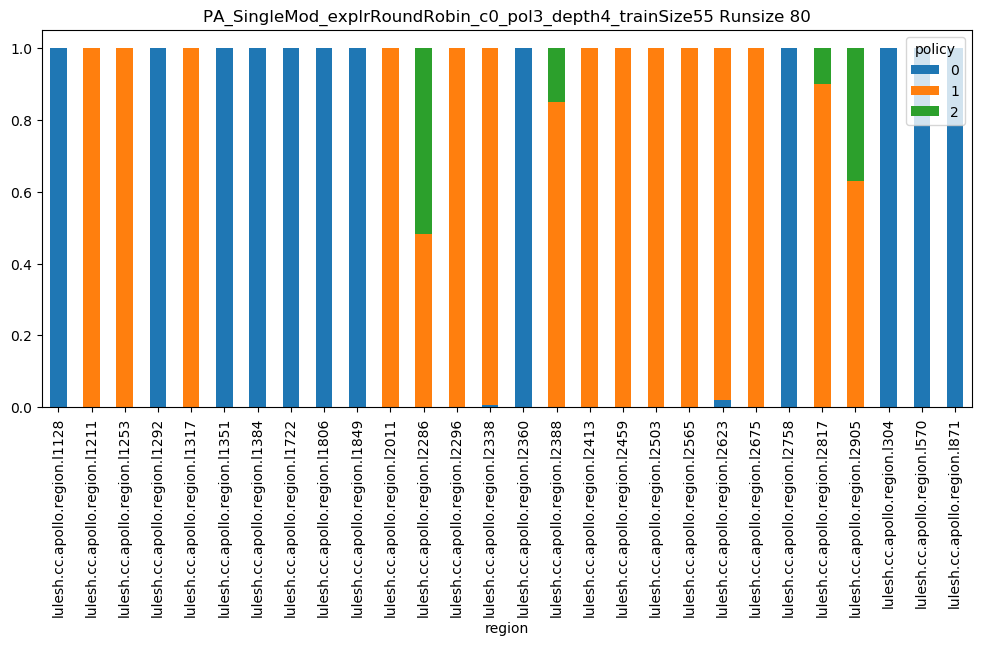

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 54 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


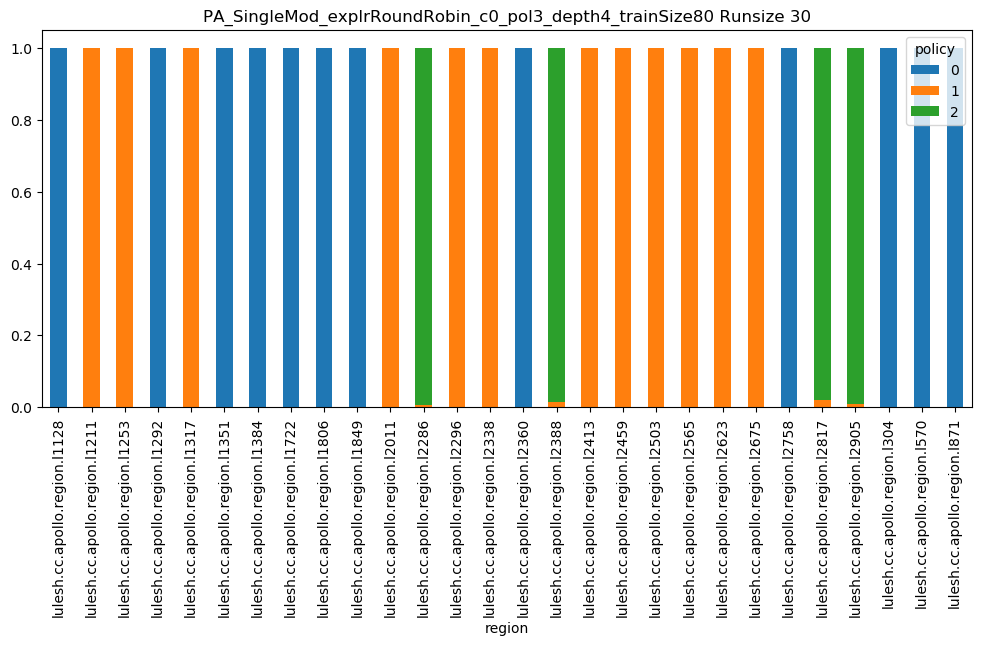

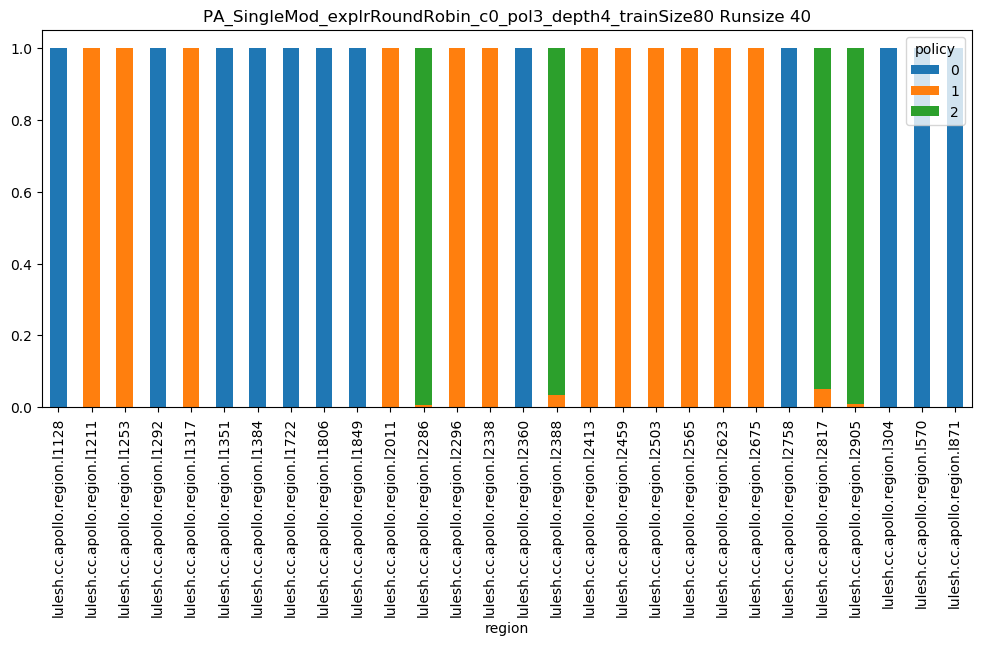

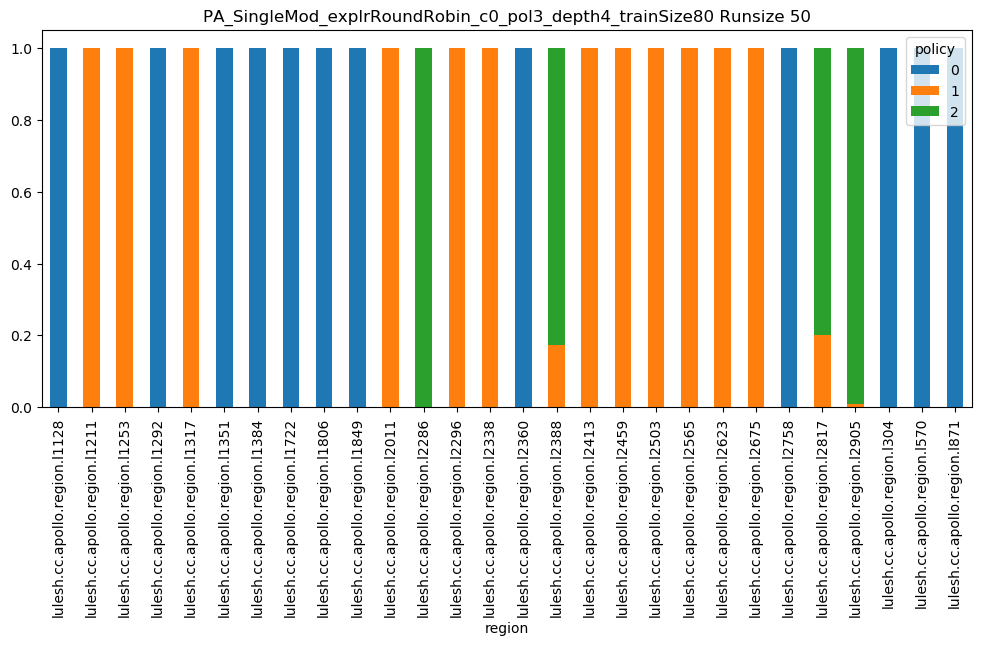

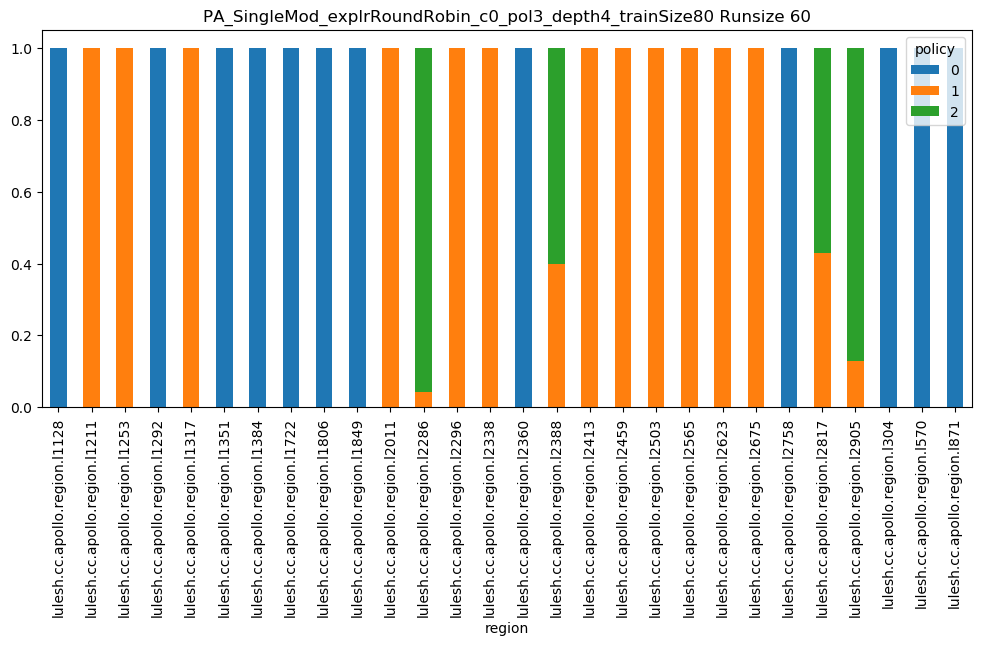

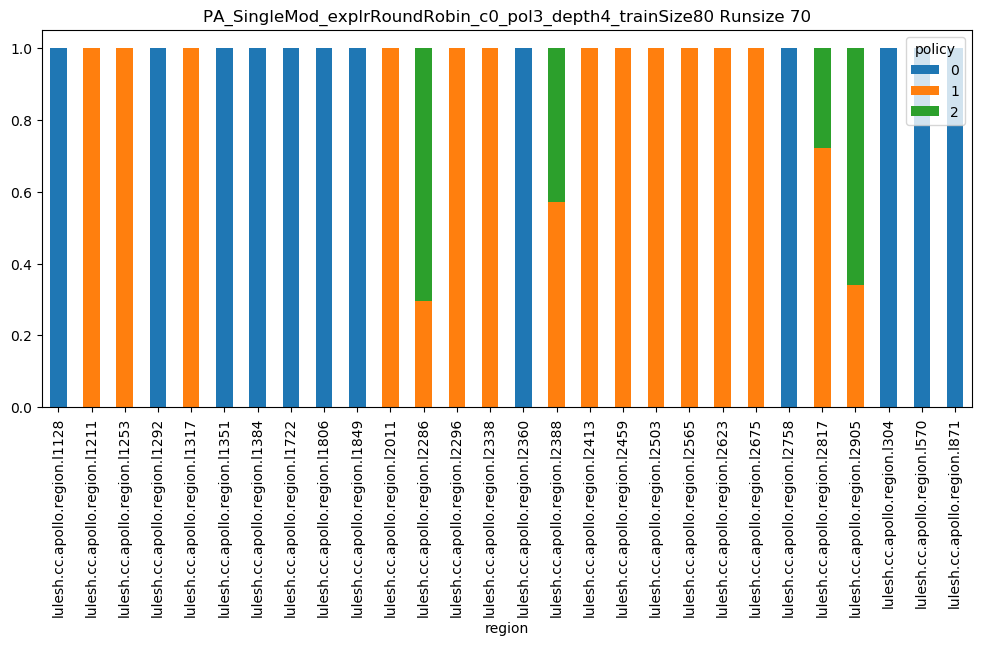

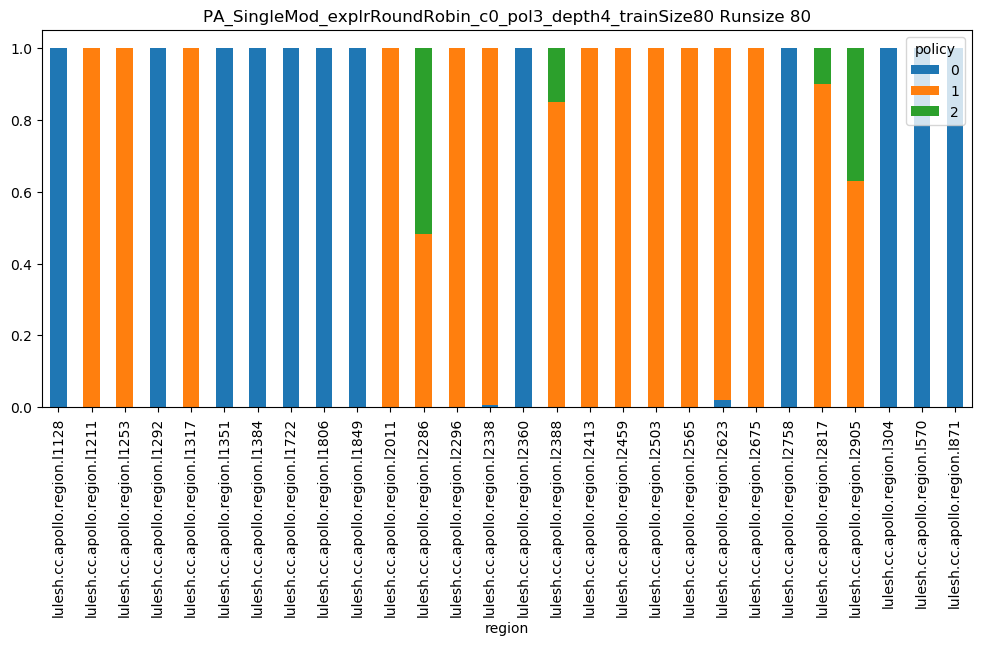

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 54 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


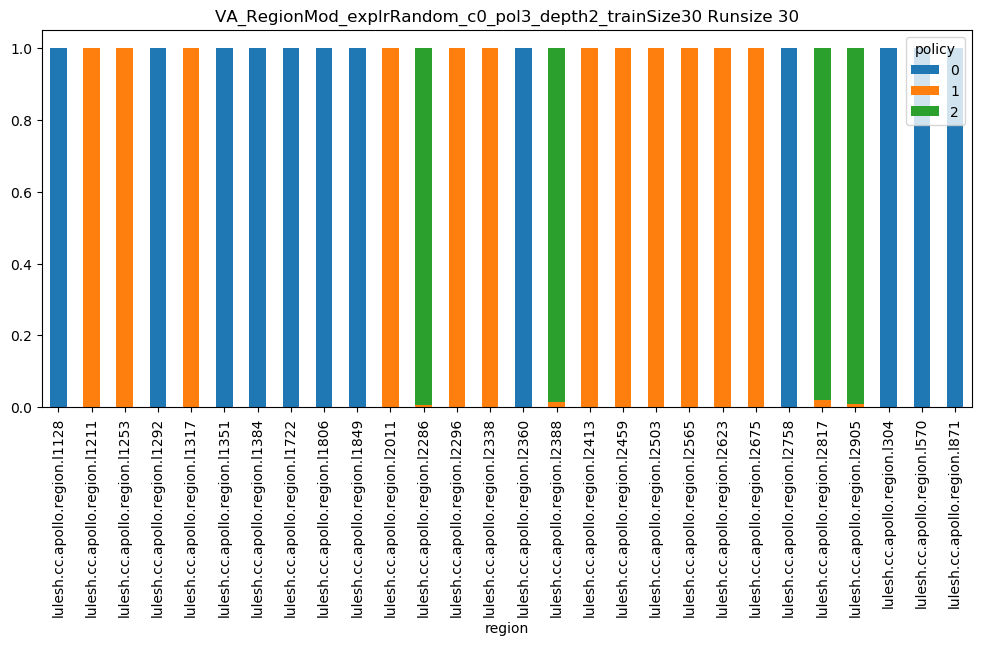

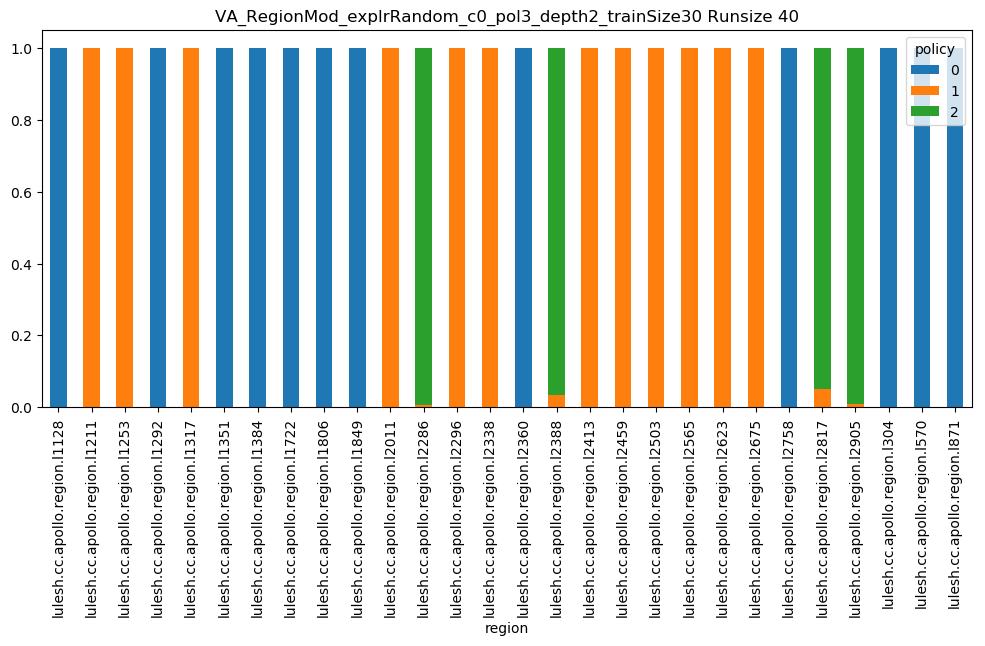

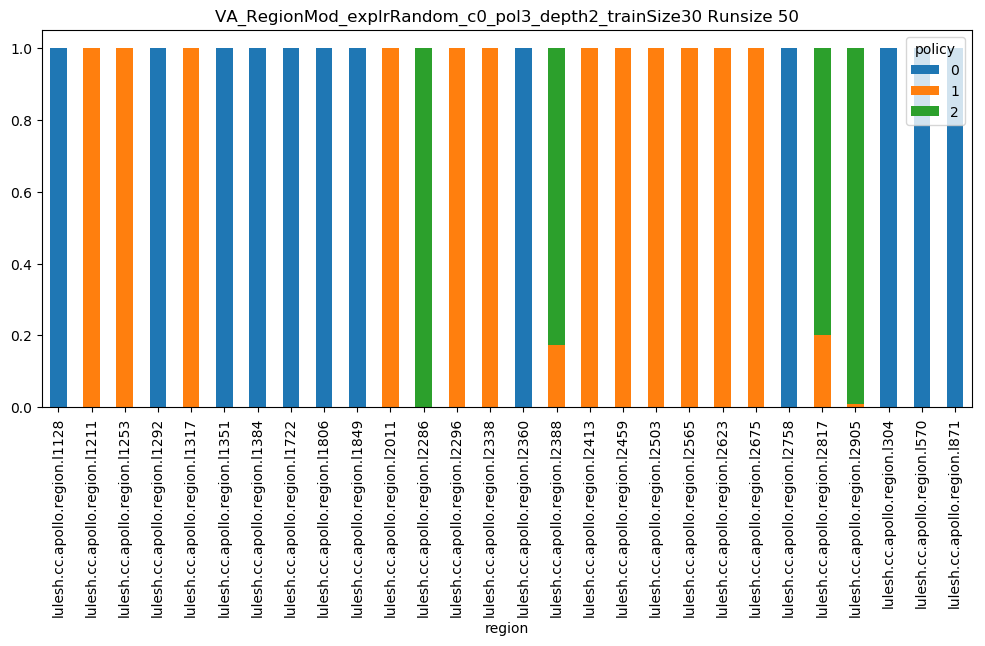

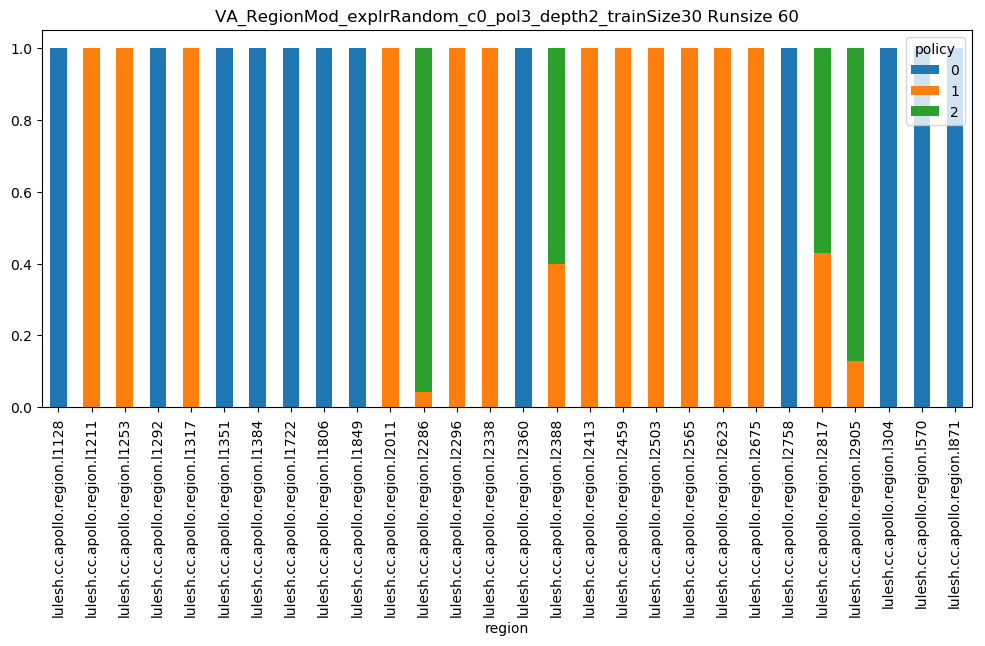

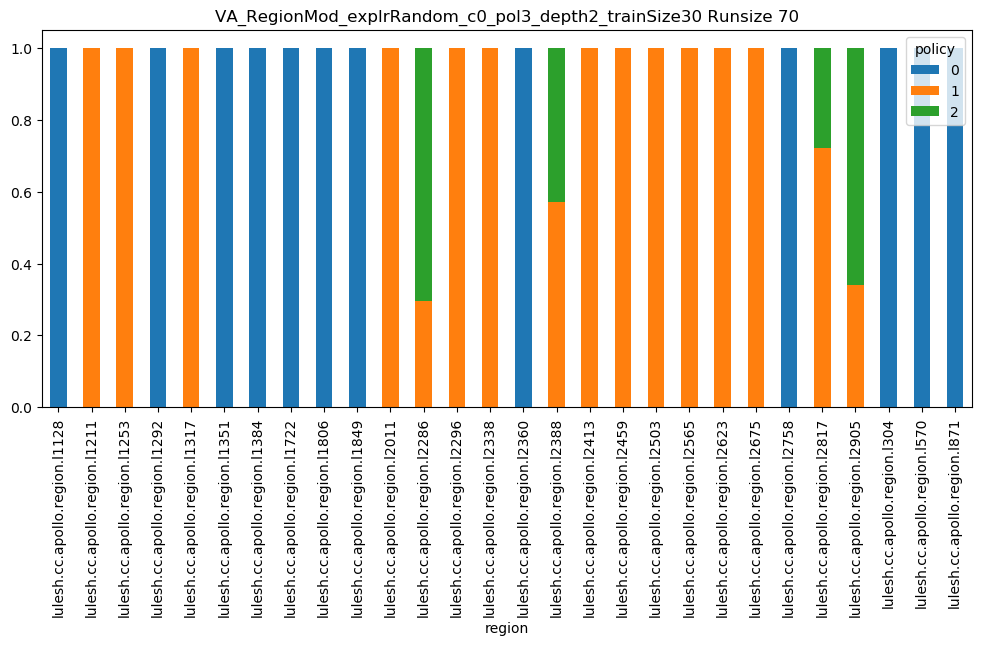

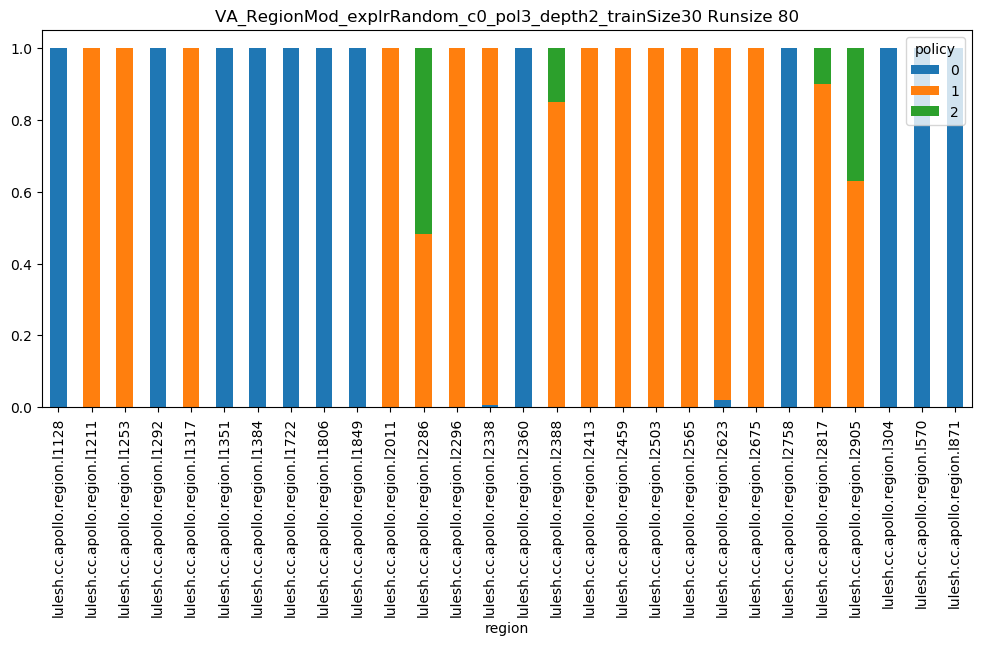

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 54 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


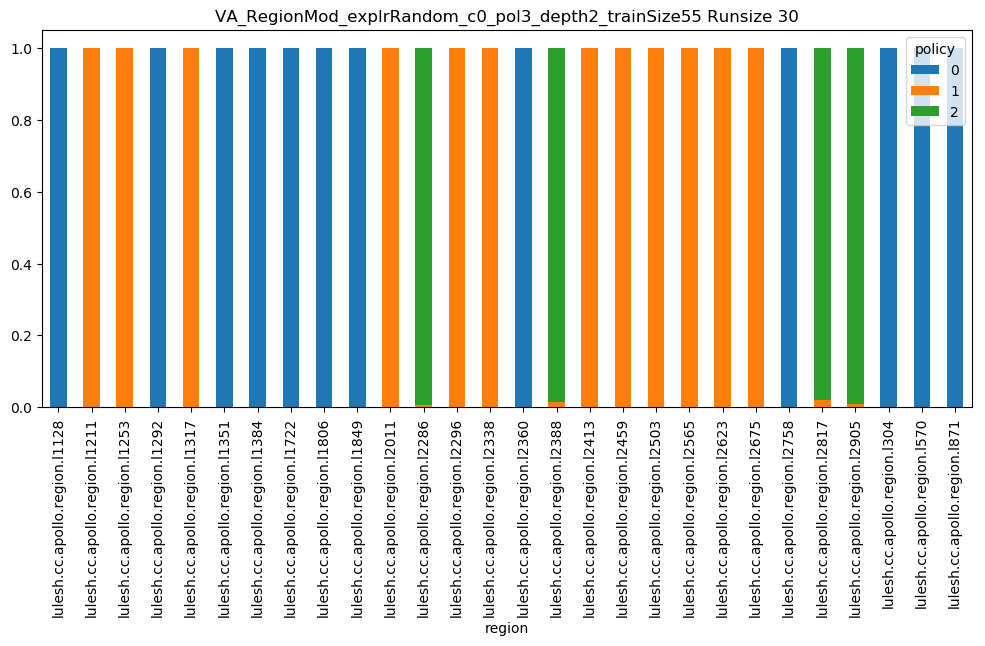

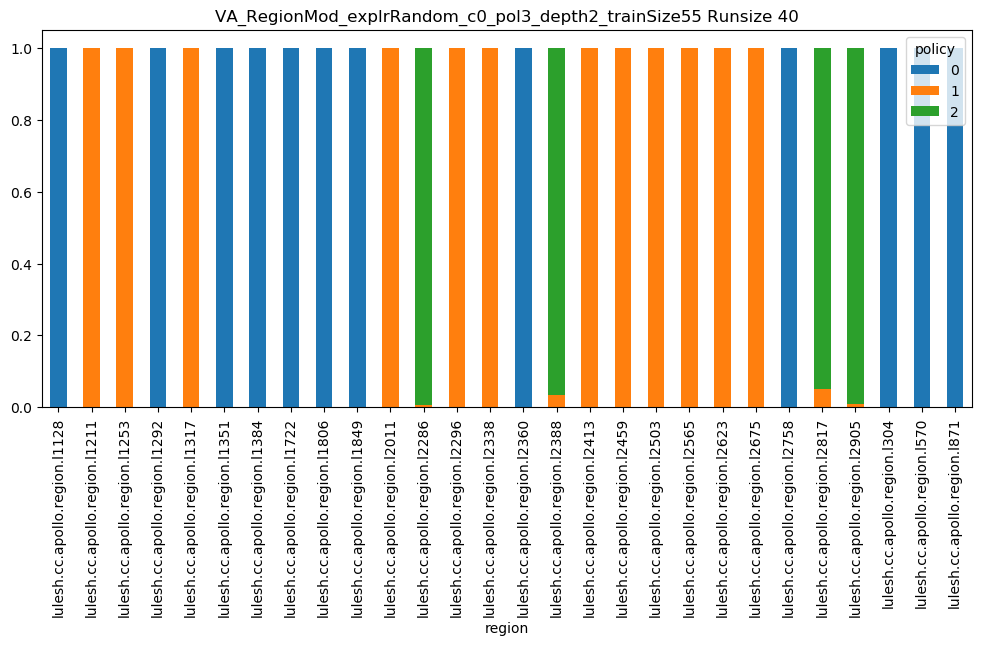

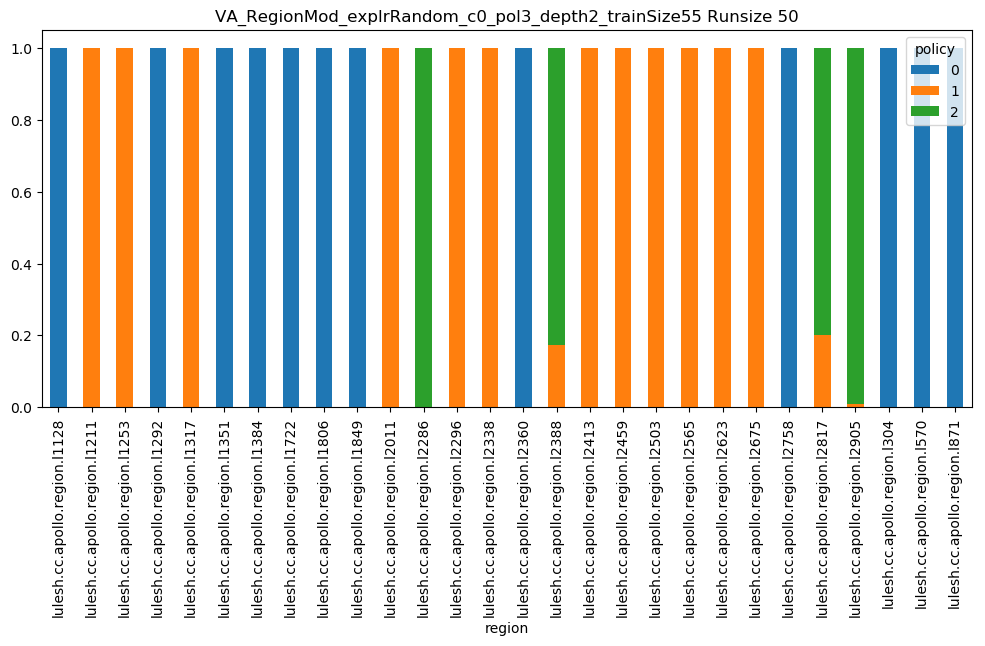

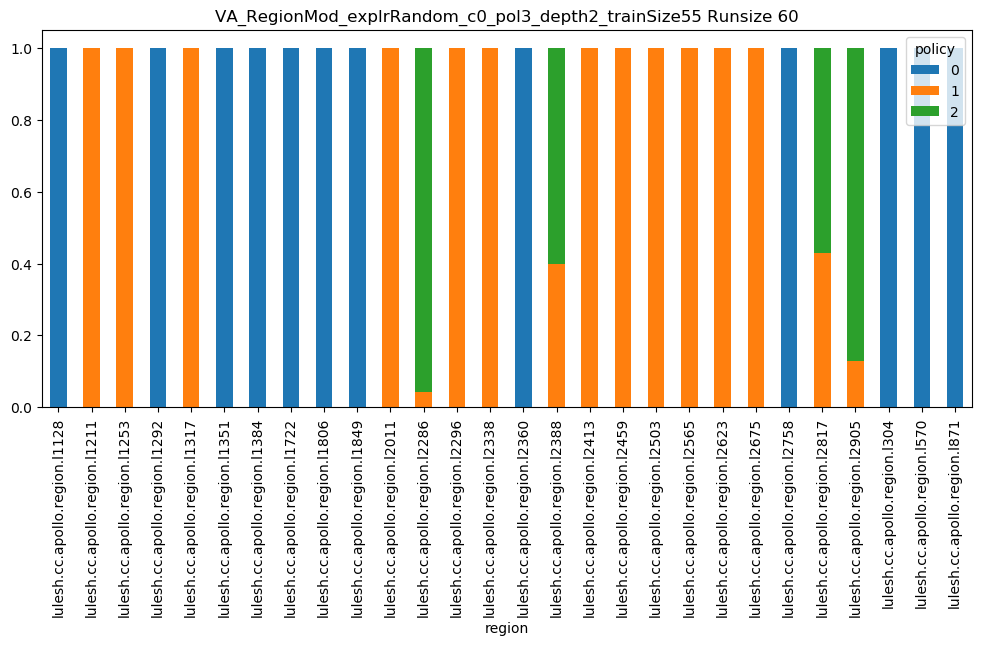

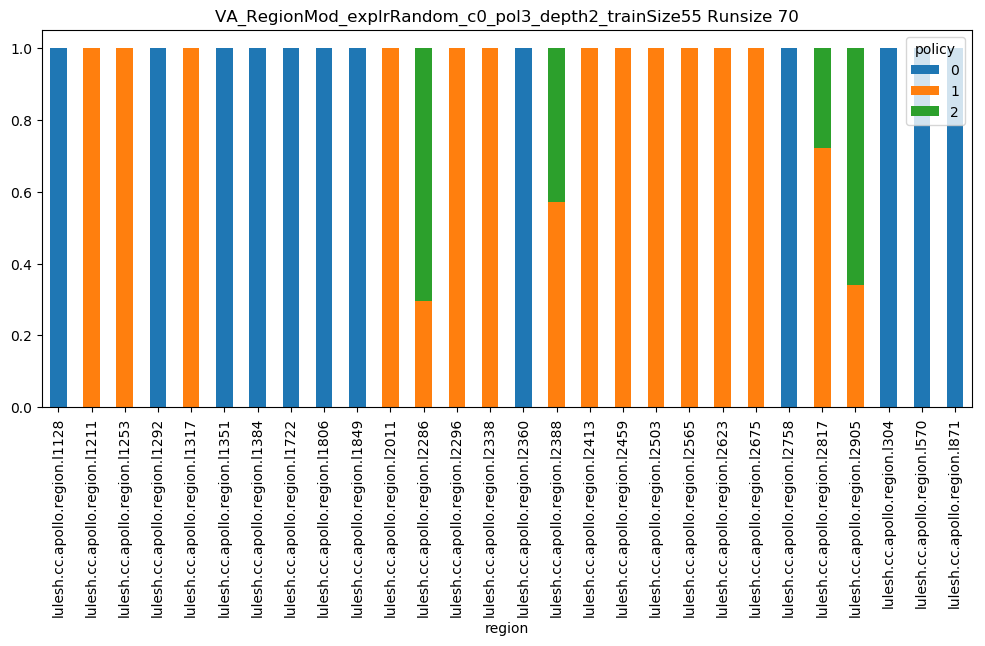

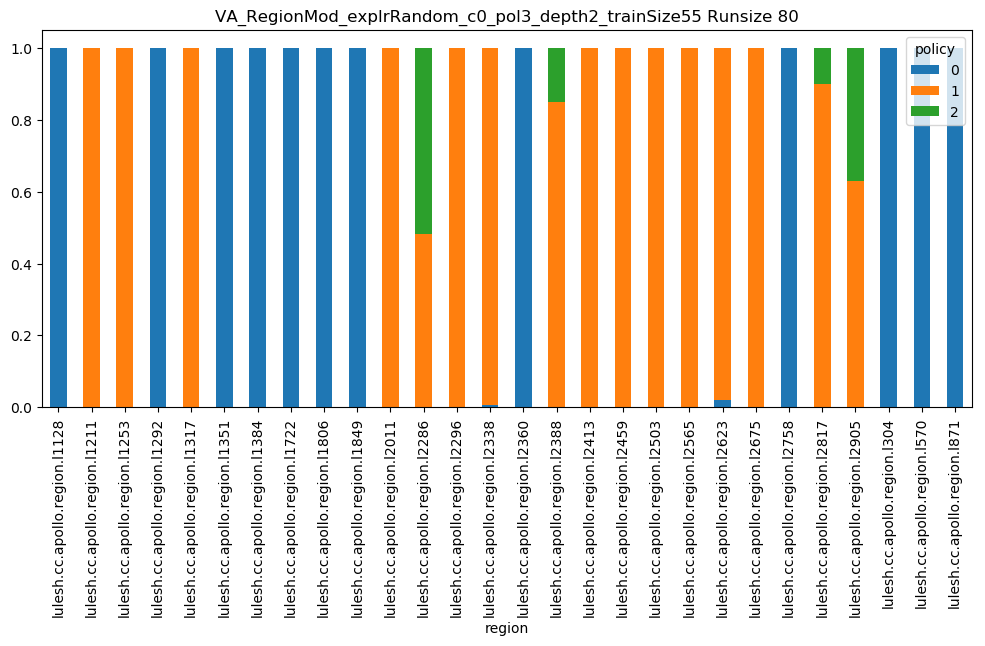

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 54 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


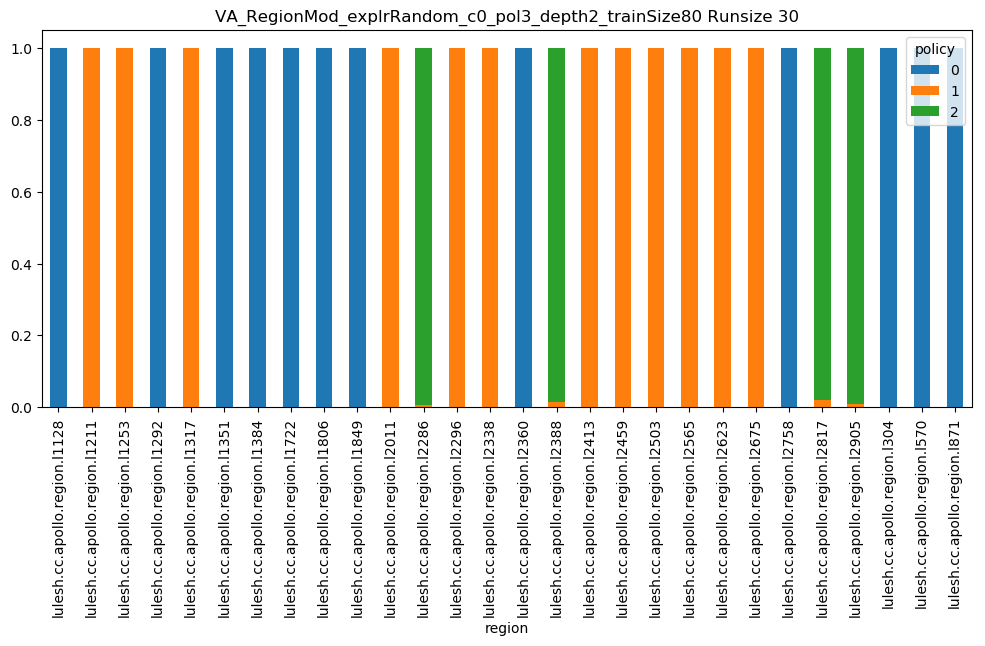

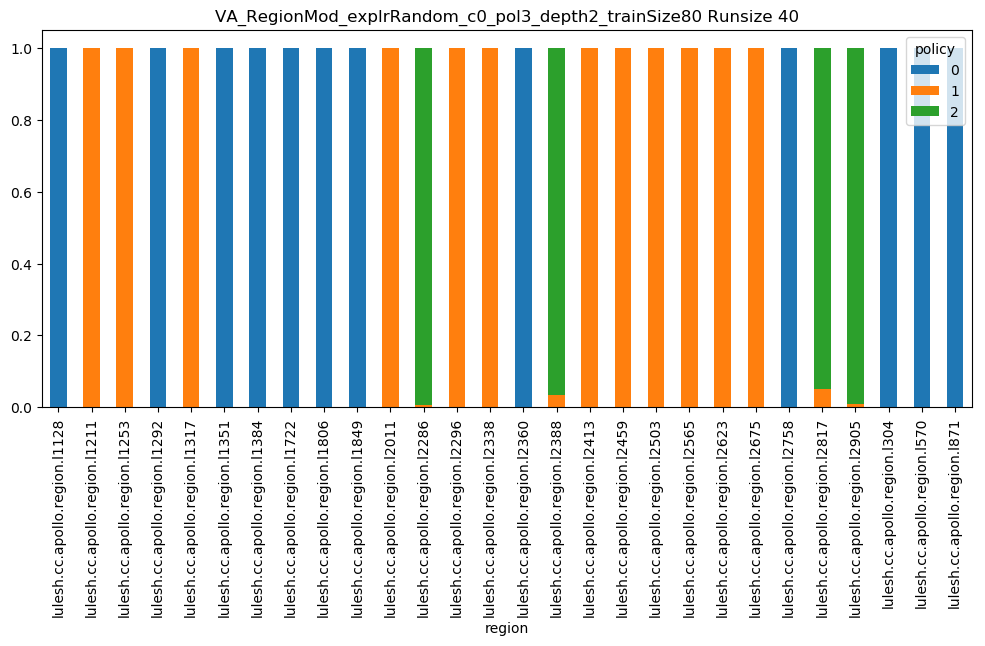

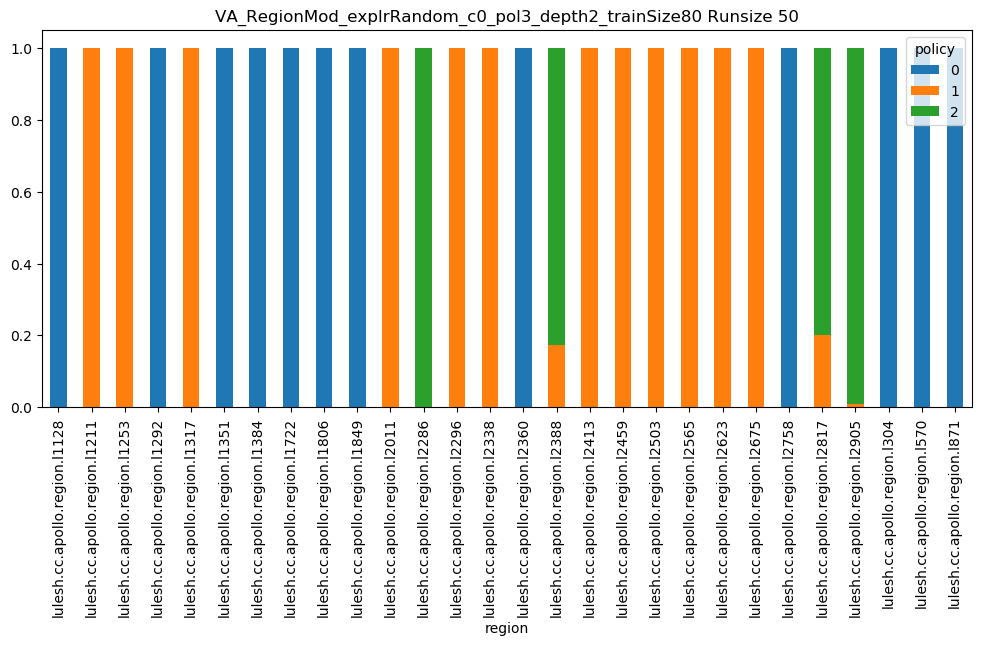

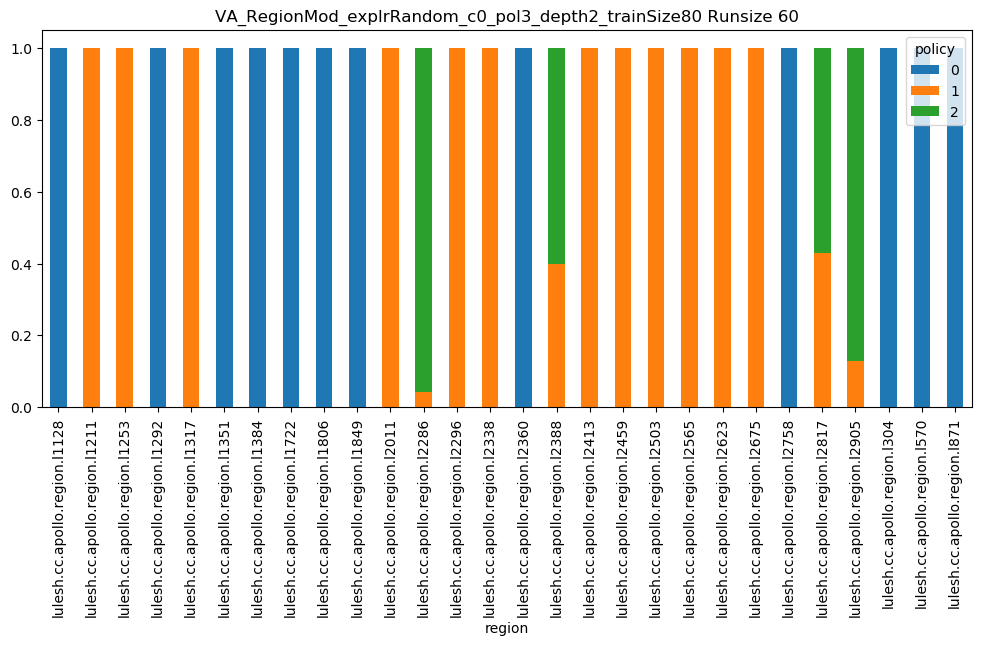

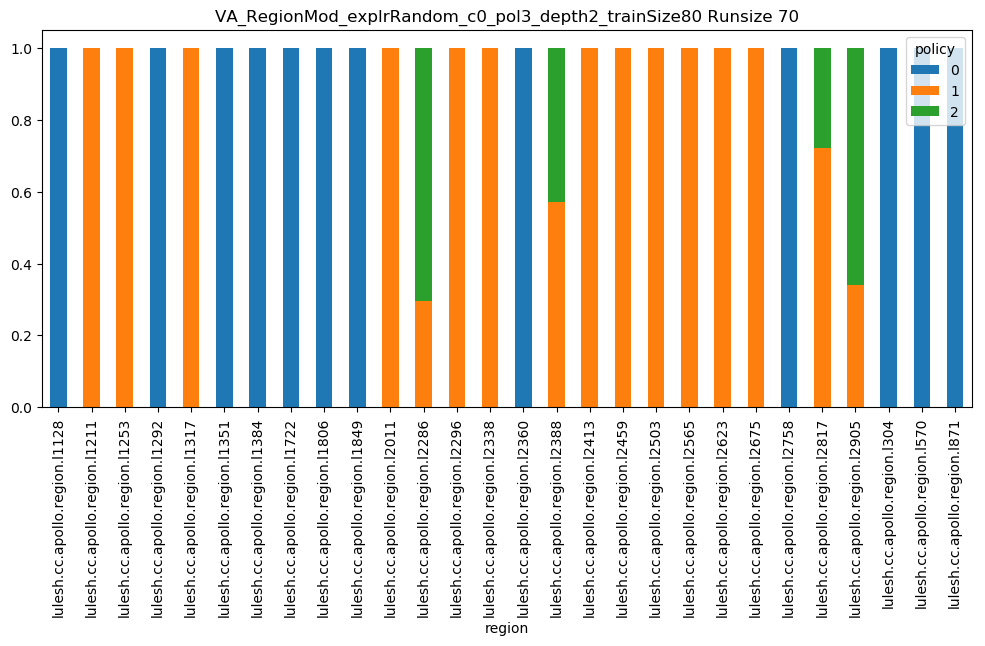

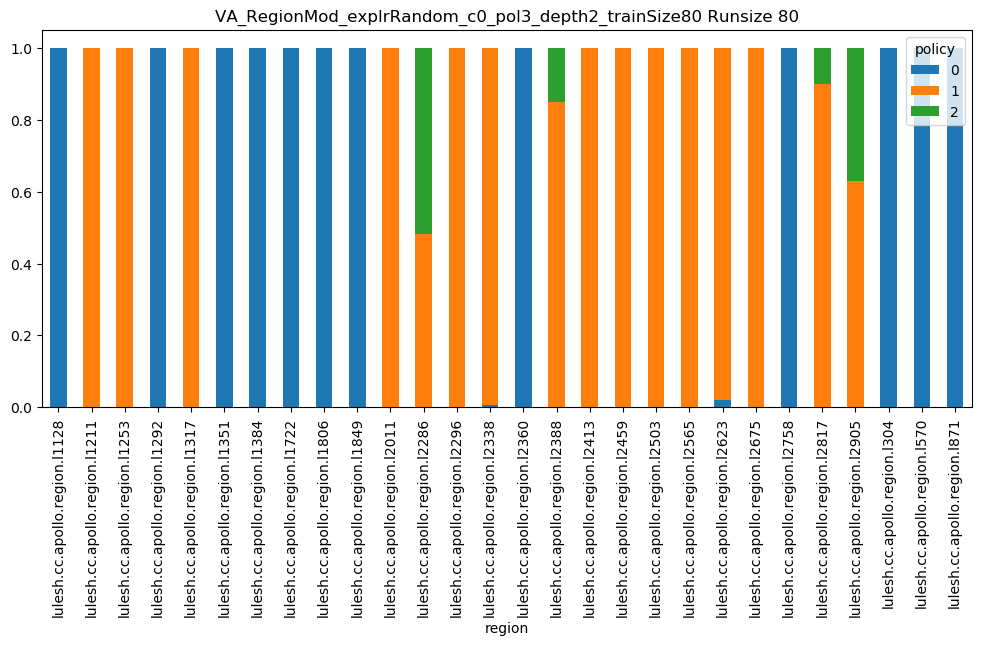

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


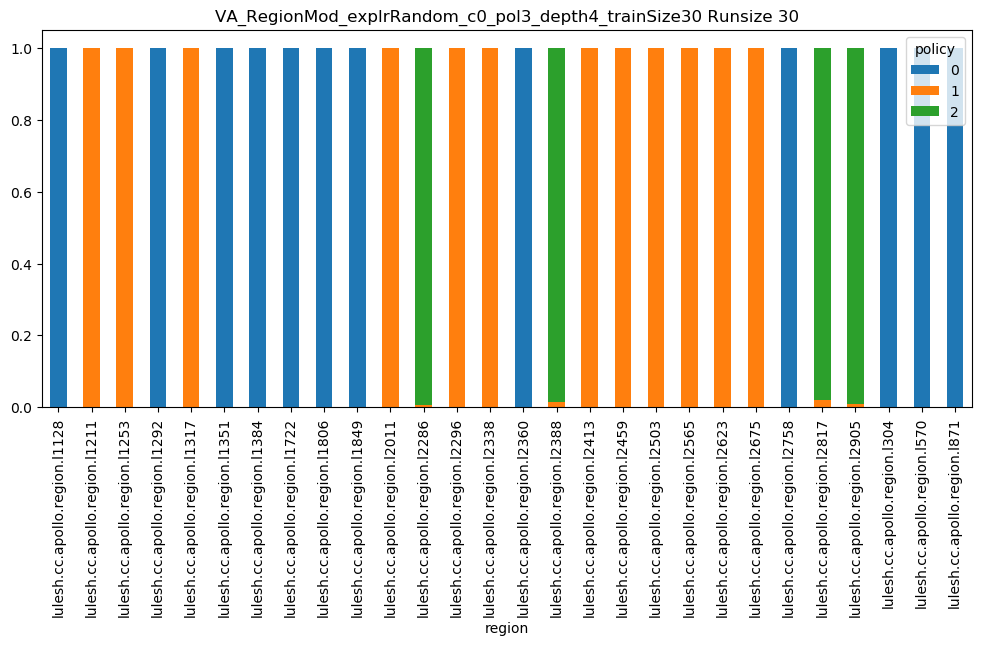

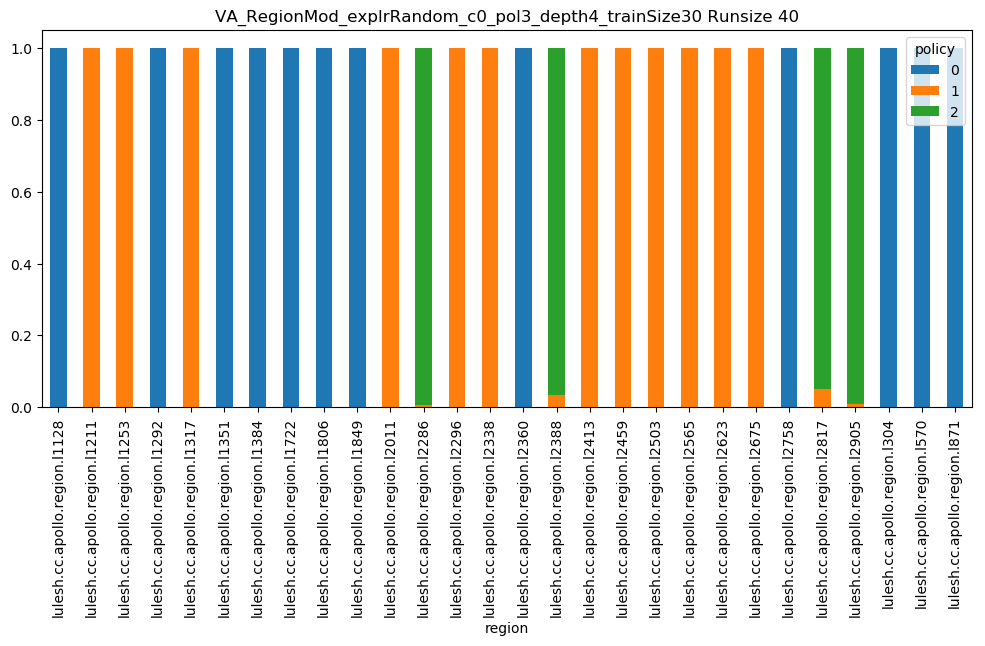

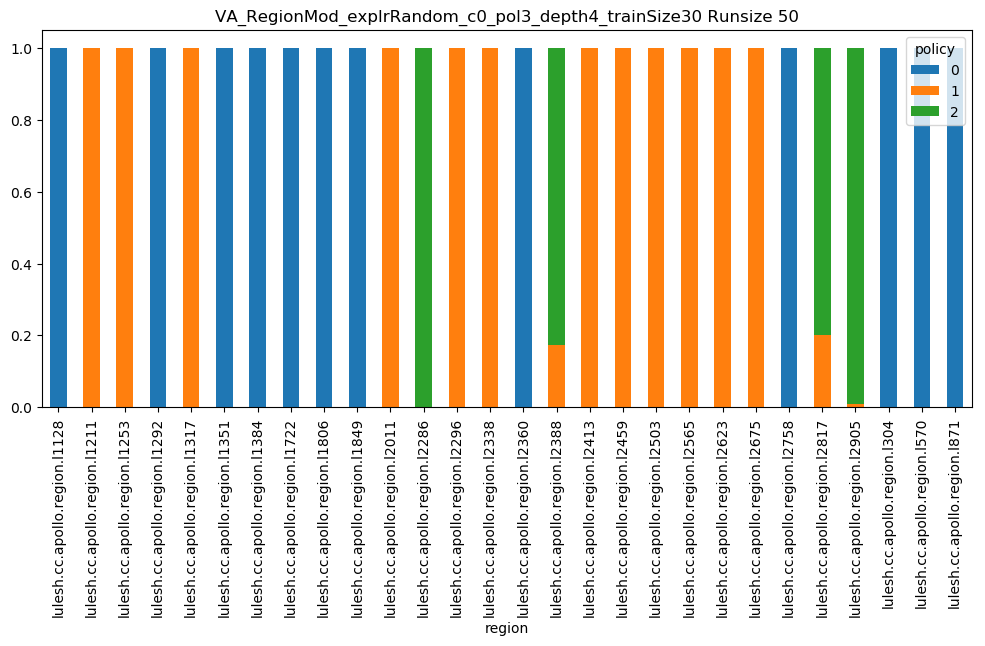

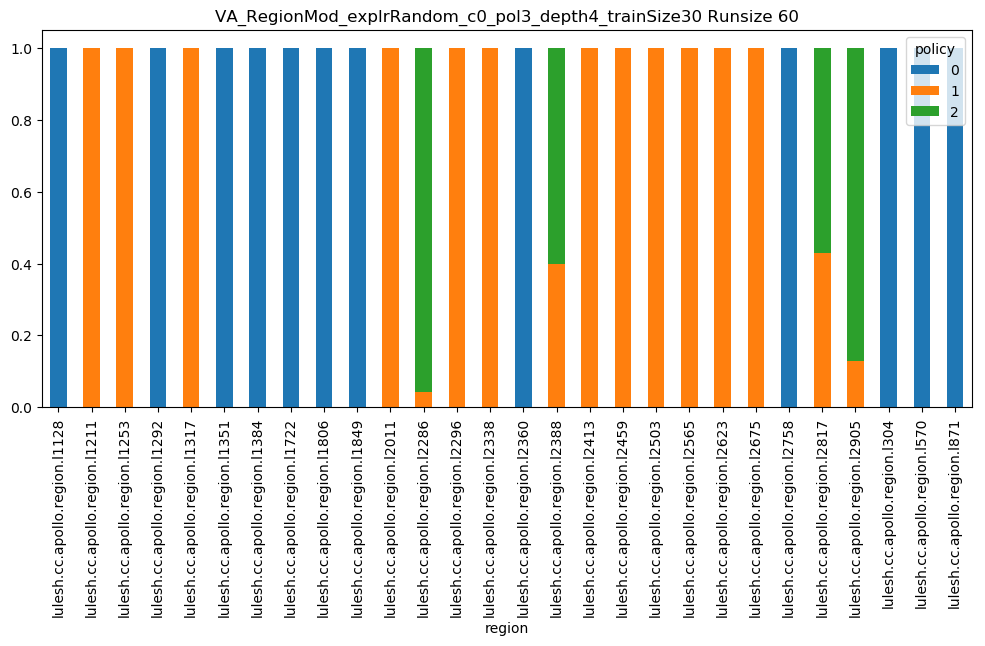

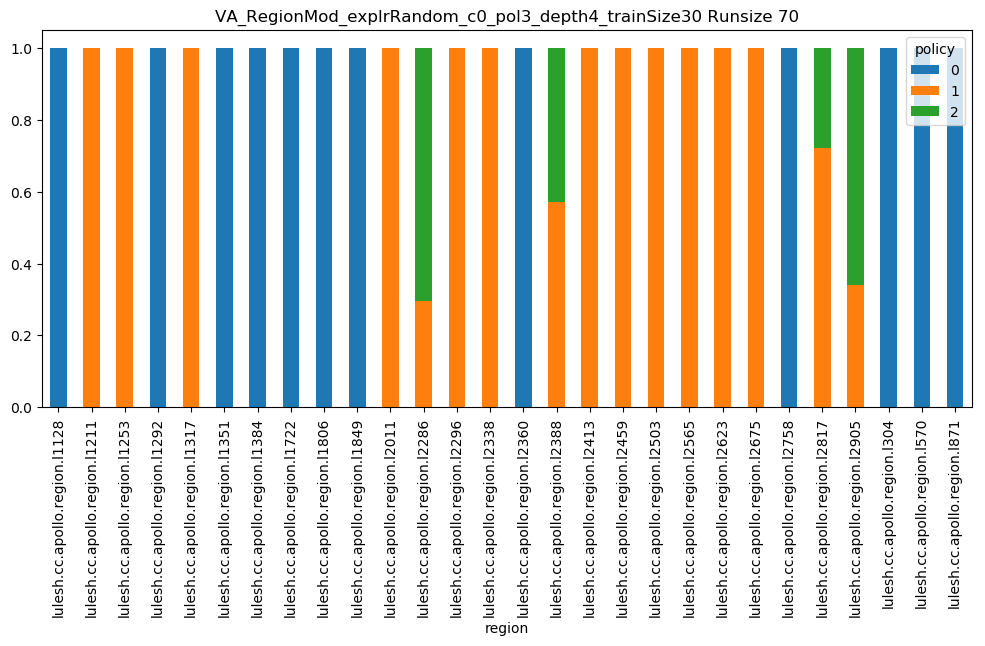

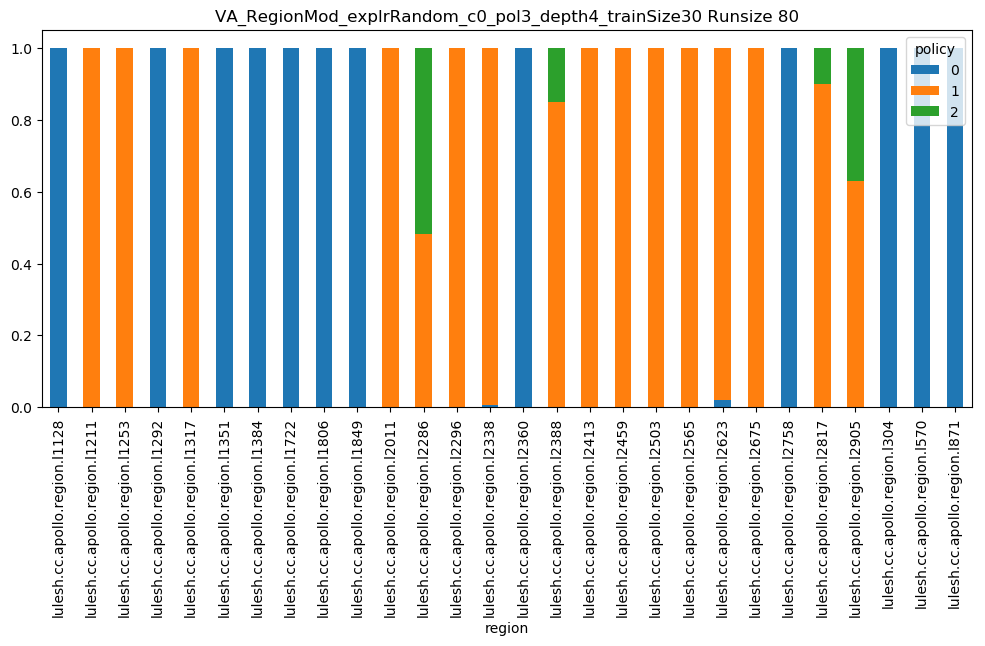

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 58 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


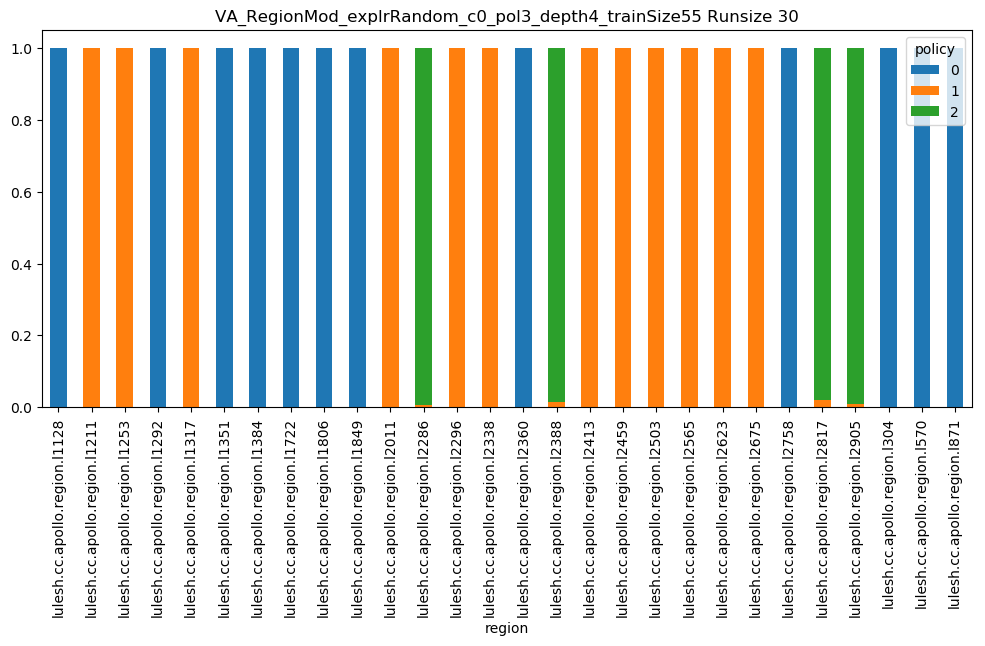

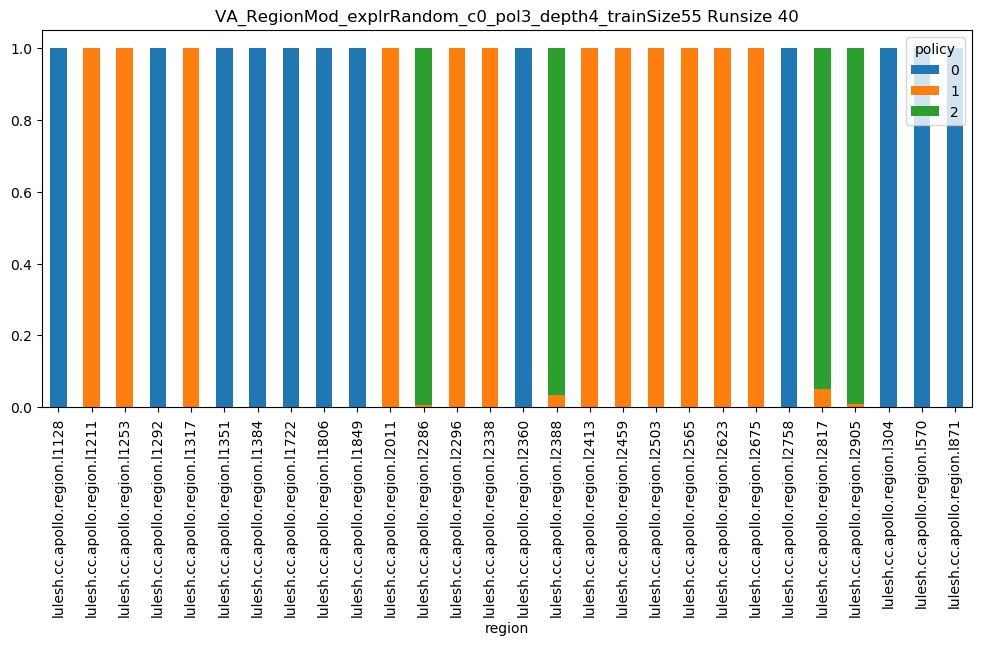

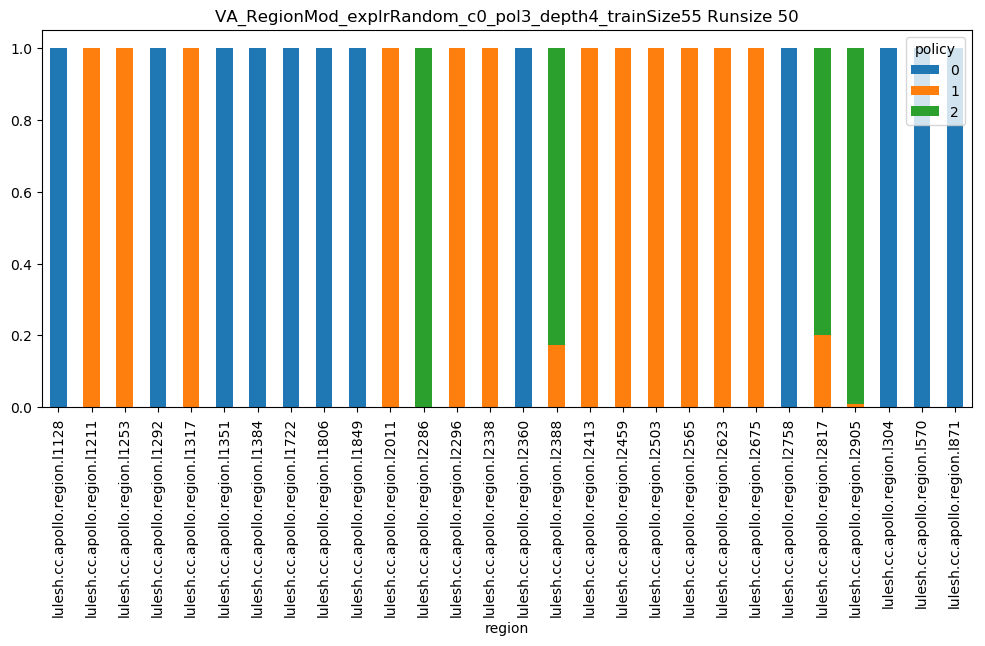

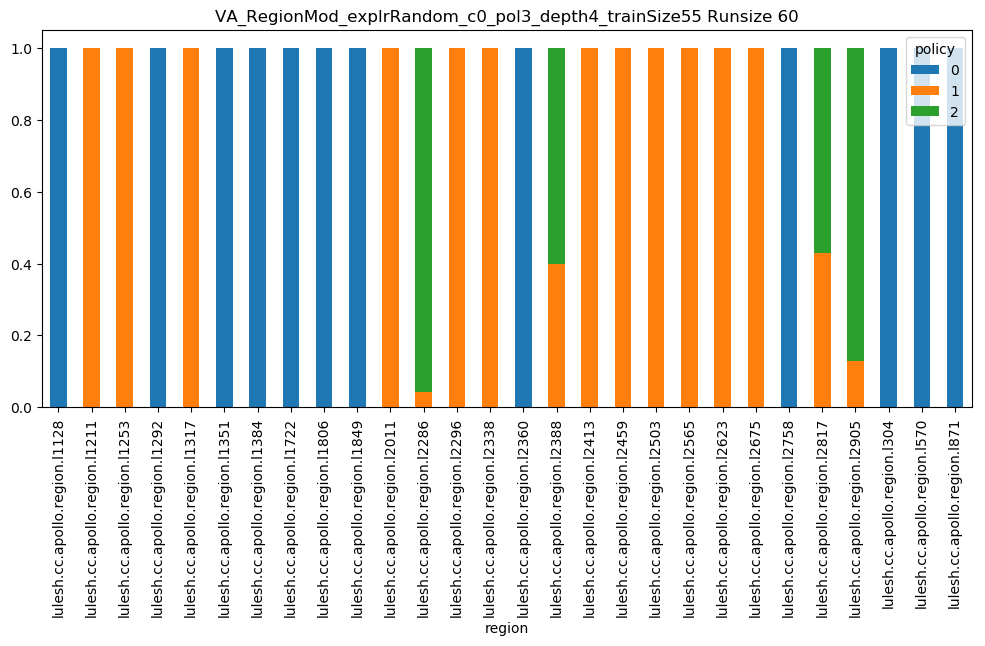

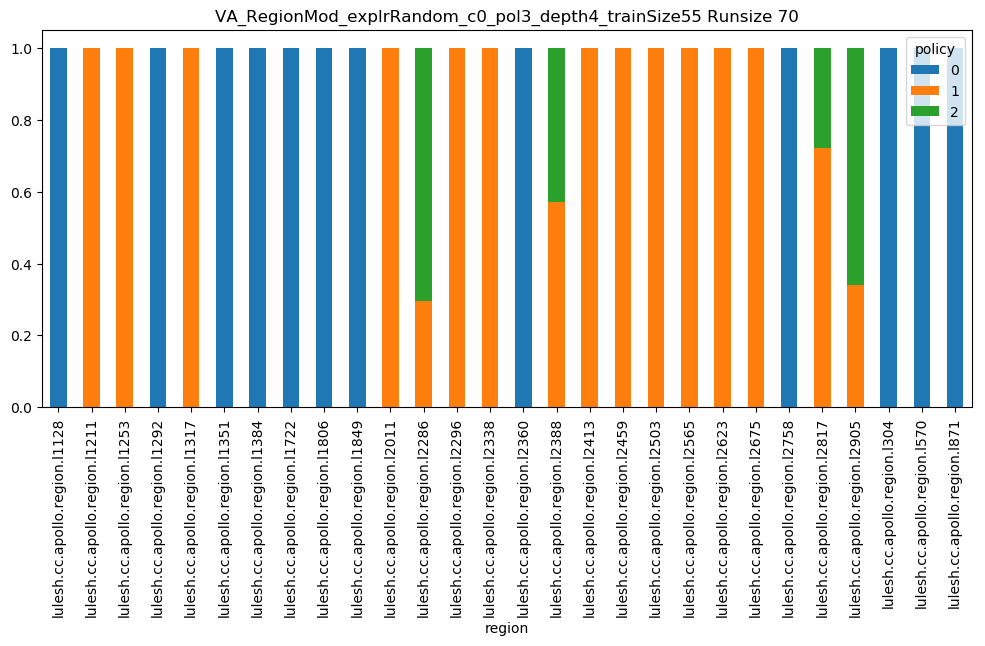

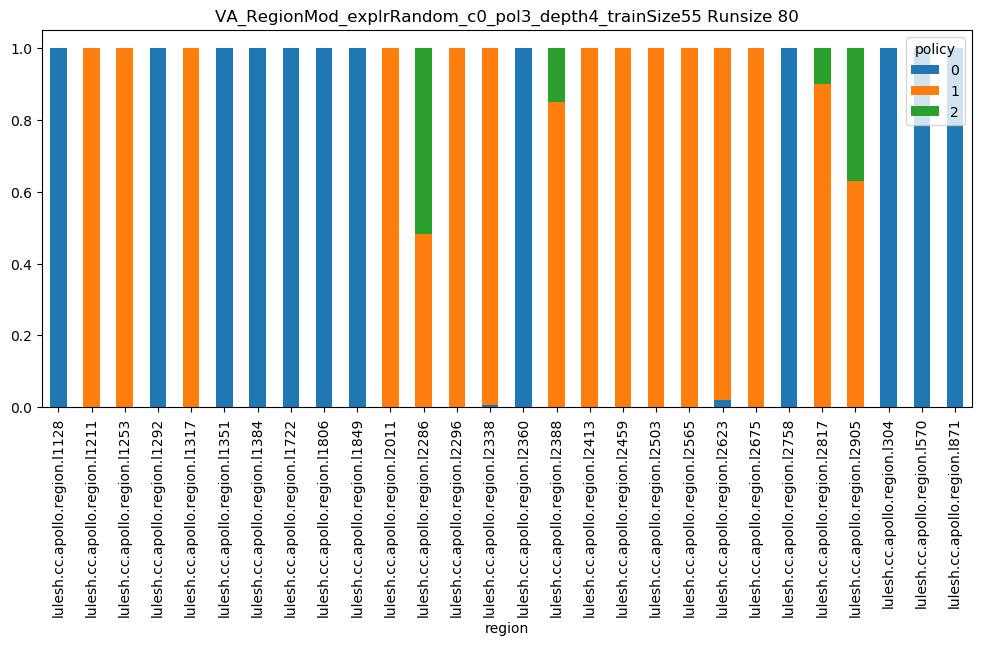

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 56 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


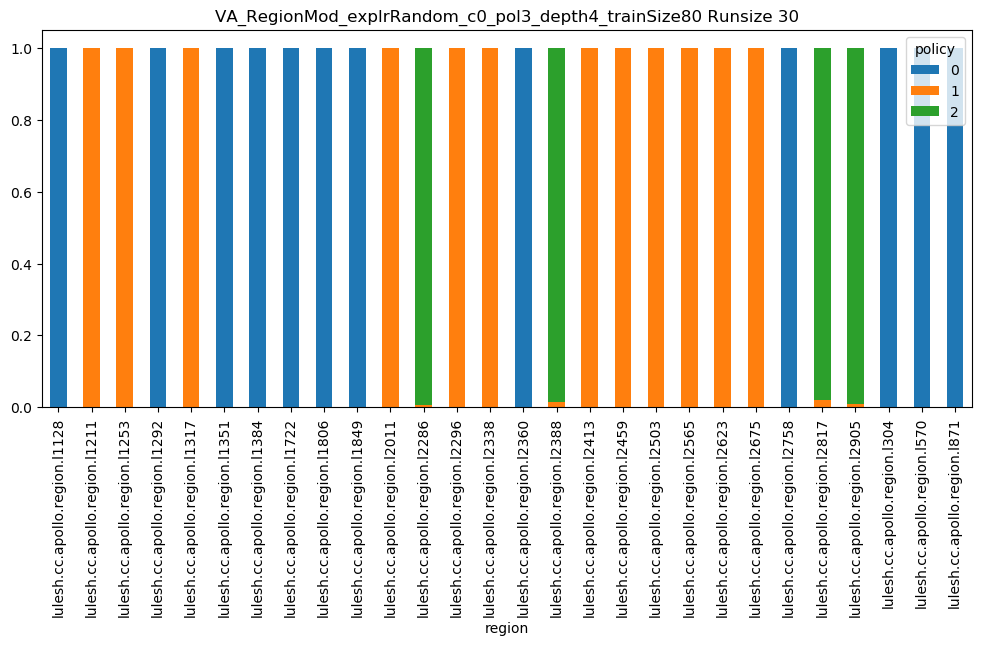

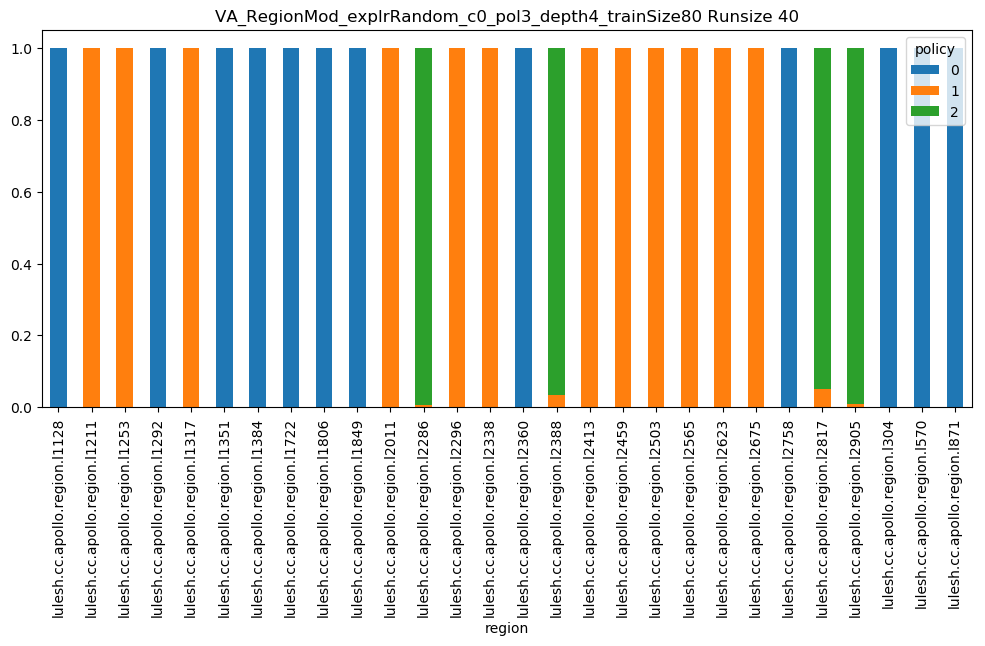

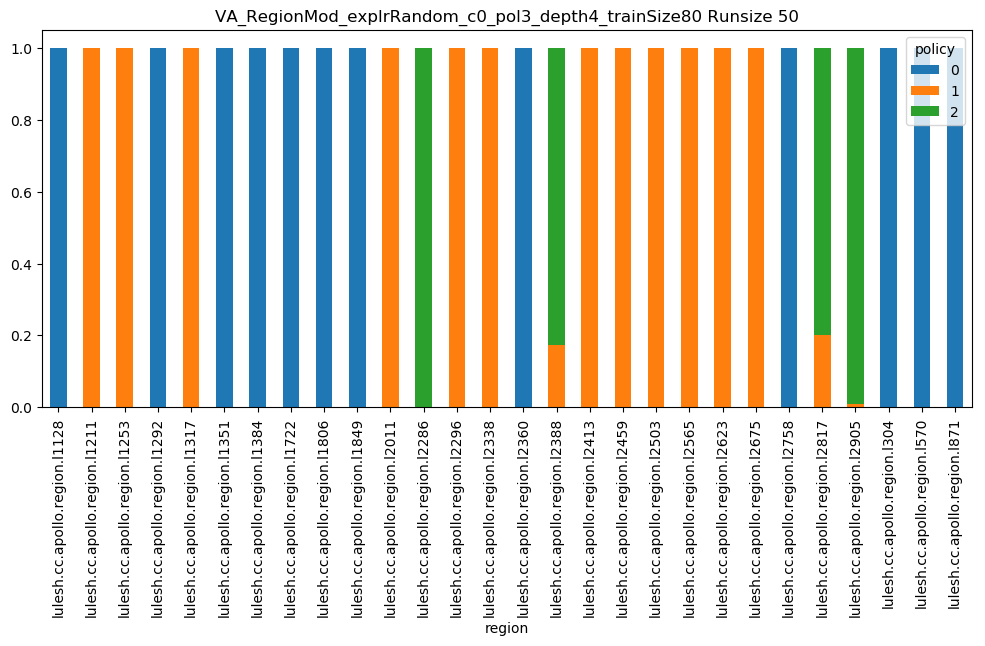

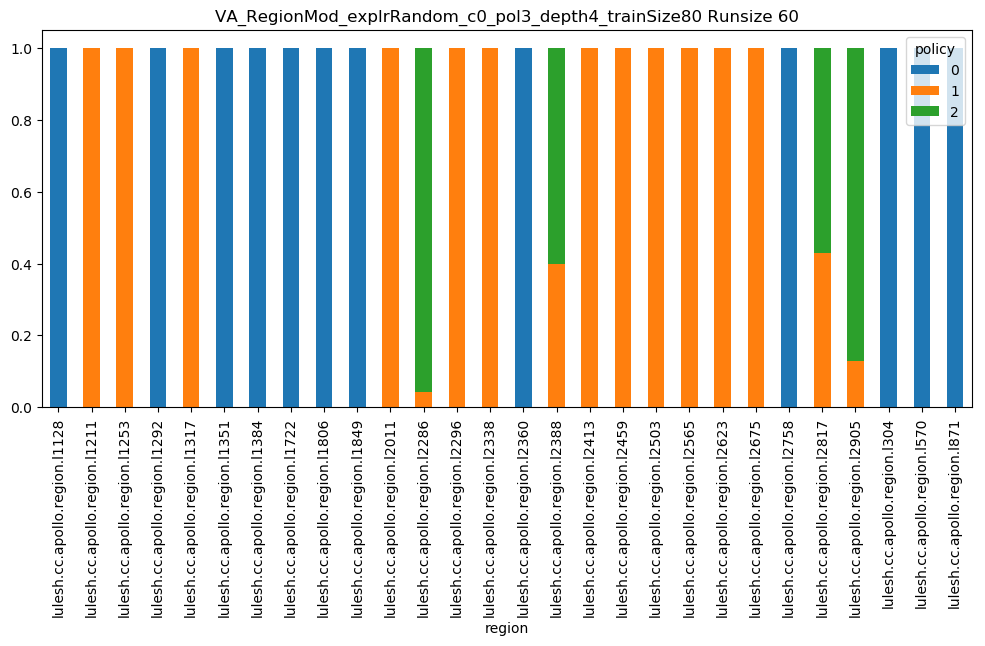

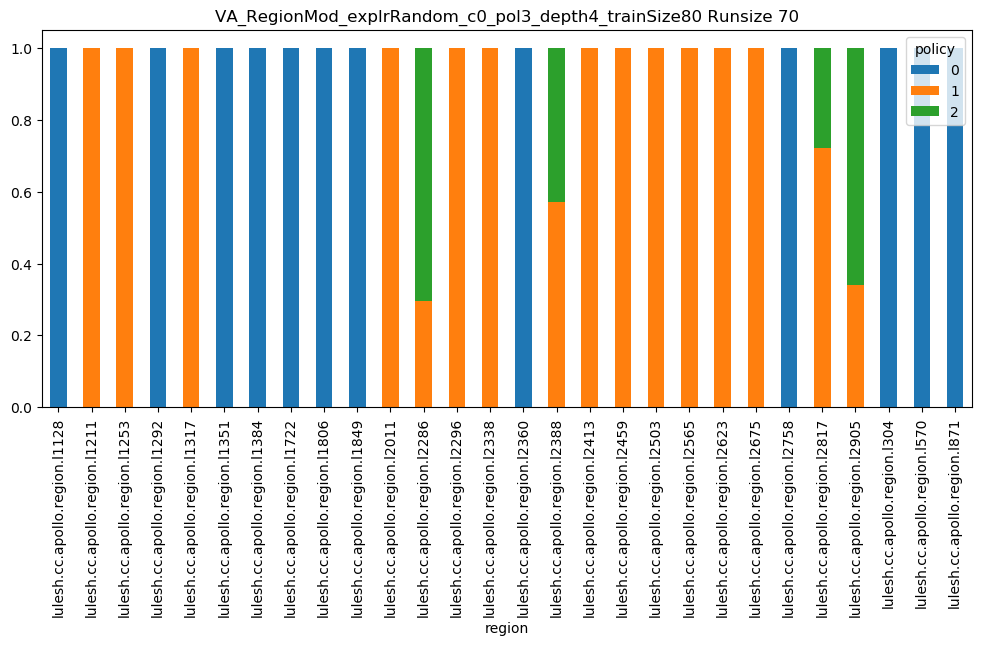

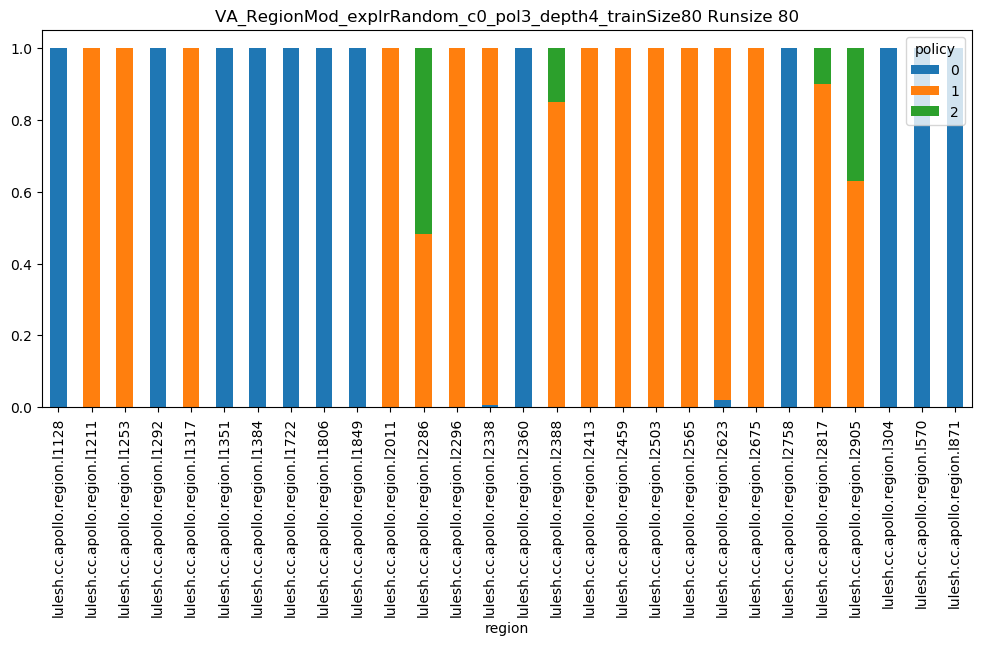

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 59 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


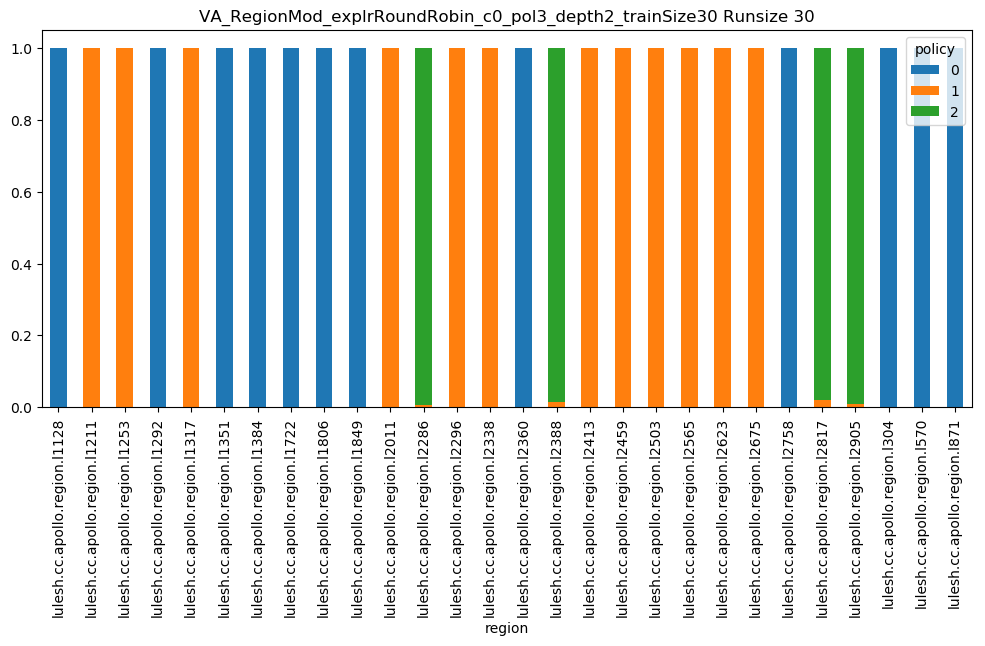

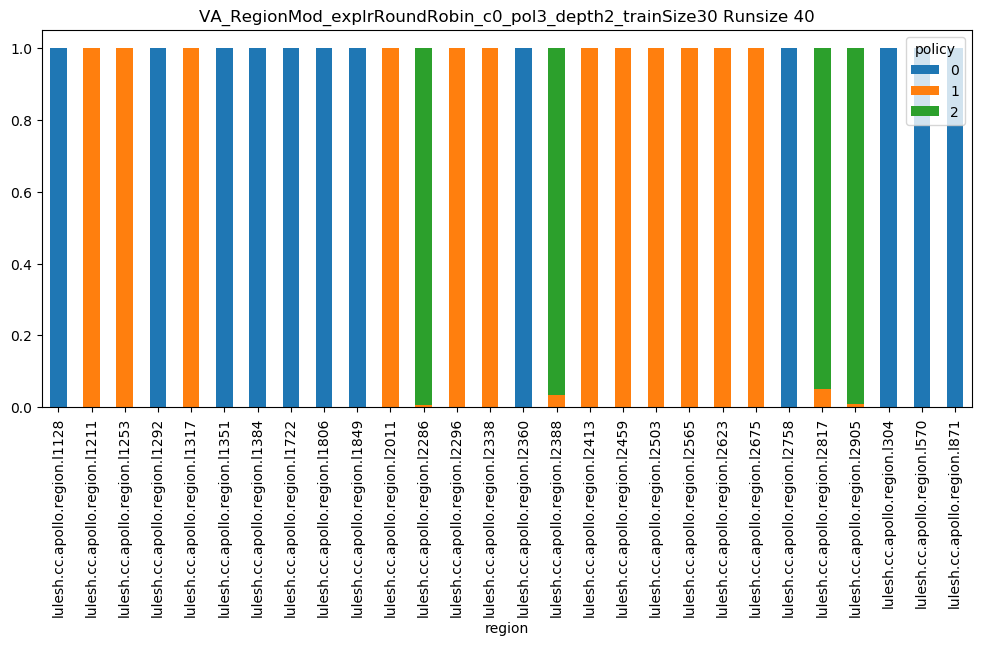

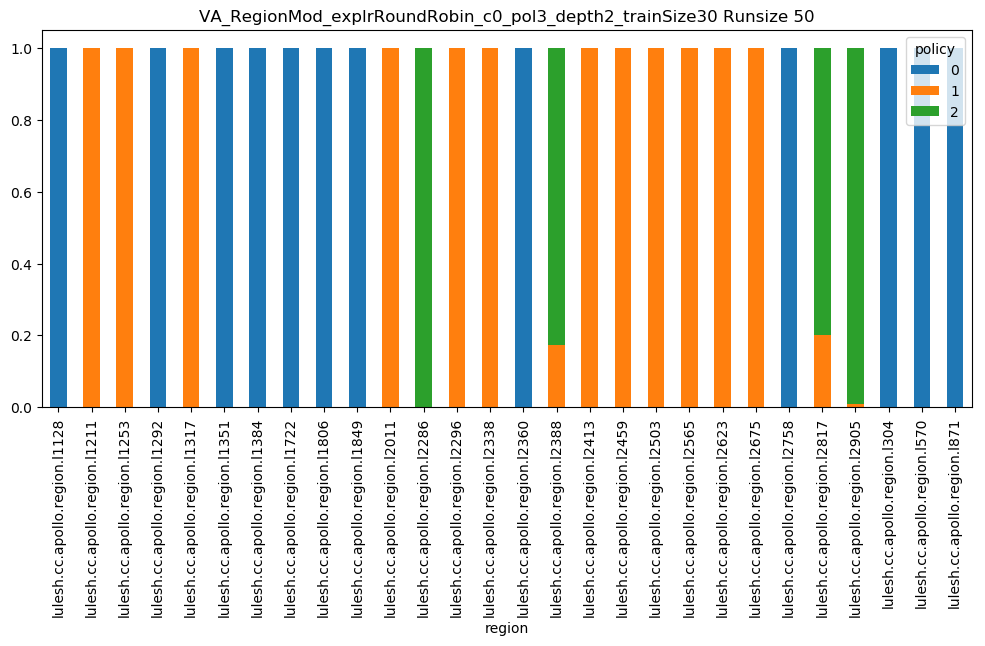

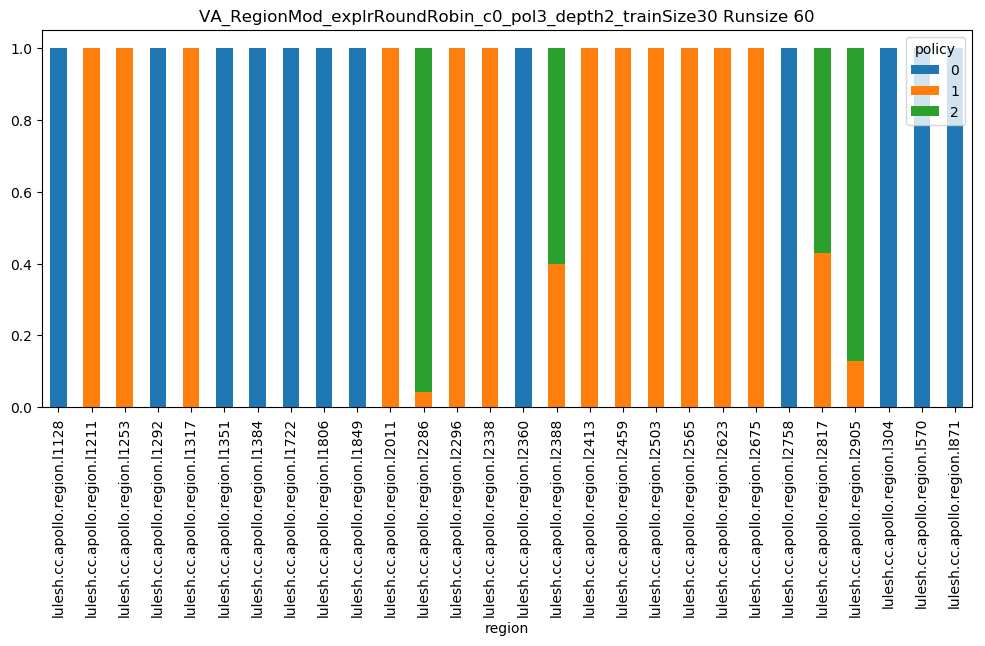

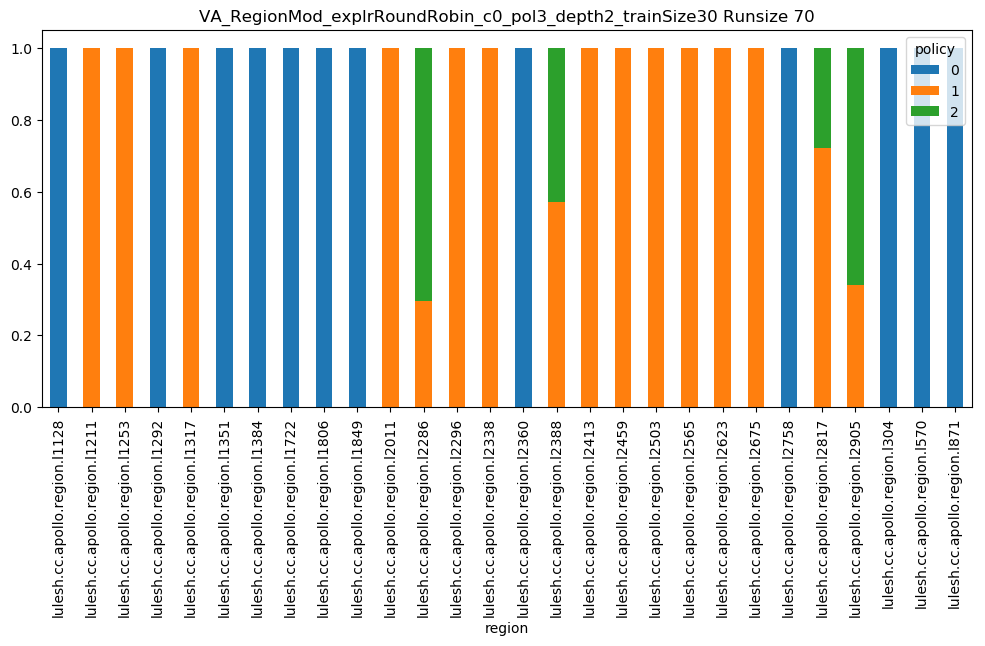

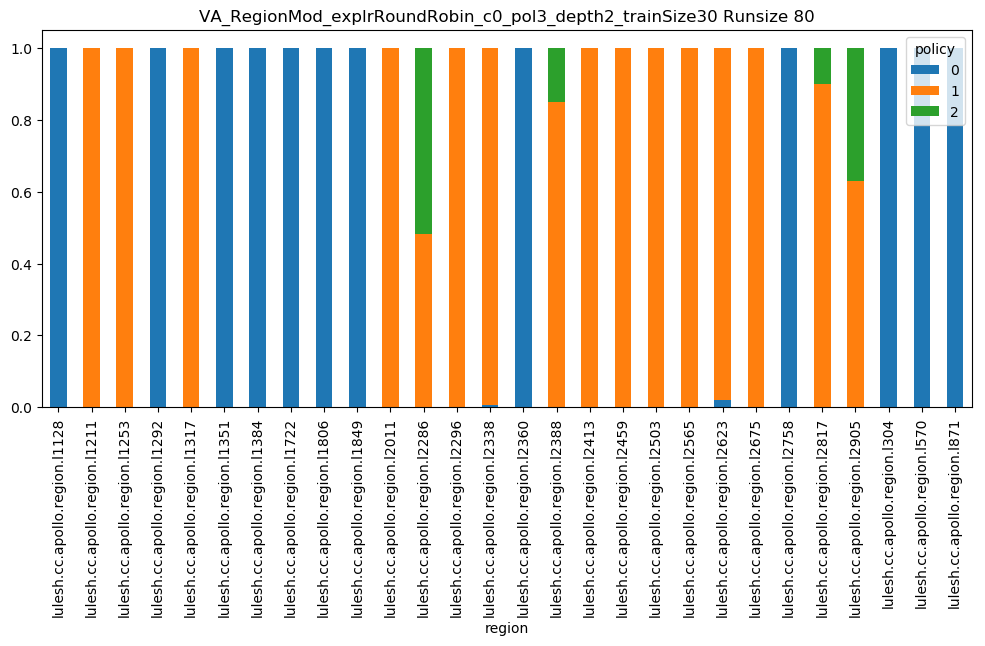

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 82 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


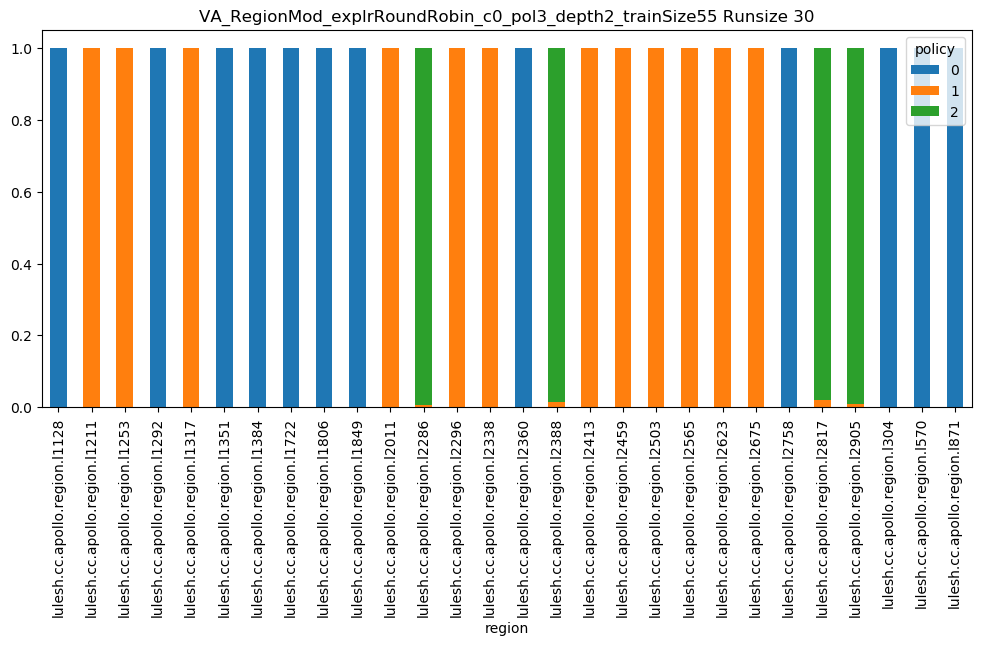

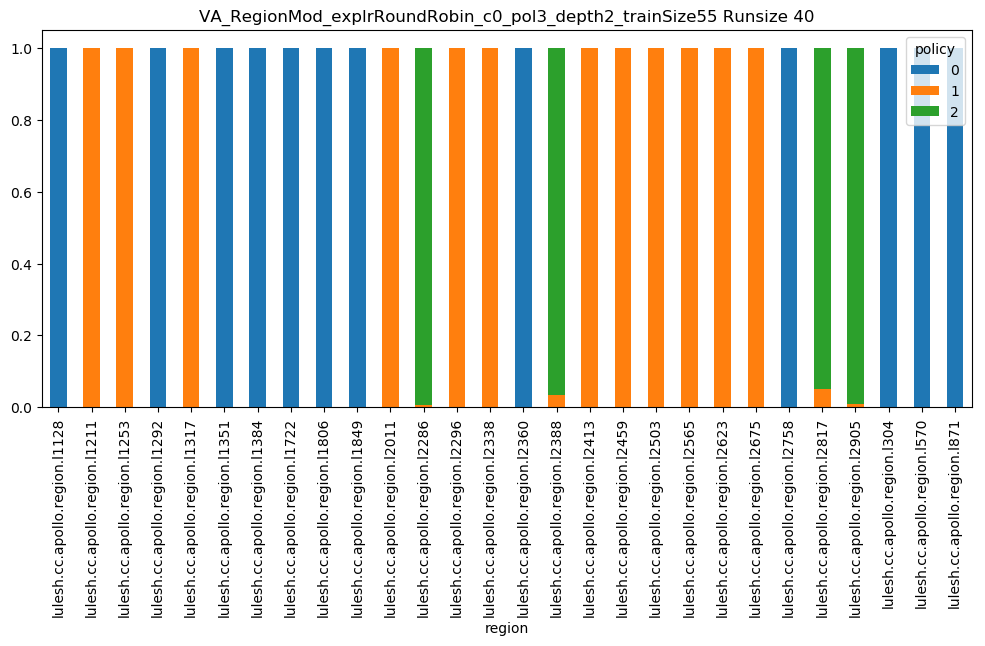

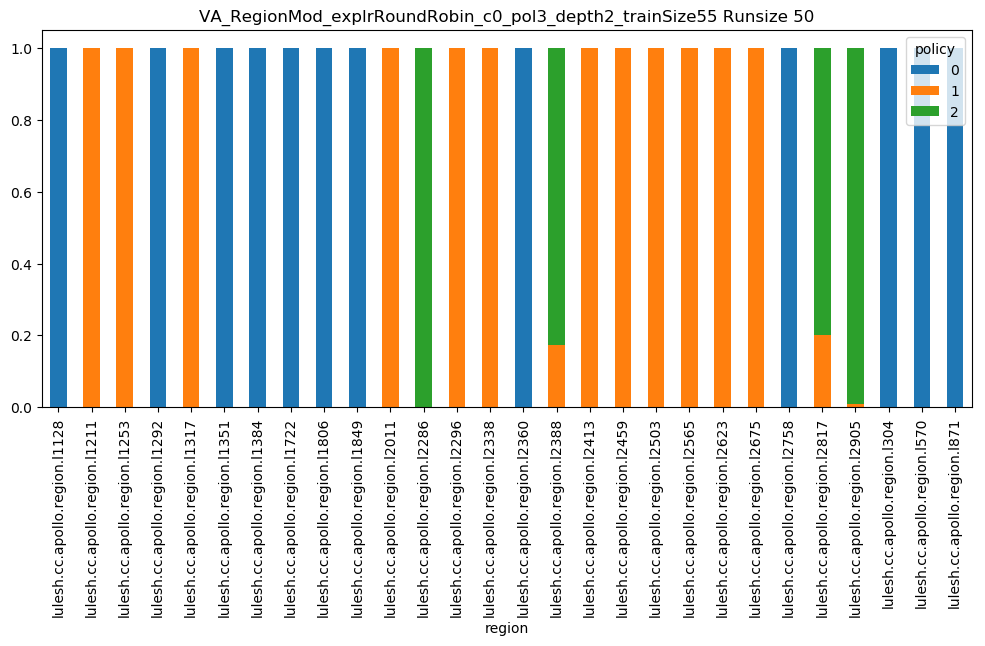

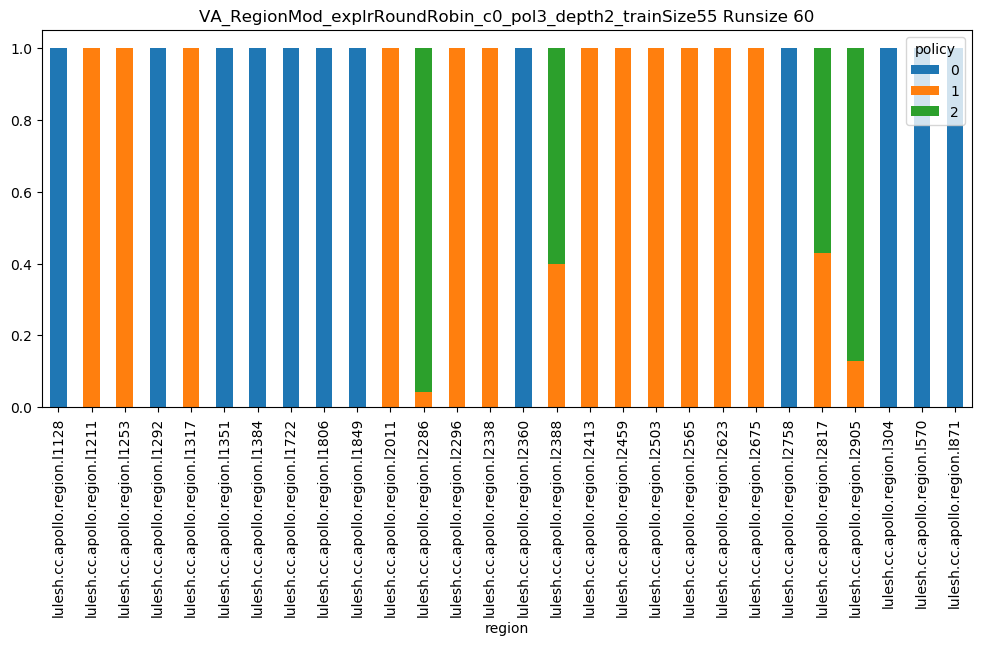

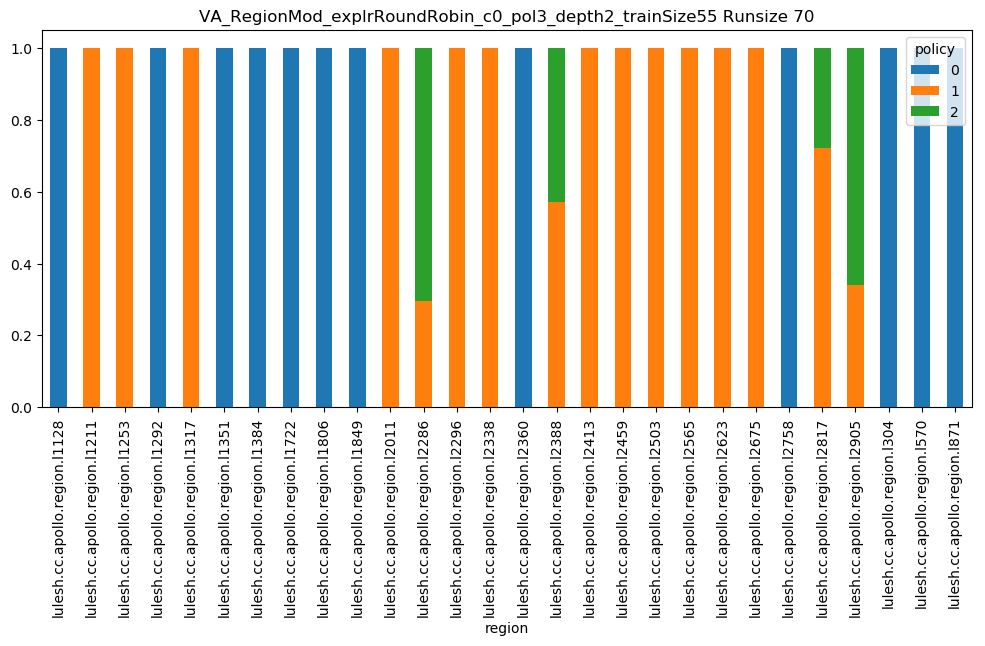

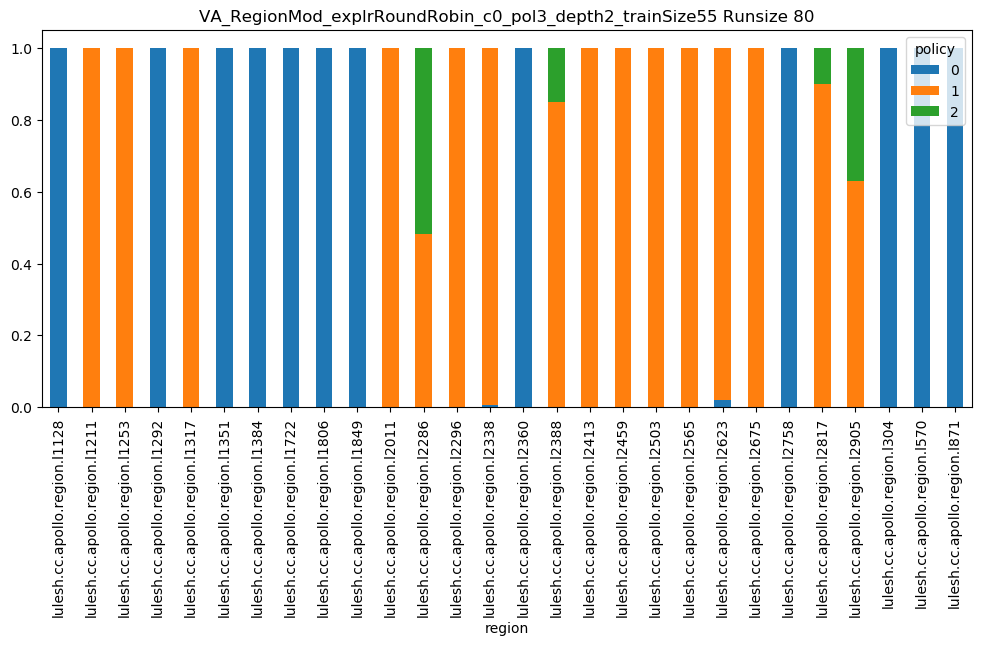

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 57 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


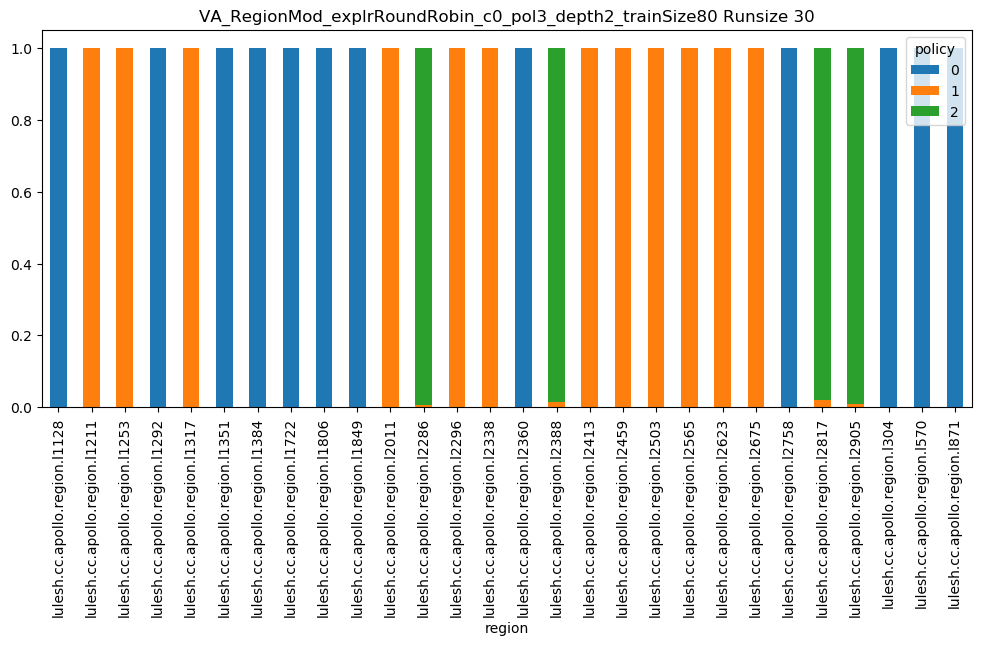

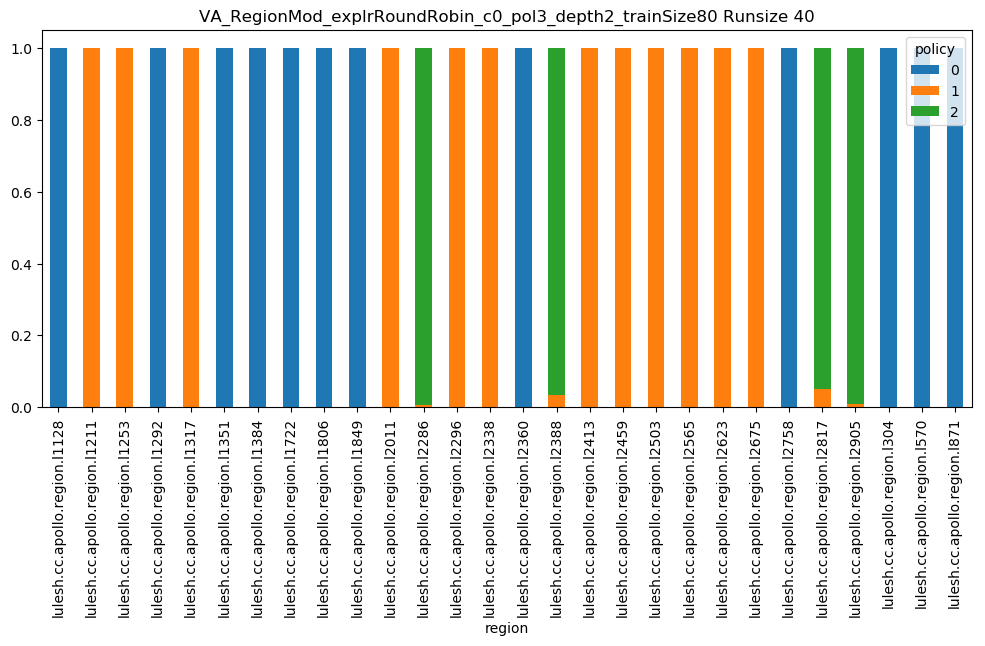

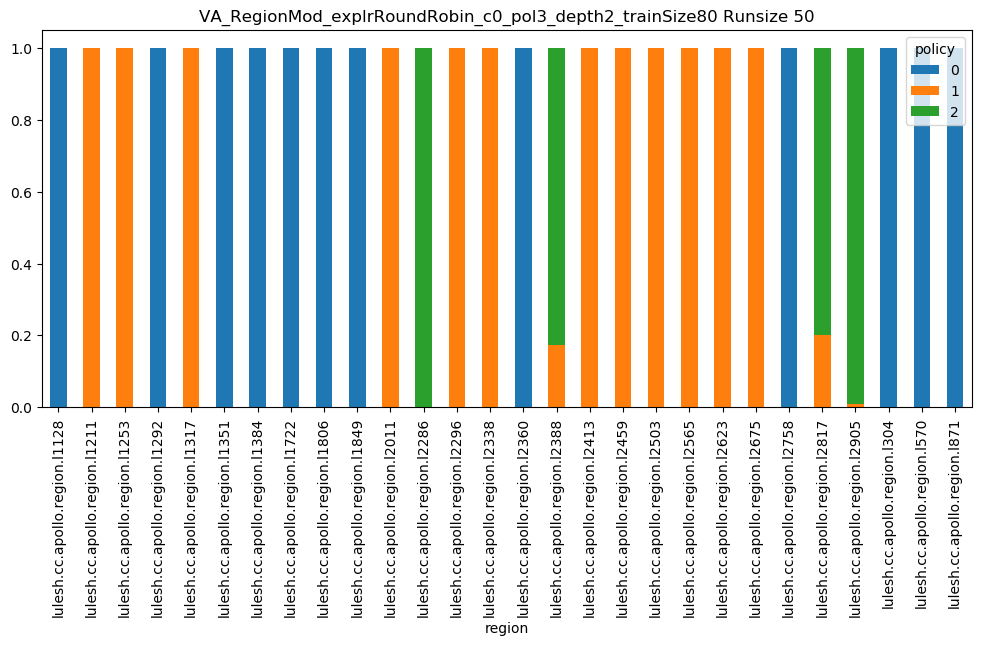

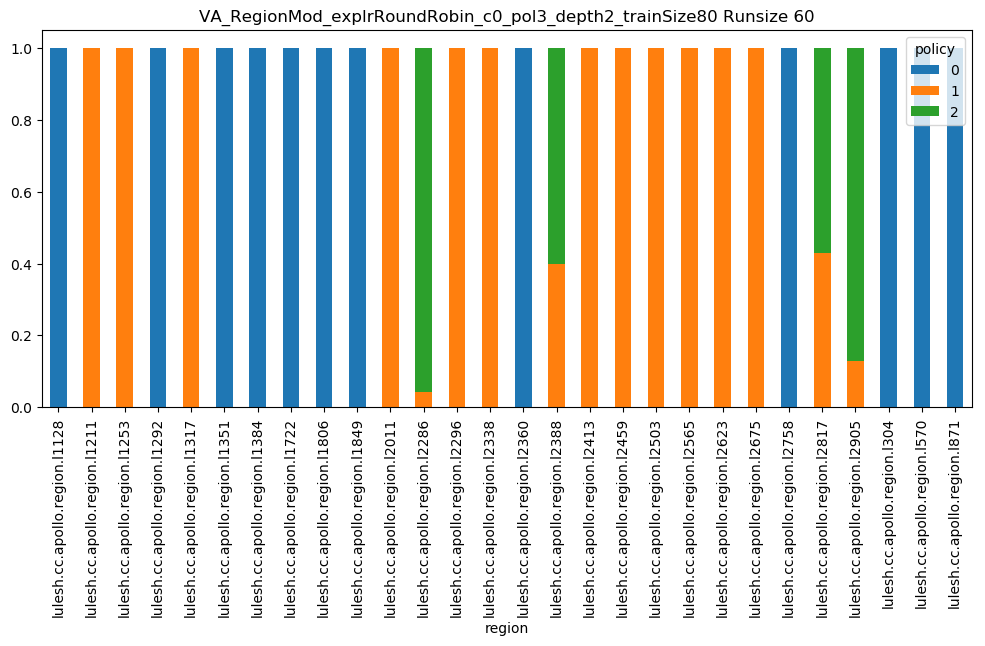

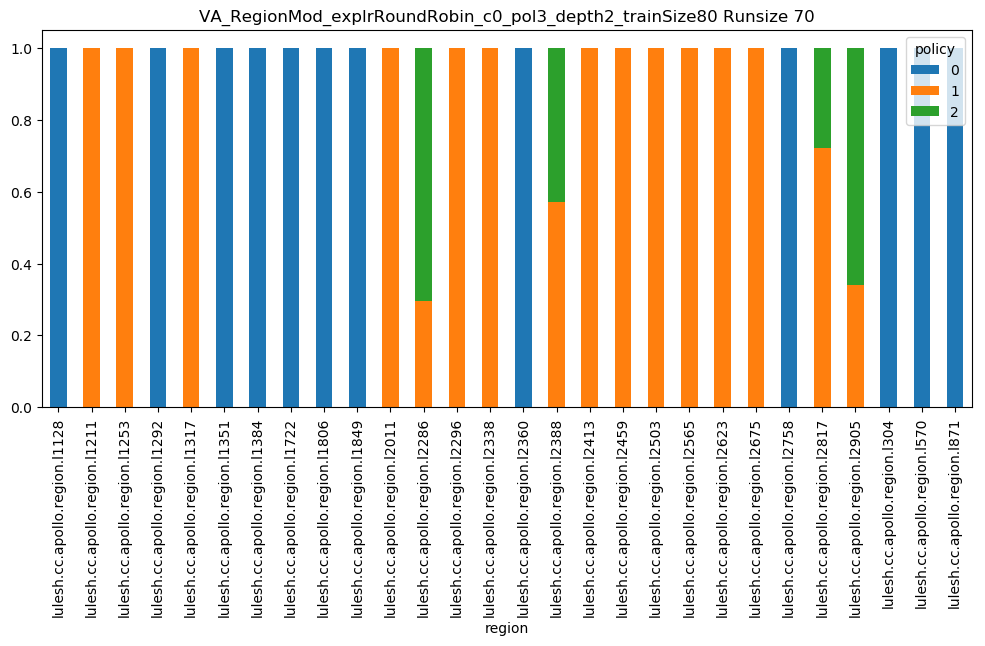

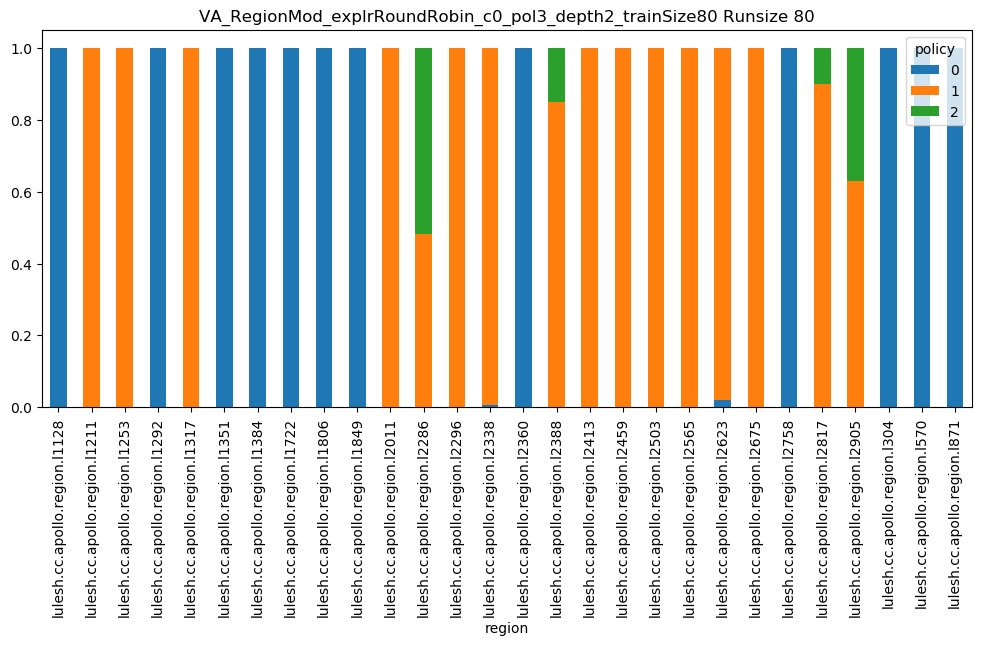

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 56 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


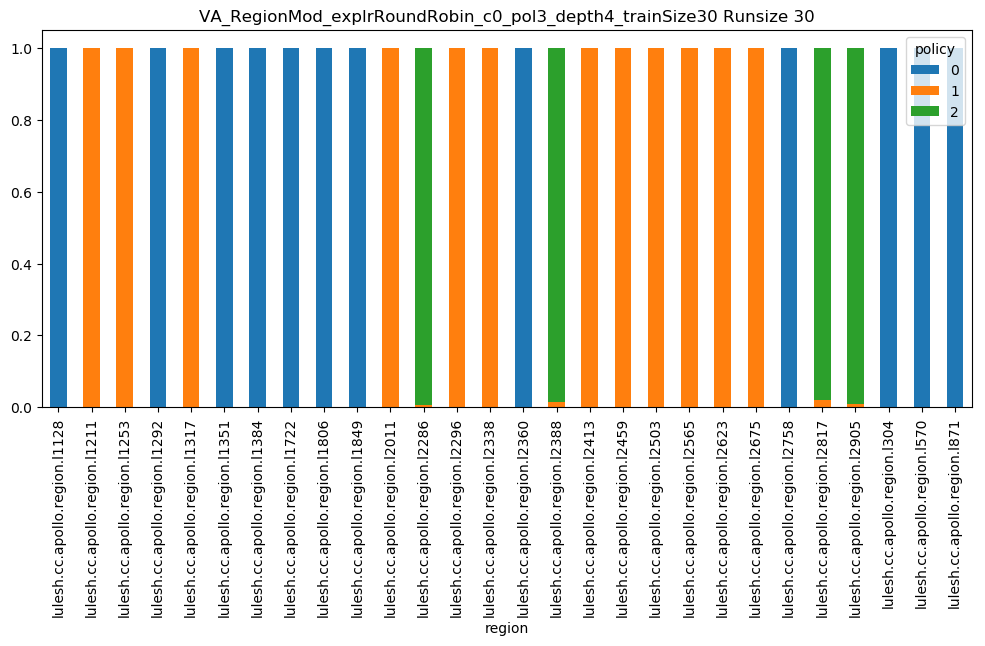

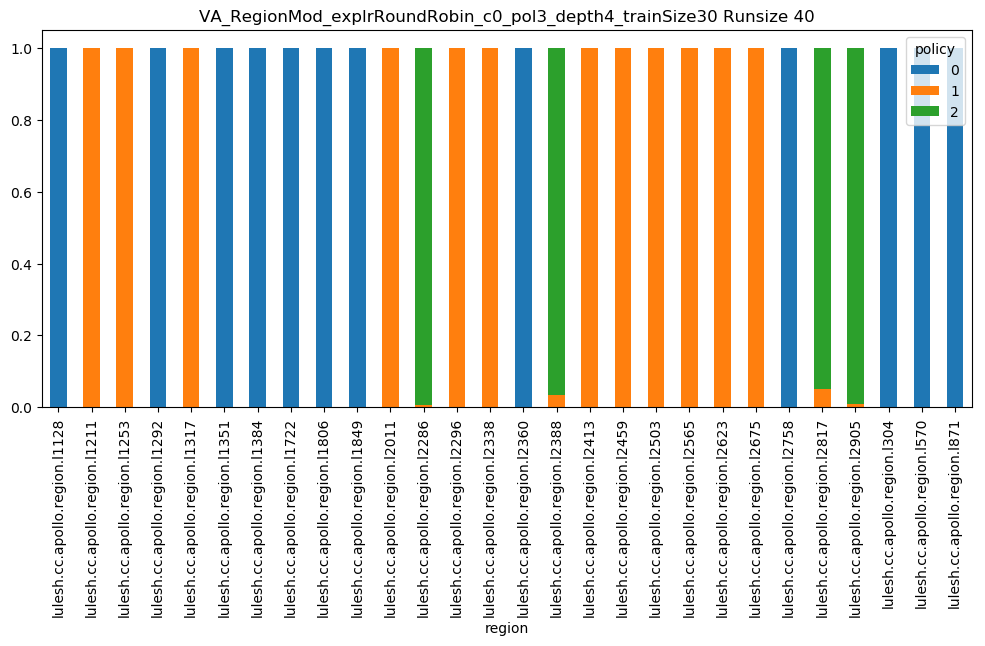

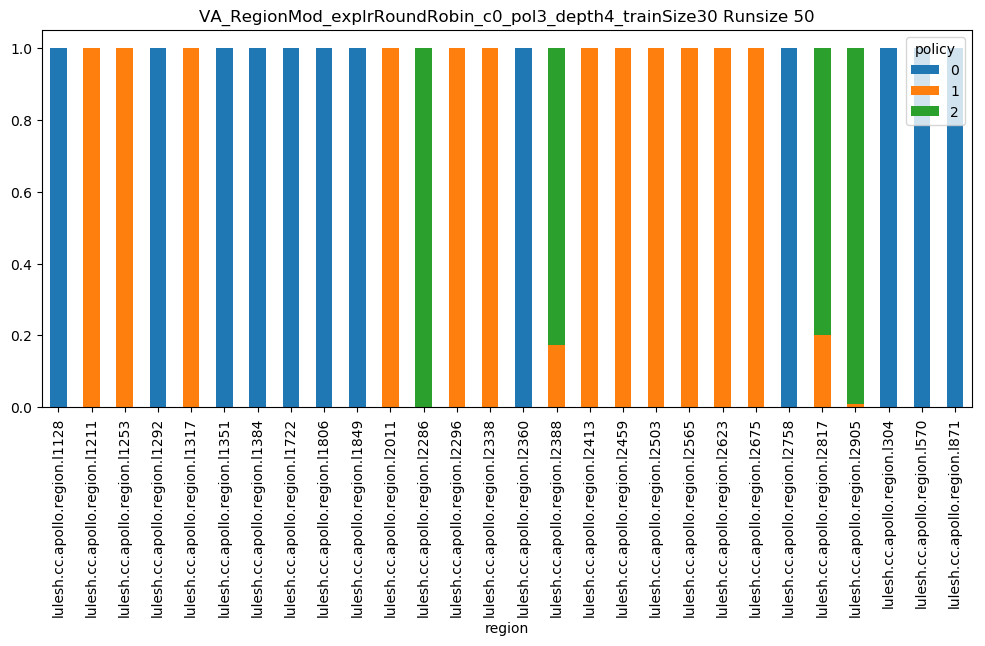

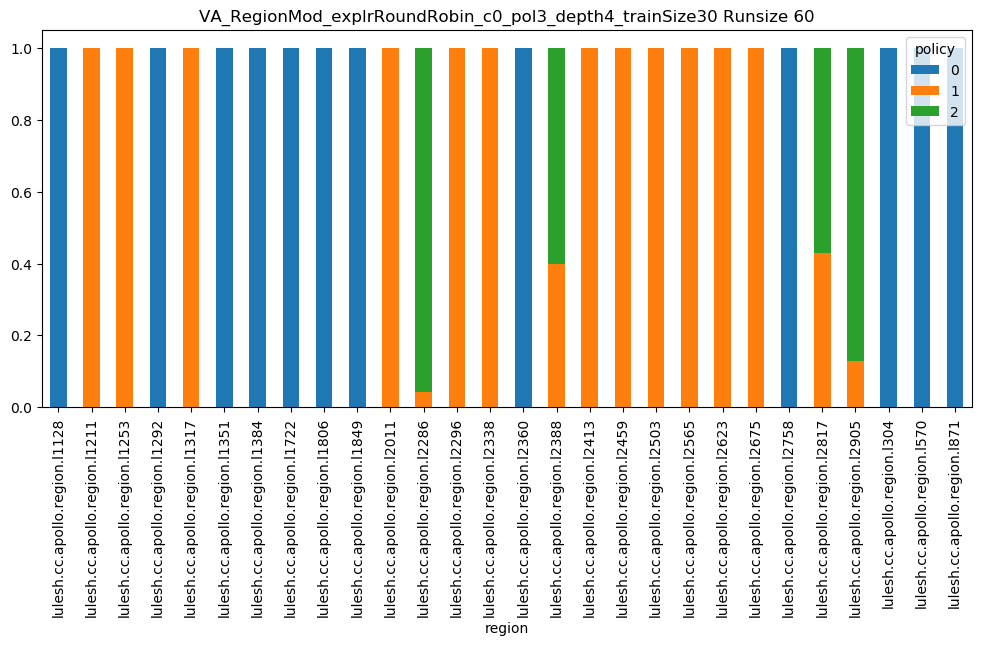

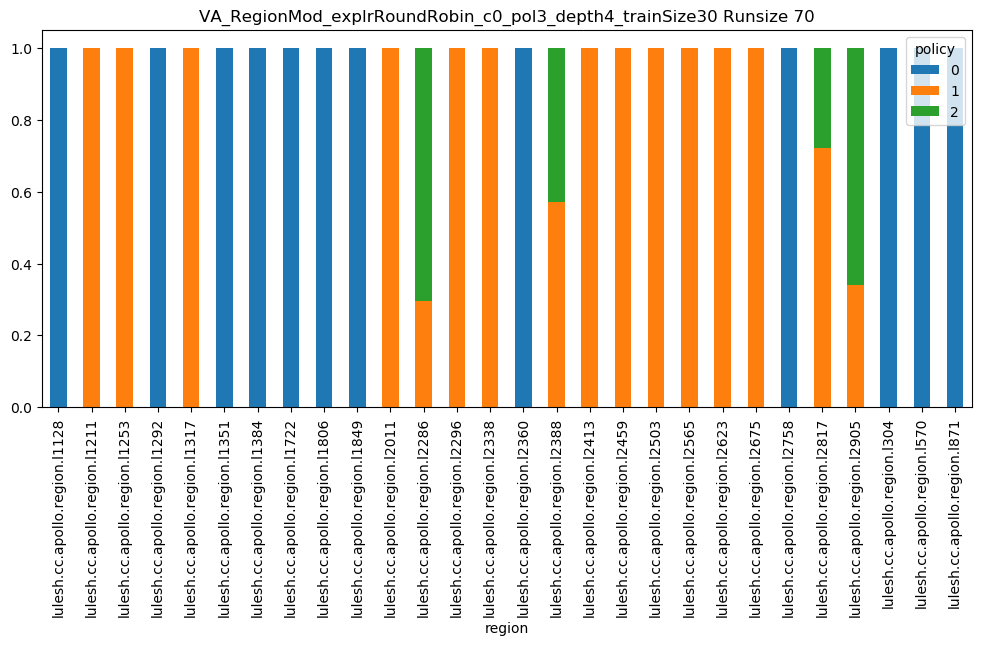

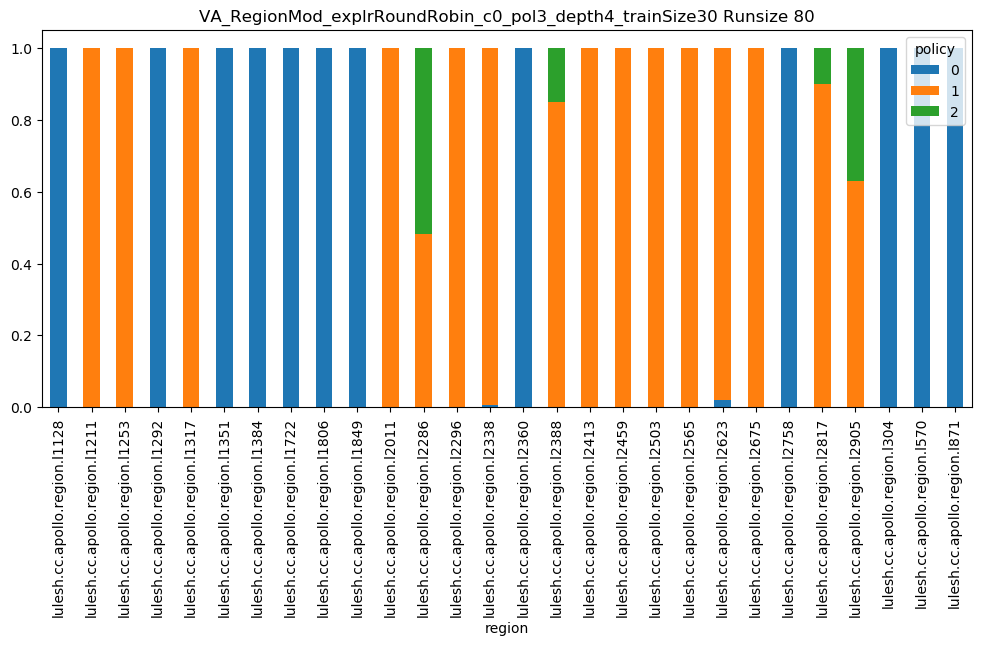

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 54 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


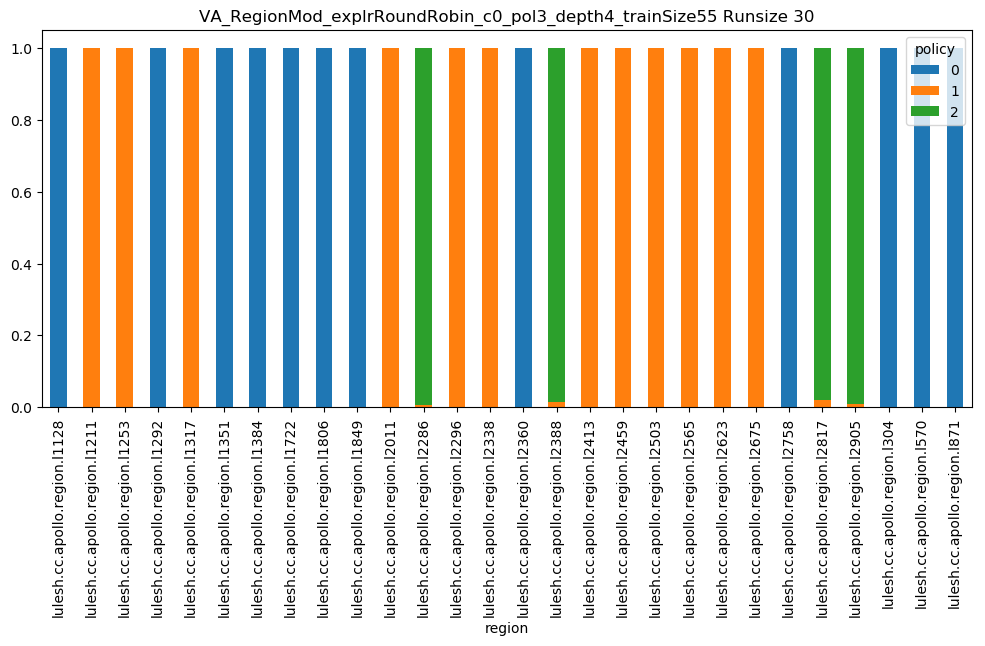

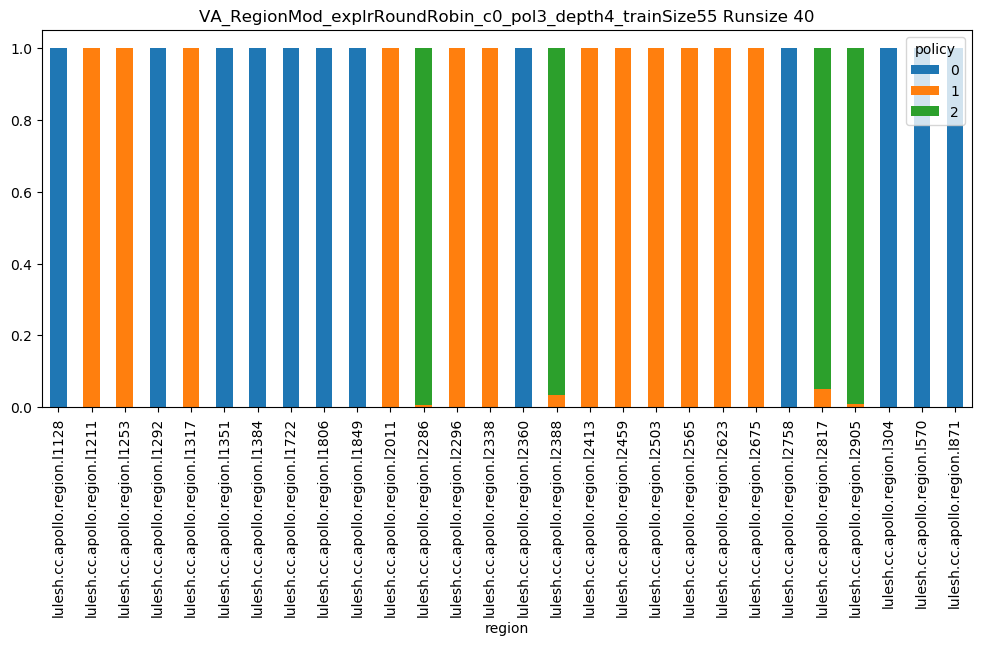

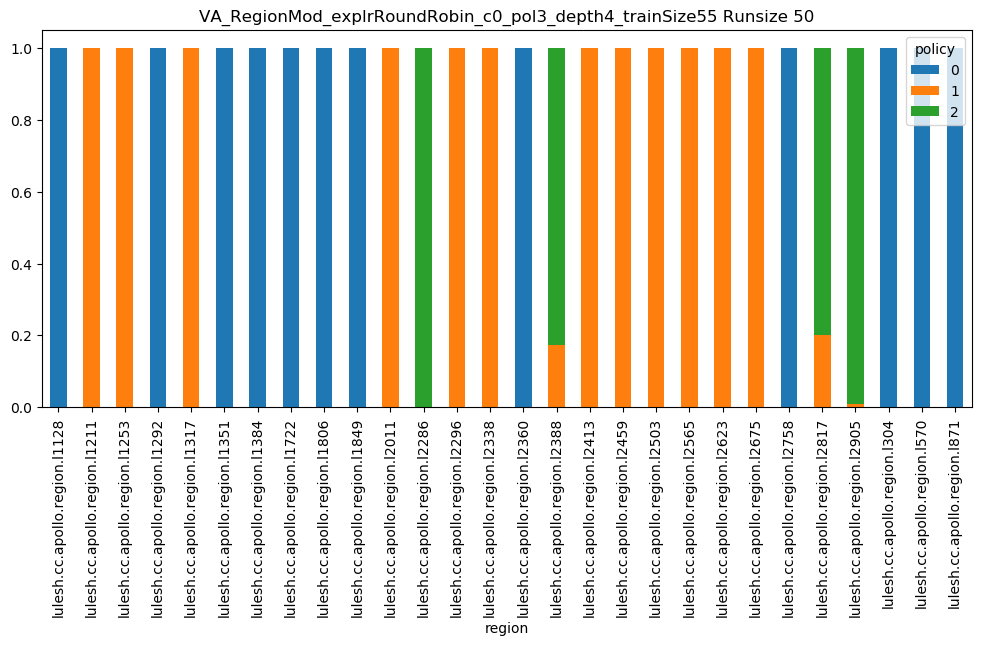

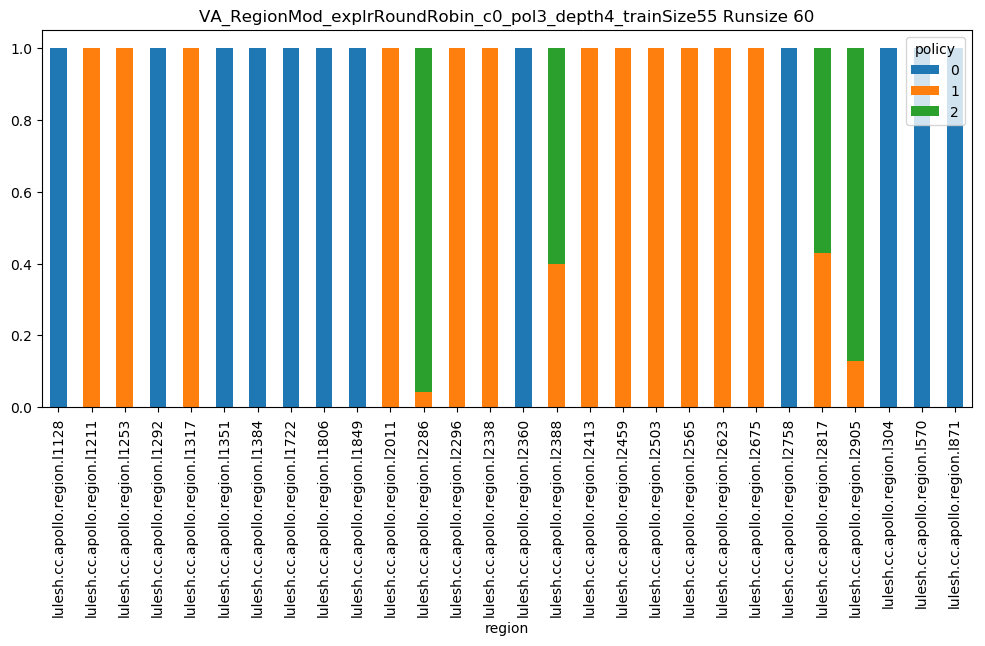

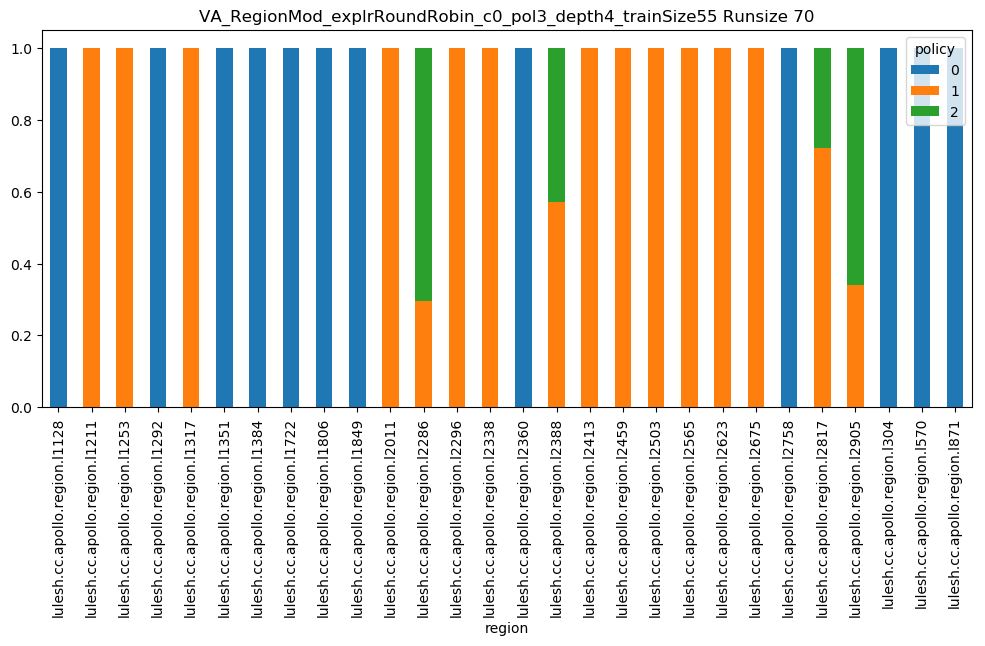

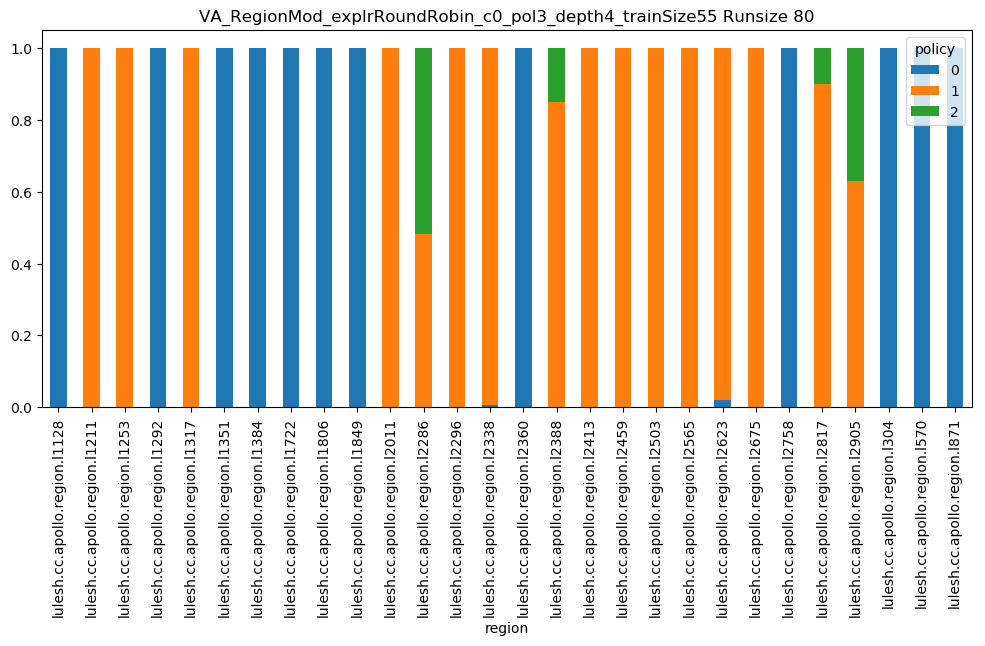

Loading file: VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv
Read in CSV file in 55 second(s)
Data shape:  (40127184, 12)
Runsizes tested: [30 40 50 60 70 80]


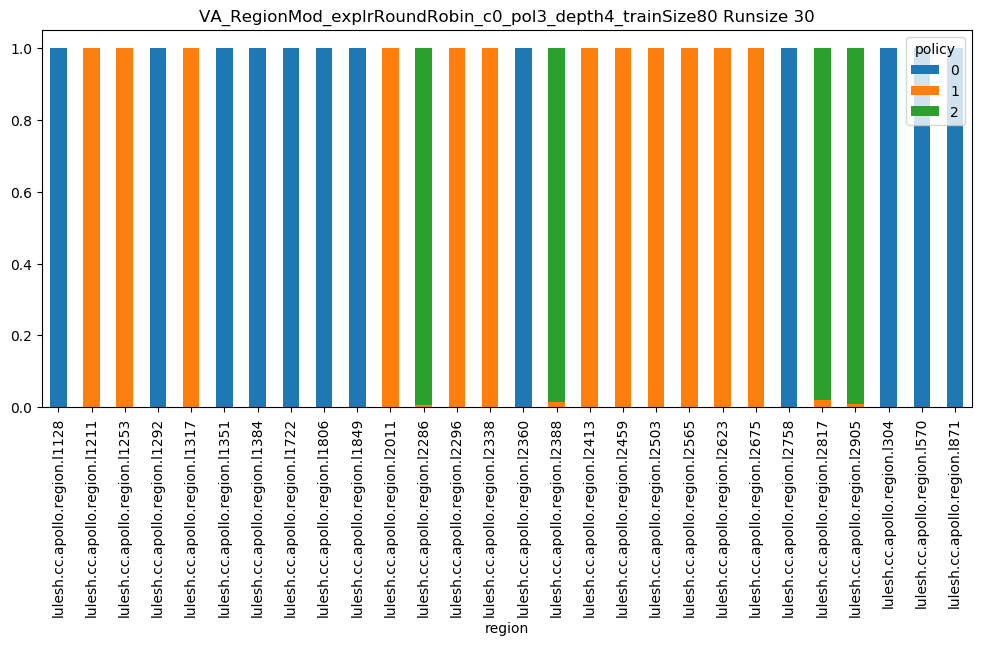

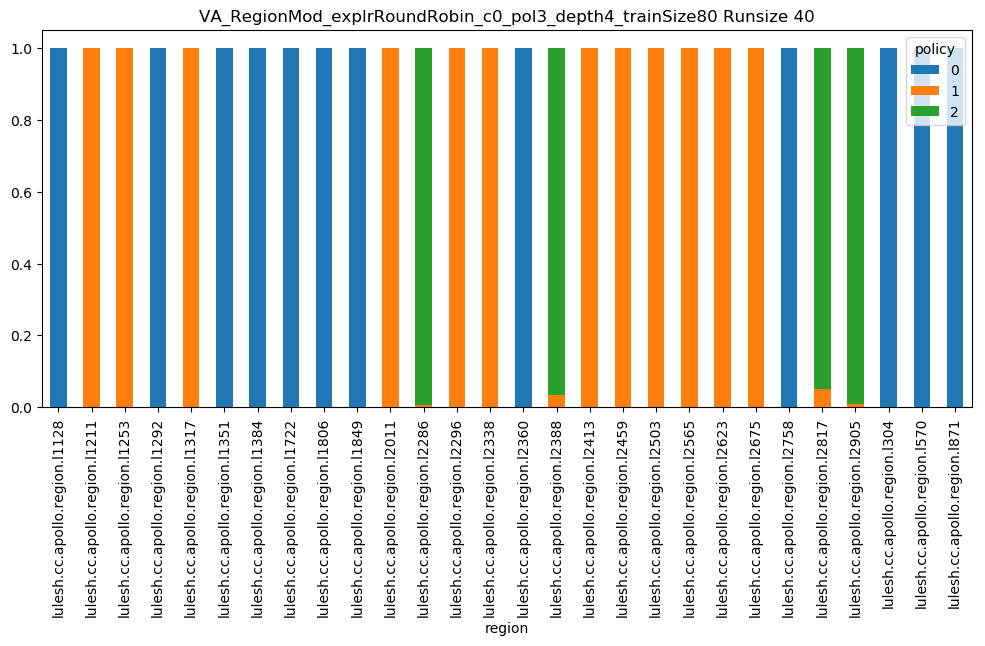

In [ ]:



# NOTE: This takes all 3 trials for one configuration and bases the distribution off the 3
# it does not average the 3 trials, just sums them
for csv in csvs:
    print('Loading file:', csvfile)
    filename = csv[:-4]
    t = time.perf_counter()
    df = pd.read_csv(csvfile, sep=',')
    elapsed_time = time.perf_counter() - t
    print('Read in CSV file in', int(elapsed_time), 'second(s)')
    print('Data shape: ', df.shape) 
    
    runsizes = df['runsize'].unique()
    print('Runsizes tested:', runsizes)
    
    # For each runsize, make a plot of the region and policy distribution
    pngs = []
    for runsize in runsizes:
        rundata = df.loc[df['runsize'] == runsize]
        grouped = rundata.groupby(['region', 'policy'])

        # Count the full number of executions for each region
        fullExecs = rundata.groupby(['region'])['policy'].count()

        # Get the executions per policy
        policyExecs = grouped['policy'].count()

        # Ratio of each regions policy executions
        ratio = policyExecs/fullExecs

        ax = ratio.unstack().plot.bar(stacked=True)
        ax.set_title(filename+' Runsize '+str(runsize))

        pngname = './pngs/'+filename+'runsize'+str(runsize)+'.png'
        pngs.append(pngname)
        plt.savefig(pngname)

        plt.show()
        
    # Make a GIF of all those images
    gifname = './pngs/'+filename
    giffile = gifname+'.gif'
    with imageio.get_writer(giffile, mode='I') as writer:
        for png in pngs:
            image = imageio.imread(png)
            writer.append_data(image)
    
    # Make a copied GIF that's slowed down
    gif_speed_up = gifname+'_slow.gif'
    gif = imageio.mimread(giffile)
    imageio.mimsave(gif_speed_up, gif, fps=1)


#csvfile = "VA_RegionMod_explrRoundRobin_c0_pol3_depth4_trainSize80.csv"
#print('Columns:', df.columns)

In [59]:
!pwd